# WCPP: data collection

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
- [Datasets exploration](#datasets_exploration)
  - [Oxford Supertracker](#oxford_supertracker)
    - [Type](#type)
    - [Policy area and focus](#policy_area_and_focus)
    - [Dates](#dates)
    - [Authors, source, and provider](#authors_source_and_provider)
    - [World region, country coverage, level of observation](#world_region_country_coverage_level_of_observation)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
This notebook finds, imports and discusses datasets that tracked policies by governments around the world towards the Covid-19 pandemic. It shows what data was collected around the period from early 2020 to late 2022, gauging the quality of information available to researchers investigating the decisions made by policy-makers. It also selects datasets that meet the needs of the Worldwide Covid Policy Project. 
<br>
      
Knowing the landscape of data available on policy-making during the pandemic is useful, because it defines some of the boundaries within which humanity will be able to learn from what it did during the spread of the disease. While further data can be created by retrospective collection; and the value of the quantitative information available is only realisable with qualitative, contextual understanding that is not recorded in the datasets; the pandemic has passed and it is fair to assume that a great majority of data on it has already been collected. Understanding the size and quality of the dataspace therefore guides what can be learned about the decisions made and programmes implemented, and may also prompt improvements in data collection ahead of future crises.   

The Worldwide Covid Policy Project seeks to address the following questions:
 
- 1) What was the policy space available to governments?
- 2) Which parts of the policy space did governments use?
- 3) Why did governments use parts of the policy space?

To find any answers to the questions, the project needs datasets that meet the following criteria:

- 1) The data cover the period from at least early 2020 to late 2022.
- 2) There is enough data to allow staistical confidence in any computation.
- 3) There are sufficient variables to proxy the policy space available to decision-makers.
- 4) Enough administrative areas are covered around the world to allow for insightful comparative research.     
- 5) The data is available on open principles, allowing others to replicate the analysis and findings. 

There are numerous datasets available, many of which were conveniently tracked by the <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>. These are considered below with the  <a href="https://opendatacharter.net/principles/" target="_blank">Open Data Charter</a> principle of the data being 'accessible and usable' in mind. The <a href="https://supertracker.spi.ox.ac.uk/surveys/" target="_blank">surveys</a> collected by the tracker are left for any research on policy conditions and effects. All other non-machine readable entries are removed from the tracker, with the aim of creating a meta-database of Covid policy databases.   
    
</div>

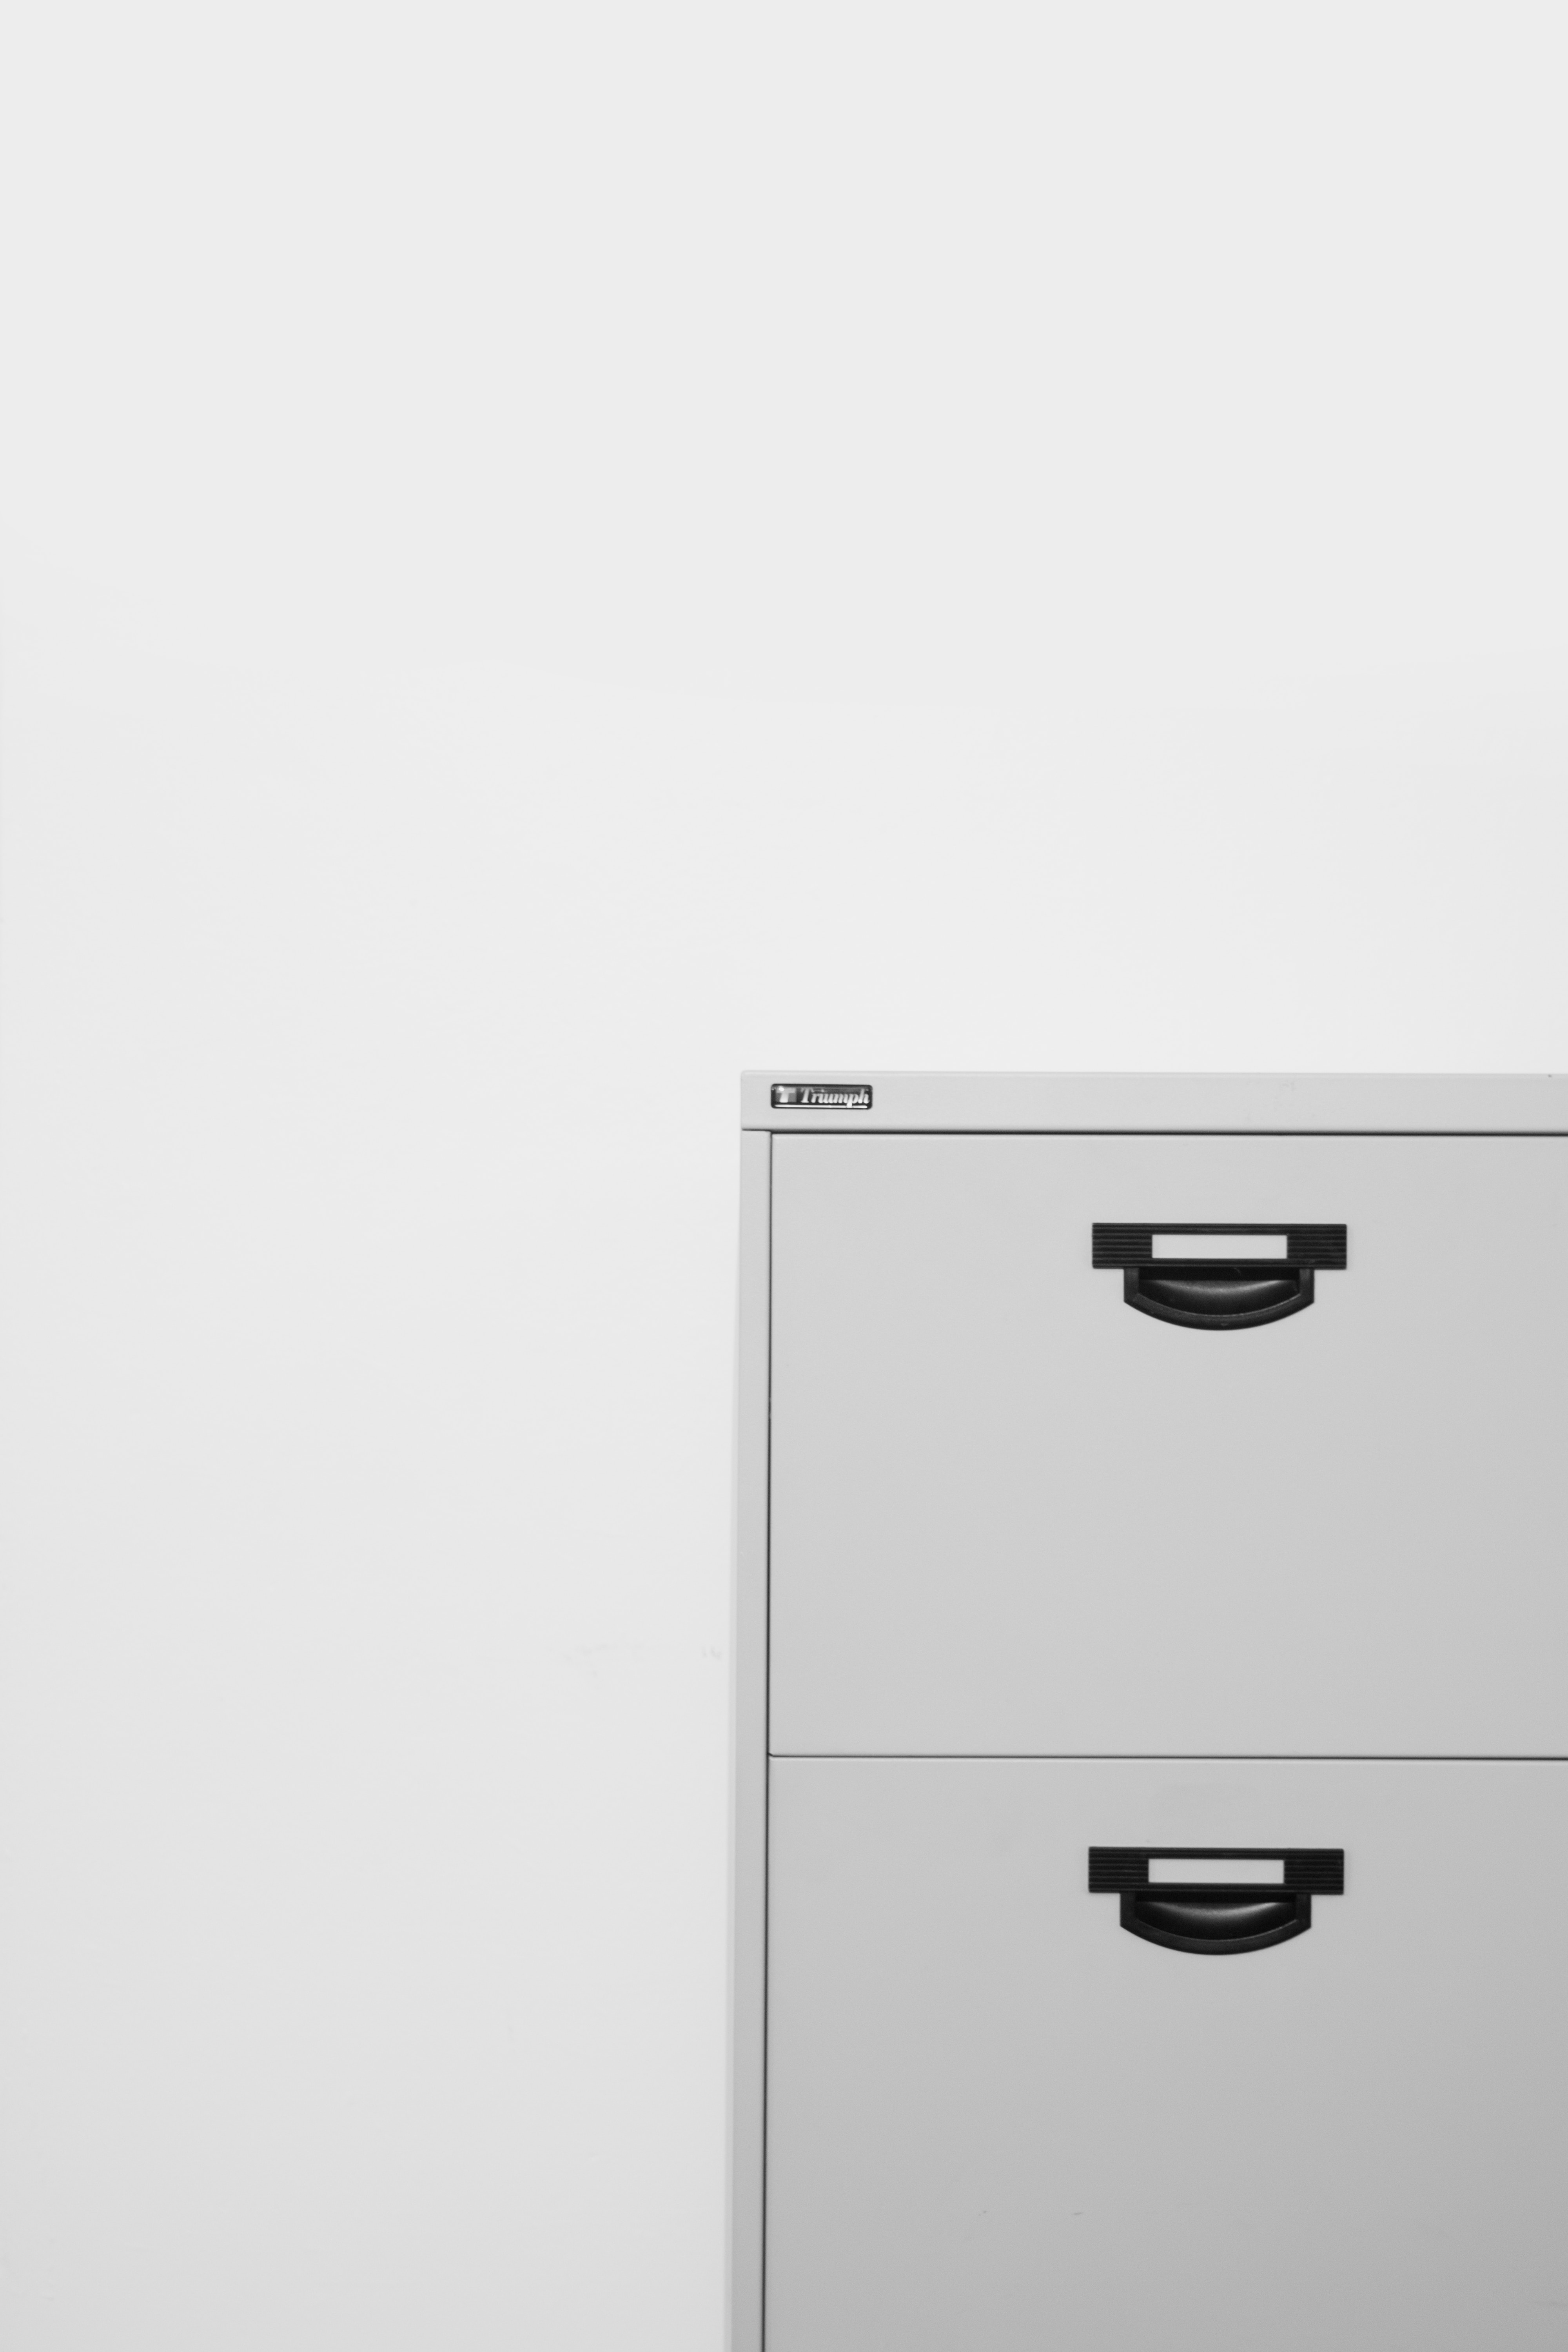

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [212]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions that are used in the notebook, and any adjustments to the operation of Python, Jupyter Notebook, and suchlike. 
</div>

In [213]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [214]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

In [215]:
# Function for counting when policy areas tags appear together
def policy_tags_combined_count(priority_tag):
    # Sets tags counts
    agriculture = 0
    behavioural_responses_and_mobility = 0
    cases_and_deaths = 0
    civic_freedom_and_human_rights = 0
    education_policy = 0
    environmental_policy = 0
    gender = 0
    health_and_care_policy = 0
    international_development_philanthropy = 0
    macroeconomic_and_financial_policy = 0
    non_pharmaceutical_interventions = 0
    politics_elections_policy_making = 0
    prisons_courts_and_judiciary_systems = 0
    regions_and_cities = 0
    research_and_innovation = 0
    social_and_employment_policy = 0
    tax_policy = 0
    trade_policy_and_fdi = 0
    vaccination = 0
    
    # Loops through the entries in the edited tags
    for entry in policy_areas_edited:
        # Identifies if the target term is in the entry
        if priority_tag in entry:
            # Loops through the remaining tags, counting their occurrences
            if 'Agriculture' in entry:
                agriculture += 1
            if 'Behavioural Responses and Mobility' in entry:
                behavioural_responses_and_mobility += 1
            if 'Cases and Deaths' in entry:
                cases_and_deaths += 1
            if 'Civic Freedom and Human Rights' in entry:
                civic_freedom_and_human_rights += 1
            if 'Education Policy' in entry:
                education_policy += 1
            if 'Environmental Policy' in entry:
                environmental_policy += 1
            if 'Gender' in entry:
                gender += 1
            if 'Health and Care Policy' in entry:
                health_and_care_policy += 1
            if 'International Development, Philanthropy' in entry:
                international_development_philanthropy += 1
            if 'Macroeconomic and Financial Policy' in entry:
                macroeconomic_and_financial_policy += 1
            if 'Non-Pharmaceutical Interventions' in entry:
                non_pharmaceutical_interventions += 1
            if 'Politics, Elections, Policy Making' in entry:
                politics_elections_policy_making += 1
            if 'Prisons, Courts and Judiciary Systems' in entry:
                prisons_courts_and_judiciary_systems += 1
            if 'Regions and Cities' in entry:
                regions_and_cities += 1
            if 'Research and Innovation' in entry:
                research_and_innovation += 1
            if 'Social and Employment Policy' in entry:
                social_and_employment_policy += 1
            if 'Tax Policy' in entry:
                tax_policy += 1
            if 'Trade Policy and FDI' in entry:
                trade_policy_and_fdi += 1
            if 'Vaccination' in entry:
                vaccination += 1
    
    # Creates dictionary for counts
    policy_areas_grouped_tags_counts = {}
    
    # Checks if select tags are the priority one, counting them if not
    if priority_tag != 'Agriculture':
        policy_areas_grouped_tags_counts['Agriculture'] = agriculture
    if priority_tag != 'Behavioural Responses and Mobility':
        policy_areas_grouped_tags_counts['Behavioural Responses and Mobility'] = behavioural_responses_and_mobility
    if priority_tag != 'Cases and Deaths':
        policy_areas_grouped_tags_counts['Cases and Deaths'] = cases_and_deaths
    if priority_tag != 'Civic Freedom and Human Rights':
        policy_areas_grouped_tags_counts['Civic Freedom and Human Rights'] = civic_freedom_and_human_rights
    if priority_tag != 'Education Policy':
        policy_areas_grouped_tags_counts['Education Policy'] = education_policy
    if priority_tag != 'Environmental Policy':
        policy_areas_grouped_tags_counts['Environmental Policy'] = environmental_policy
    if priority_tag != 'Gender':
        policy_areas_grouped_tags_counts['Gender'] = gender
    if priority_tag != 'Health and Care Policy':
        policy_areas_tags_counts['Health and Care Policy'] = health_and_care_policy
    if priority_tag != 'International Development, Philanthropy':
        policy_areas_grouped_tags_counts['International Development, Philanthropy'] = international_development_philanthropy
    if priority_tag != 'Macroeconomic and Financial Policy':
        policy_areas_grouped_tags_counts['Macroeconomic and Financial Policy'] = macroeconomic_and_financial_policy
    if priority_tag != 'Non-Pharmaceutical Interventions':
        policy_areas_grouped_tags_counts['Non-Pharmaceutical Interventions'] = non_pharmaceutical_interventions
    if priority_tag != 'Politics, Elections, Policy Making':
        policy_areas_grouped_tags_counts['Politics, Elections, Policy Making'] = politics_elections_policy_making
    if priority_tag != 'Prisons, Courts and Judiciary Systems':
        policy_areas_grouped_tags_counts['Prisons, Courts and Judiciary Systems'] = prisons_courts_and_judiciary_systems
    if priority_tag != 'Regions and Cities':
        policy_areas_grouped_tags_counts['Regions and Cities'] = regions_and_cities
    if priority_tag != 'Research and Innovation':
        policy_areas_grouped_tags_counts['Research and Innovation'] = research_and_innovation
    if priority_tag != 'Social and Employment Policy':
        policy_areas_grouped_tags_counts['Social and Employment Policy'] = social_and_employment_policy
    if priority_tag != 'Tax Policy':
        policy_areas_grouped_tags_counts['Tax Policy'] = tax_policy
    if priority_tag != 'Trade Policy and FDI':
        policy_areas_grouped_tags_counts['Trade Policy and FDI'] = trade_policy_and_fdi
    if priority_tag != 'Vaccination':
        policy_areas_grouped_tags_counts['Vaccination'] = vaccination
    
    # Creates dataframe with counts
    counts_dataframe = pd.DataFrame.from_dict(policy_areas_grouped_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

    # Makes barchart for the counts
    plt.figure()
    plt.bar(counts_dataframe.index, counts_dataframe['Count'], width = 0.9)
    plt.xticks(rotation=90)
    plt.title(f'Count of policy area tags that occur with {priority_tag}')
    plt.xlabel('Policy area')
    plt.ylabel('Count')
    plt.yticks(range(1,15))
    
    # Shows the chart as the final output
    plt.show()

In [216]:
# Shows bar charts for terms in the definitive as they occur in combination with others
def grouped_tags_charts(policy_areas_definitive, policy_areas_edited):
    # Loops through the definitive list of policy areas
    for entry in policy_areas_definitive:
        # Uses function to count terms and produce charts
        policy_tags_combined_count(entry)

In [217]:
# Sets column widths to show all of the text, when un-hashed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.expand_frame_repr', None)
#pd.set_option('max_colwidth', None)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
Showing, importing and initially investigating datasets that have been listed by the Oxford Supertracker. 
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
The datasets used in the notebook: <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [218]:
# Imports Oxford Supertracker list of Covid-19 policy datasets
oxford_supertracker = pd.read_csv('/Users/lawrencekay/CSS/Projects/wcp/data/oxford_supertracker_policy_trackers.csv')

## Datasets exploration
<a id='datasets_exploration'></a>

<div class="alert-info">
The first objective for this notebook is to gauge the quantity and quality of data on Covid policy-making available to researchers, thereafter selecting which might be best for answering the Worldwide Covid Policy Project questions. We'll address the first by looking at the Oxford Supertracker, and then second by considering select datasets in it. 
</div>

### Oxford Supertracker
<a id='oxford_supertracker'></a>

<div class="alert-info">
Let's start by having a look at the number and size of the Covid-19 policy datasets available. 
</div>

In [219]:
# Reads the Oxford Supertracker list
oxford_supertracker

Title  \
0                                                  NaN   
1          WHO PHSM: Public health and social measures   
2                  COVID19 Government Measures Dataset   
3           Oxford COVID19 Government Response Tracker   
4                           CoronaNet research project   
..                                                 ...   
228               ECDC-JRC Response Measures Database    
229                           COVID-19 School Data Hub   
230                 State Laws and Mandates by Vaccine   
231             State COVID-19 Data and Policy Actions   
232  Exceptius: Exceptional powers in times of SARS...   

                                                  Link  \
0                                                  NaN   
1    https://www.who.int/emergencies/diseases/novel...   
2    https://www.acaps.org/covid19-government-measu...   
3    https://www.bsg.ox.ac.uk/research/research-pro...   
4                        https://coronanet-project.org   
..                                                 ...   
228  https://covid-statistics.jrc.ec.europa.eu/RMea...   
229                https://www.covidschooldatahub.com/   
230                     https://www.immunize.org/laws/   
231  https://www.kff.org/coronavirus-covid-19/issue...   
232                             https://exceptius.com/   

                                           Policy Area  \
0                                                  NaN   
1    Non-Pharmaceutical Interventions; Health and C...   
2    Non-Pharmaceutical Interventions; Health and C...   
3    Non-Pharmaceutical Interventions; Health and C...   
4    Non-Pharmaceutical Interventions; Health and C...   
..                                                 ...   
228                   Non-Pharmaceutical Interventions   
229                                   Education Policy   
230                                        Vaccination   
231  Education Policy; Non-Pharmaceutical Intervent...   
232  Non-Pharmaceutical Interventions; Health and C...   

                                                 Focus  \
0                                                  NaN   
1     measures or actions by individuals, instituti...   
2     implemented governments measures structured b...   
3    8 indicators on containment policies (such as ...   
4     includes 40,000 entries on  policy announceme...   
..                                                 ...   
228  A regularly updated archive of non-pharmaceuti...   
229  A central database for educators, researchers,...   
230  State mandates on immunization and vaccine-pre...   
231  Includes state-level data on a variety of COVI...   
232  documents metrics of exceptional decision-maki...   

                                      Country Coverage      Data Format  \
0                                                  NaN              NaN   
1    worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...              csv   
2    worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...             xlsx   
3    worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...         csv; API   
4    worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...        csv; xlsx   
..                                                 ...              ...   
228  BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...        csv; xlsx   
229                                                USA  html; csv; xlsx   
230                                                USA             html   
231                                                USA        html; csv   
232  AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; F...        csv; xlsx   

                                               Authors            Type  \
0                                                  NaN             NaN   
1                       [WHO](https://twitter.com/WHO)  Policy Tracker   
2            [ACAPS](https://twitter.com/ACAPSproject)  Policy Tracker   
3    [Thomas Hale](https://twitter.com/thomasnhale)...  Policy T

<div class="alert-info">
The Oxford Supertracker has obviously monitored a great many Covid datasets, and let's look at its head and tail.  
</div>

In [220]:
# Gives the top of the dataset
oxford_supertracker.head()

Title  \
0                                          NaN   
1  WHO PHSM: Public health and social measures   
2          COVID19 Government Measures Dataset   
3   Oxford COVID19 Government Response Tracker   
4                   CoronaNet research project   

                                                Link  \
0                                                NaN   
1  https://www.who.int/emergencies/diseases/novel...   
2  https://www.acaps.org/covid19-government-measu...   
3  https://www.bsg.ox.ac.uk/research/research-pro...   
4                      https://coronanet-project.org   

                                         Policy Area  \
0                                                NaN   
1  Non-Pharmaceutical Interventions; Health and C...   
2  Non-Pharmaceutical Interventions; Health and C...   
3  Non-Pharmaceutical Interventions; Health and C...   
4  Non-Pharmaceutical Interventions; Health and C...   

                                               Focus  \
0                                                NaN   
1   measures or actions by individuals, instituti...   
2   implemented governments measures structured b...   
3  8 indicators on containment policies (such as ...   
4   includes 40,000 entries on  policy announceme...   

                                    Country Coverage Data Format  \
0                                                NaN         NaN   
1  worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...         csv   
2  worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...        xlsx   
3  worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...    csv; API   
4  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...   csv; xlsx   

                                             Authors            Type  \
0                                                NaN             NaN   
1                     [WHO](https://twitter.com/WHO)  Policy Tracker   
2          [ACAPS](https://twitter.com/ACAPSproject)  Policy Tracker   
3  [Thomas Hale](https://twitter.com/thomasnhale)...  Policy Tracker   
4  [CoronaNet Research Project](https://twitter.c...  Policy Tracker   

     Level of Observation  Start Date    End Date  \
0                     NaN         NaN         NaN   
1                national  2020-01-04  up-to-date   
2                national  2020-01-01  2021-01-15   
3                national  2020-01-01  up-to-date   
4  national; sub-national  2020-01-01  up-to-date   

                                              Source Language  \
0                                                NaN      NaN   
1  Governmental agencies; International organisat...      NaN   
2  Governmental agencies; International organisat...      NaN   
3  Governmental agencies; International organisat...      NaN   
4            Governmental agencies; Media; Academics      NaN   

                                        World Region  \
0                                                NaN   
1  worldwide; Sub-Saharan Africa; East Asia & Pac...   
2  worldwide; Sub-Saharan Africa; East Asia & Pac...   
3  worldwide; Sub-Saharan Africa; East Asia & Pac...   
4  worldwide; Sub-Saharan Africa; East Asia & Pac...   

                      Provider  
0                          NaN  
1  International organisations  
2                    Academics  
3                    Academics  
4                    Academics

In [221]:
# Gives the bottom of the dataset
oxford_supertracker.tail()

Title  \
228               ECDC-JRC Response Measures Database    
229                           COVID-19 School Data Hub   
230                 State Laws and Mandates by Vaccine   
231             State COVID-19 Data and Policy Actions   
232  Exceptius: Exceptional powers in times of SARS...   

                                                  Link  \
228  https://covid-statistics.jrc.ec.europa.eu/RMea...   
229                https://www.covidschooldatahub.com/   
230                     https://www.immunize.org/laws/   
231  https://www.kff.org/coronavirus-covid-19/issue...   
232                             https://exceptius.com/   

                                           Policy Area  \
228                   Non-Pharmaceutical Interventions   
229                                   Education Policy   
230                                        Vaccination   
231  Education Policy; Non-Pharmaceutical Intervent...   
232  Non-Pharmaceutical Interventions; Health and C...   

                                                 Focus  \
228  A regularly updated archive of non-pharmaceuti...   
229  A central database for educators, researchers,...   
230  State mandates on immunization and vaccine-pre...   
231  Includes state-level data on a variety of COVI...   
232  documents metrics of exceptional decision-maki...   

                                      Country Coverage      Data Format  \
228  BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...        csv; xlsx   
229                                                USA  html; csv; xlsx   
230                                                USA             html   
231                                                USA        html; csv   
232  AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; F...        csv; xlsx   

                                               Authors            Type  \
228  [European Centre for Disease Prevention and Co...  Policy Tracker   
229             [Emily Oster](https://emilyoster.net/)  Policy Tracker   
230  [Immunization Action Coalition](https://twitte...  Policy Tracker   
231  [Kaiser Family Foundation](https://twitter.com...  Policy Tracker   
232  Egger, C.M.; de Saint Phalle, E.; Magni-Berton...  Policy Tracker   

       Level of Observation  Start Date    End Date  \
228                national  2020-01-01  up-to-date   
229            sub-national  2020-09-01  2021-05-31   
230            sub-national         NaN         NaN   
231            sub-national  2020-03-11  up-to-date   
232  national; sub-national  2020-01-01  2021-04-30   

                                 Source Language  \
228        Governmental agencies; Media      NaN   
229               Governmental agencies      NaN   
230               Governmental agencies      NaN   
231  Governmental agencies; Think tanks      NaN   
232        Governmental agencies; Media      NaN   

                                   World Region                     Provider  
228  West Europe; Eastern Europe & Central Asia  International organisations  
229                               North America                    Academics  
230                               North America                         NGOs  
231                               North America                  Think tanks  
232  European Union; West Europe; North America                    Academics

<div class="alert-info">
From just a quick view of the datasets listed, it looks like there will be a spread across a great many topic areas available for comparing countries. There could also be a good number that cover the right time window. 
<br>    
    
Now let's get a more comprehensive view of what's in the tracker by running some basic checks on the dataset. 
</div>

In [222]:
# Runs basic EDA checks on the dataset
EDA_checks(oxford_supertracker)

ROW LABELS

RangeIndex(start=0, stop=233, step=1)

COLUMN NAMES

Index(['Title', 'Link', 'Policy Area', 'Focus', 'Country Coverage',
       'Data Format', 'Authors', 'Type', 'Level of Observation', 'Start Date',
       'End Date', 'Source', 'Language', 'World Region', 'Provider'],
      dtype='object')

NUMBER OF ROWS AND COLUMNS

(233, 15)

CONCISE SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 232 non-null    object
 1   Link                  232 non-null    object
 2   Policy Area           232 non-null    object
 3   Focus                 232 non-null    object
 4   Country Coverage      232 non-null    object
 5   Data Format           231 non-null    object
 6   Authors               232 non-null    object
 7   Type                  188 non-null    object
 8   Level of Observation  217 non

<div class="alert-info">
The tracker looks like it has a lot of interesting variety in it, with enough consistency across the column counts to mean that the data might not be too much of a mess. Interestingly, the most null values are found in the 'type' and 'level of observation' columns - a pattern which is also basically repeated for the rows - which might be because these characteristics are ambiguous for some datasets. Let's see. 
<br>
    
Let's check for missing and duplicated entries in more depth. 
</div>

In [223]:
# Checks for missing and duplicated rows and columns in the dataset
missing_and_duplicated(oxford_supertracker)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

NULLS

There are 313 null values in the dataset.

The null values are in the following columns:


Title                     1
Link                      1
Policy Area               1
Focus                     1
Country Coverage          1
Data Format               2
Authors                   1
Type                     45
Level of Observation     16
Start Date                5
End Date                  5
Source                    1
Language                230
World Region              1
Provider                  2
dtype: int64


The null values above account for the following percentages of all null values:


Title                    0.429185
Link                     0.429185
Policy Area              0.429185
Focus                    0.429185
Country Coverage         0.429185
Data Format              0.858369
Authors                  0.429185
Type                    19.313305
Level of Observation     6.866953
Start Date               2.145923
End Date                 2.145923
Source                   0.429185
Language                98.712446
World Region             0.429185
Provider                 0.858369
dtype: float64

<div class="alert-info">
There are no duplicated rows in the dataset, thankfully, but null values are found in nearly all of the columns. The type, level of observation, and language, hold most of them. The last of these might not be an issue as the language is likely to be English. The start and end dates might be more troublesome, as they will be necessary to make the data usable. 
<br>
    
Before we get into looking at what's in the datasets, let's count how many there are. From just the view of the head of the tracker, we saw that row zero is empty. And from the basic checks just above, that means that there should be 232 datasets. But let's verify that.      
    
</div>

In [224]:
# Drops row zero from the dataset
oxford_supertracker.drop(index = 0, inplace = True)

In [225]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [226]:
# Checks the change
oxford_supertracker

Title  \
0          WHO PHSM: Public health and social measures   
1                  COVID19 Government Measures Dataset   
2           Oxford COVID19 Government Response Tracker   
3                           CoronaNet research project   
4    Complexity Science Hub COVID-19 Covid-19 Contr...   
..                                                 ...   
227               ECDC-JRC Response Measures Database    
228                           COVID-19 School Data Hub   
229                 State Laws and Mandates by Vaccine   
230             State COVID-19 Data and Policy Actions   
231  Exceptius: Exceptional powers in times of SARS...   

                                                  Link  \
0    https://www.who.int/emergencies/diseases/novel...   
1    https://www.acaps.org/covid19-government-measu...   
2    https://www.bsg.ox.ac.uk/research/research-pro...   
3                        https://coronanet-project.org   
4                    http://covid19-interventions.com/   
..                                                 ...   
227  https://covid-statistics.jrc.ec.europa.eu/RMea...   
228                https://www.covidschooldatahub.com/   
229                     https://www.immunize.org/laws/   
230  https://www.kff.org/coronavirus-covid-19/issue...   
231                             https://exceptius.com/   

                                           Policy Area  \
0    Non-Pharmaceutical Interventions; Health and C...   
1    Non-Pharmaceutical Interventions; Health and C...   
2    Non-Pharmaceutical Interventions; Health and C...   
3    Non-Pharmaceutical Interventions; Health and C...   
4                     Non-Pharmaceutical Interventions   
..                                                 ...   
227                   Non-Pharmaceutical Interventions   
228                                   Education Policy   
229                                        Vaccination   
230  Education Policy; Non-Pharmaceutical Intervent...   
231  Non-Pharmaceutical Interventions; Health and C...   

                                                 Focus  \
0     measures or actions by individuals, instituti...   
1     implemented governments measures structured b...   
2    8 indicators on containment policies (such as ...   
3     includes 40,000 entries on  policy announceme...   
4     non-pharmaceutical interventions (NPIs) to st...   
..                                                 ...   
227  A regularly updated archive of non-pharmaceuti...   
228  A central database for educators, researchers,...   
229  State mandates on immunization and vaccine-pre...   
230  Includes state-level data on a variety of COVI...   
231  documents metrics of exceptional decision-maki...   

                                      Country Coverage      Data Format  \
0    worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...              csv   
1    worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...             xlsx   
2    worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...         csv; API   
3    worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...        csv; xlsx   
4    worldwide; ALB; AUT; BEL; BIH; BRA; CAN; HRV; ...              csv   
..                                                 ...              ...   
227  BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...        csv; xlsx   
228                                                USA  html; csv; xlsx   
229                                                USA             html   
230                                                USA        html; csv   
231  AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; F...        csv; xlsx   

                                               Authors            Type  \
0                       [WHO](https://twitter.com/WHO)  Policy Tracker   
1            [ACAPS](https://twitter.com/ACAPSproject)  Policy Tracker   
2    [Thomas Hale](https://twitter.com/thomasnhale)...  Policy Tracker   
3    [CoronaNet Research Project](https://twitter.c...  Policy T

In [227]:
# Counts the number of original entries
number_original_entries = oxford_supertracker['Title'].nunique()

# Gives the number of unique entries for the level of observation
print(f"There are {number_original_entries} original entries in the dataset.") 

There are 232 original entries in the dataset.


<div class="alert-info">
What are the dataset names? 
</div>

In [228]:
# Gets the list of dataset names from the tracker
datasets_names = pd.DataFrame(oxford_supertracker['Title'])

# Shows list of names
datasets_names.sample(50)

Title
14                               OECD Covid Action Map
117                             Disinformation Tracker
166                        UNINFO COVID-19 Data Portal
159                       OECD Tax Policy Reforms 2021
10                   COVID19 Afrique Données Recherche
7             COVID-19 US state policy database (CUSP)
0          WHO PHSM: Public health and social measures
68   GovPredict Federal, State, and Local Responses...
199  COVID-19 — a timeline of the coronavirus outbreak
142                   SARS-CoV-2 and COVID-19 DATA HUB
62   Dimensions COVID-19 publications, data sets, c...
107                  ETUI Covid Social Impact Timeline
184          UNHCR Global Protection Platform COVID-19
214  COVID-19 Reported Patient Impact and Hospital ...
43                                 ETUC Briefing Notes
169                              Energy Policy Tracker
93                           Coronavirus: prison fever
193                     Test and Trace – US State Data
223  Covid-19 Food Policy in South Africa - The Fir...
153  UNESCO Sistema De Informacion De Tendencias Ed...
87            The Marshall Project Coronavirus Tracker
92                                   Covid Prison Data
188                                School COVID Survey
189      Facebook Data for Good – Our Work on COVID-19
212                      COVID-19 SBA loans above 150k
182  COVID-19 Global Research Registry for Public H...
191                     COVID-19 Mobility Data Network
203                 COVID-19 Temporary Trade Measures 
167                   Kenya COVID-19 Economic Tracker 
170                                      Carbon Brief 
45                                IGC COVID-19 tracker
221        COVID-19 Global Education Recovery Tracker 
56               CGD - COVID education policy tracking
209                     Social Protection and COVID-19
175  COVID-19 Trade Policy Database: Food and Medic...
103        IZA Data Resources on the COVID-19 Pandemic
165              Subnational COVID-19 vaccination data
135  International Review of Leave Policies and Rel...
11                     COVID19 Global Travel Navigator
8                        socialdistancing.stanford.edu
6                     Coronavirus containment measures
211              Paycheck Protection Program Loan Data
177                IndustriAll Europe COVID-19 Monitor
216  COVID-19 Global Travel Restrictions and Airlin...
145  COVID-19 Nonpharmaceutical Interventions Effec...
207        UNICEF Data to inform the COVID-19 response
210  Social Protection Responses to COVID-19 [Task ...
123  COVID-19 Resource Tracker: A Guide to State an...
55   UNESCO COVID-19 Educational Disruption and Res...
32           OECD tax administration responses dataset

<div class="alert-info">
So, we can see that there seem to be a good number of datasets that could have interesting information for a comparative analysis. The themes cover topics such as education, economic stimulus, prisons, and health. And because we've dropped the empty row, every row has at least policy and country coverage information. 
    
<br>
    
But we're only interested in numeric data so let's look at the formats used. 
</div>

In [229]:
# Shows the entries for the data formats
oxford_supertracker['Data Format'].unique()

array(['csv', 'xlsx', 'csv; API', 'csv; xlsx', 'html; csv', 'csv;',
       'xlsx; csv', 'csv;  xlsx', ' html; xlsx',
       ' html; non-downloadable', ' pdf; html', ' pdf', 'xlsx; pdf',
       ' html; pdf', ' csv; tsv; dta', ' html; csv; xlsx', ' xlsx',
       ' csv', ' pdf; xlsx', 'html; pdf; csv', ' pdf; html; xlsx',
       ' html; csv; json', 'csv; xlsx; pdf; html', 'csv;  html',
       ' pdf; json', ' csv; json', ' csv; pdf', ' csv; html', 'docx',
       ' xlsx; csv; html', ' xlsx; pdf; html', 'pdf',
       'html; non-downloadable', 'csv; PostgreSQL', 'html; pdf',
       'xlsx; dta', 'xlsx; csv; json', 'xlsx; json', 'html', 'csv; html',
       nan, 'csv;xlsx', 'xlsx; html', 'html; pdf; docx',
       'csv; xlsx; rdf; rss', 'html; csv; xlsx; pdf', 'html; pdf; xlsx',
       'html; xlsx', 'html; pdf; xlsx; docx',
       'csv; json; kmz; rdf; rss; xlsx', 'csv; json',
       'html; csv; pdf; json', 'html; csv; xlsx'], dtype=object)

In [230]:
# Shows the number of unique data format entries
print(f"There are {len(oxford_supertracker['Data Format'].unique())} types of data format in the dataset.")

There are 53 types of data format in the dataset.


<div class="alert-info">
There are a couple of entries that are known to have additiona data formats, so let's change those:
<br>
    
- Real Time Population Survey, which offers data in the 'xlsx' format. 
- Vera Institute of Justice prison data, which offers data in the 'csv' format. 
</div>

In [231]:
# Changes the Real Time Population Survey data format
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Real Time Population Survey', ['Data Format']] = 'html; pdf; xlsx'


In [232]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Real Time Population Survey']

Title                                     Link  \
30  Real Time Population Survey  https://sites.google.com/view/covid-rps   

                                          Policy Area  \
30  Macroeconomic and Financial Policy; Social and...   

                                                Focus Country Coverage  \
30   bi-weekly online household survey that aims t...              USA   

        Data Format                                            Authors  \
30  html; pdf; xlsx  Alexander Bick; [Adam Blandin](https://twitter...   

              Type Level of Observation  Start Date    End Date     Source  \
30  Policy Tracker             national  2020-03-29  up-to-date  Academics   

   Language   World Region   Provider  
30      NaN  North America  Academics

In [233]:
# Changes the Vera Institute of Justice prison data format
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Vera Institute of Justice prison data', ['Data Format']] = 'html; pdf; xlsx; csv'

In [234]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Vera Institute of Justice prison data']

Title  \
89  Vera Institute of Justice prison data   

                                                 Link  \
89  https://www.vera.org/blog/covid-19-1/use-this-...   

                                          Policy Area  \
89  Prisons, Courts and Judiciary Systems; Cases a...   

                                                Focus Country Coverage  \
89   number of prisoners and #COVID19 cases and de...              USA   

             Data Format                                            Authors  \
89  html; pdf; xlsx; csv  [Vera Institute](https://twitter.com/verainsti...   

              Type    Level of Observation  Start Date    End Date  \
89  Policy Tracker  national; sub-national  2020-04-08  up-to-date   

                Source Language   World Region   Provider  
89  Think tanks; Media      NaN  North America  Academics

<div class="alert-info">
Now let's drop the PDF entries. 
</div>

In [235]:
# Finds the entries listed as only 'pdf'
oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf']

Title  \
101                      Emergency Transitions Monitor   
102                     IZA Crisis Response Monitoring   
110  Coronavirus pandemic in the EU - Fundamental R...   
119       ILO Monitor: COVID-19 and the world of work.   
125  School education during COVID-19: Were teacher...   
135  International Review of Leave Policies and Rel...   

                                                  Link  \
101  https://www.lse.ac.uk/cities/research/urban-go...   
102           https://covid-19.iza.org/crisis-monitor/   
110  https://fra.europa.eu/en/publication/2020/covi...   
119  https://www.ilo.org/wcmsp5/groups/public/---dg...   
125  http://www.oecd.org/education/coronavirus-educ...   
135  https://www.leavenetwork.org/annual-review-rep...   

                                           Policy Area  \
101                                 Regions and Cities   
102                       Social and Employment Policy   
110                     Civic Freedom and Human Rights   
119                       Social and Employment Policy   
125                                   Education Policy   
135  Social and Employment Policy; Health and Care ...   

                                                 Focus  \
101  The project is collecting and analysing data f...   
102  Short-Run Labor Market Impacts of COVID-19 and...   
110  civil, political and socioeconomic rights, suc...   
119  Change in employment and working hours by regi...   
125  The COVID-19 country notes aim to bring togeth...   
135  Maternity leave; Paternity leave; Parental lea...   

                                      Country Coverage Data Format  \
101                                          worldwide         pdf   
102  AUT; FRA; DEU; ITA; NLD; PRT; SVK; ESP; SWE; C...         pdf   
110  EU; AUT; BEL; BGR; HRV; CYP; DNK; EST; FIN; DE...         pdf   
119                                          worldwide         pdf   
125  AUS; AUT; BEL; CAN; CHL; COL; CZE; DNK; EST; F...         pdf   
135  AUS; AUT; BEL; BRA; BGR; CAN; CHL; CHN; HRV; C...         pdf   

                                               Authors            Type  \
101  Philipp Rode; Edgardo Bilsky; Oscar Chamat; [N...  Policy Tracker   
102  Werner Eichhorst; Paul Marx; Ulf Rinne; [IZA](...  Policy Tracker   
110  [FRA European Union Agency for Fundamental Rig...  Policy Tracker   
119                     [ILO](https://twitter.com/ilo)             NaN   
125  [OECD Education](https://twitter.com/OECDEduSk...             NaN   
135  [Alison Koslowski](http://www.sps.ed.ac.uk/sta...  Policy Tracker   

    Level of Observation  Start Date    End Date  \
101         sub-national  2020-06-05  2022-04-01   
102             national  2020-02-24  up-to-date   
110             national  2020-03-01  2020-07-29   
119        supranational  2020-01-01  2020-06-30   
125             national         NaN         NaN   
135             national  2020-02-01  2020-06-30   

                                       Source Language  \
101                                 Academics      NaN   
102  International organisations; Think tanks      NaN   
110  International organisations; Think tanks      NaN   
119    International organisations; Academics      NaN   
125               International organisations      NaN   
135                     Governmental agencies      NaN   

                                          World Region  \
101                                          worldwide   
102                   OECD; West Europe; North America   
110  West Europe; Eastern Europe & Central Asia; Eu...   
119  worldwide; Sub-Saharan Africa; East Asia & Pac...   
125  West Europe; North America; Latin America & th...   
135  worldwide; West Europe; North America; East As...   

                              Provider  
101                          Companies  
102                          Academics  
110                     European Union  
119        International organisations  
125  OECD; International or

In [236]:
# Counts the number of PDF entries
number_pdf_entries = (oxford_supertracker[oxford_supertracker['Data Format'] == ' pdf']) + (oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'])

# Shows the number of PDF-only entries
print(f"There are {len(number_pdf_entries)} PDF-only entries in the dataset.")

There are 19 PDF-only entries in the dataset.


In [237]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'].index)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == ' pdf'].index)

In [238]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 213 entries in the dataset, compared to 232 at the beginning.


In [239]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
To judge whether to drop some more entries, let's find out which ones have 'pdf' entered as one of several formats.  
</div>

In [240]:
# Finds entries with 'pdf' in the listed data formats
oxford_supertracker[oxford_supertracker['Data Format'].str.contains('pdf' or ' pdf', na=False)]

Title  \
11                     COVID19 Global Travel Navigator   
15                  Eastern Europe Coronavirus tracker   
20                                  IMF Fiscal Monitor   
21   Policy Responses to COVID-19 in Asia and the P...   
27                         Real Time Population Survey   
31   Social Protection and Jobs Responses to COVID-...   
33          ILO collection of country policy responses   
34                       ILO Social Protection Monitor   
43             COVID-19 sex-disaggregated data tracker   
47               CGD - COVID education policy tracking   
49            COVID-19 Social Science Research Tracker   
51            COVID-19 Open Research Dataset (CORD-19)   
59          Google Covid-19 Community Mobility Reports   
63                        Open COVID-19 policy dataset   
76               Vera Institute of Justice prison data   
81   UNDP HDR Global Preparedness and Vulnerability...   
99                  ECFR's European Solidarity Tracker   
158                IndustriAll Europe COVID-19 Monitor   
161  The Johns Hopkins Disability Health Research C...   
166  UNOCHA Financial Tracking Service - Coronaviru...   
185      Food and Agriculture Policy Decision Analysis   
188        UNICEF Data to inform the COVID-19 response   
189    COVID-19 Trade Facilitation Resource Repository   
202        COVID-19 Global Education Recovery Tracker    

                                                  Link  \
11                https://c19navigator.mayerbrown.com/   
15   https://wiiw.ac.at/eastern-europe-coronavirus-...   
20   https://www.imf.org/en/Topics/imf-and-covid19/...   
21    https://www.unescap.org/covid19/policy-responses   
27             https://sites.google.com/view/covid-rps   
31   https://documents.worldbank.org/en/publication...   
33   https://ilo.org/global/topics/coronavirus/coun...   
34   https://www.social-protection.org/gimi/ShowWik...   
43               https://globalhealth5050.org/covid19/   
47   https://docs.google.com/spreadsheets/d/1ndHgP5...   
49   https://github.com/natematias/covid-19-social-...   
51   https://pages.semanticscholar.org/coronavirus-...   
59            https://www.google.com/covid19/mobility/   
63   https://blog.overton.io/blog/2020/03/31/open-c...   
76   https://www.vera.org/blog/covid-19-1/use-this-...   
81   http://hdr.undp.org/en/content/global-prepared...   
99               https://www.ecfr.eu/solidaritytracker   
158      https://news.industriall-europe.eu/p/covid-19   
161  https://disabilityhealth.jhu.edu/vaccinedashbo...   
166  https://fts.unocha.org/emergencies/911/summary...   
185  http://www.fao.org/in-action/fapda/fapda-home/en/   
188  https://data.unicef.org/resources/data-to-info...   
189  https://www.tfafacility.org/covid19-trade-faci...   
202         https://www.covideducationrecovery.global/   

                                           Policy Area  \
11                    Non-Pharmaceutical Interventions   
15   Macroeconomic and Financial Policy; Non-Pharma...   
20                  Macroeconomic and Financial Policy   
21   Macroeconomic and Financial Policy; Non-Pharma...   
27   Macroeconomic and Financial Policy; Social and...   
31                        Social and Employment Policy   
33   Social and Employment Policy; Macroeconomic an...   
34                        Social and Employment Policy   
43    Health and Care Policy; Cases and Deaths; Gender   
47                                    Education Policy   
49                             Research and Innovation   
51                             Research and Innovation   
59                  Behavioural Responses and Mobility   
63                  Politics, Elections, Policy Making   
76   Prisons, Courts and Judiciary Systems; Cases a...   
81   International Development, Philanthropy; Socia...   
99   Politics, Elections, Policy Making; War, Peace...   
158                       Social and Employment Policy   
161        Vaccination; Civic Freedom and Hum

<div class="alert-info">
PDF data formats are mixed with a range of other types, let's look at those other types and hopefully weed some out, starting with HTML-only ones.  
</div>

In [241]:
# Finds the html-only entries
html_only_entries = oxford_supertracker[(oxford_supertracker['Data Format'] == 'html') | (oxford_supertracker['Data Format'] == ' html')]

# States the number of HTML-only entries
print(f"There ate {len(html_only_entries)} HTML-only entries.")

There ate 34 HTML-only entries.


In [242]:
# Shows the HTML-only entries
html_only_entries

Title  \
132  WFP Global Monitoring of School Meals During C...   
147                        UNINFO COVID-19 Data Portal   
154                         SafeGraph COVID-19 Toolkit   
155             Unacast COVID-19 Location Data Toolkit   
157  Covid19 crisis: Mapping out trade union and so...   
162               COVID-19 Strike Wave Interactive Map   
163  COVID-19 Global Research Registry for Public H...   
164    Pandemic crisis: Global economic impact tracker   
165          UNHCR Global Protection Platform COVID-19   
167      School Districts' Reopening Plans: A Snapshot   
170      Facebook Data for Good – Our Work on COVID-19   
171                            UK Colocation Dashboard   
172                     COVID-19 Mobility Data Network   
173                                        OpenSAFELY    
174                     Test and Trace – US State Data   
175                  Good Jobs First – Subsidy Tracker   
176                Good Jobs First – Violation Tracker   
177      Federal Contractor Misconduct Database (FCMD)   
178            The COVID-19 Corporate Response Tracker   
179                                   Follow the Money   
180  COVID-19 — a timeline of the coronavirus outbreak   
181  FAO Big Data tool on Covid-19 impact on food v...   
182                          The COVID-19 vaccine race   
183               Africa UN Knowledge Hub for COVID-19   
184                 COVID-19 Temporary Trade Measures    
187  FAO recommendations on planting and harvesting...   
190                     Social Protection and COVID-19   
191  Social Protection Responses to COVID-19 [Task ...   
192              Paycheck Protection Program Loan Data   
193                      COVID-19 SBA loans above 150k   
199                           COVID-19 Vaccine Tracker   
200  European Union countries’ recovery and resilie...   
201  SBA data on businesses that received PPP loans...   
210                 State Laws and Mandates by Vaccine   

                                                  Link  \
132  https://cdn.wfp.org/2020/school-feeding-map/in...   
147                           https://data.uninfo.org/   
154  https://www.safegraph.com/data-examples/reopen...   
155                    https://www.unacast.com/covid19   
157  https://tuac.org/news/covid19-crisis-mapping-o...   
162  https://paydayreport.com/covid-19-strike-wave-...   
163  https://converge.colorado.edu/resources/covid-...   
164  https://www.ft.com/content/272354f2-f970-4ae4-...   
165  https://data2.unhcr.org/en/dataviz/127?sv=44&g...   
167  https://fs24.formsite.com/edweek/lpuqp09jhq/in...   
170           https://dataforgood.fb.com/docs/covid19/   
171  https://cmmid.github.io/colocation_dashboard_c...   
172                   https://www.covid19mobility.org/   
173                        https://www.opensafely.org/   
174               https://testandtrace.com/state-data/   
175      https://www.goodjobsfirst.org/subsidy-tracker   
176    https://www.goodjobsfirst.org/violation-tracker   
177    https://www.contractormisconduct.org/about-fcmd   
178  https://justcapital.com/reports/the-covid-19-c...   
179                    https://www.followthemoney.org/   
180  https://www.devex.com/news/covid-19-a-timeline...   
181     http://www.fao.org/datalab/website/web/covid19   
182  https://www.gavi.org/vaccineswork/covid-19-vac...   
183               https://knowledge.uneca.org/covid19/   
184                     https://www.macmap.org/covid19   
187  http://www.fao.org/2019-ncov/covid-19-crop-cal...   
190              https://socialprotection.org/covid-19   
191  https://socialprotection.org/connect/communiti...   
192  https://home.treasury.gov/news/press-releases/...   
193  https://sba-loans-covid-19.datasettes.com/loan...   
199                 https://covid19.trackvaccines.org/   
200  https://www.bruegel.org/publications/datasets/...   
201  https://www.washingtonpost.com/graphics/2020/b...   
210                     https://www.immunize.o

<div class="alert-info">
HTML-only entries are of little use as they're just showing data on a webpage that can't be downloaded. Let's remove them.   
</div>

In [243]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'html'].index)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == ' html'].index)

In [244]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 179 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now let's do the same thing with the other non-readable entries: ' html; non-downloadable', 'html; non-downloadable', ' pdf; html', ' html; pdf', 'html; pdf', ' pdf; json', 'docx', and 'html; pdf; docx'.  
</div>

In [245]:
# Gets other non-readable entries
other_non_readable_entries = oxford_supertracker[(oxford_supertracker['Data Format'] == ' html; non-downloadable') 
                                                 | (oxford_supertracker['Data Format'] == 'html; non-downloadable')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; html')
                                                 | (oxford_supertracker['Data Format'] == ' html; pdf')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; json')
                                                 | (oxford_supertracker['Data Format'] == 'docx')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf; docx')]

# Shows other non-readable entries
other_non_readable_entries

Title  \
10                   COVID19 Afrique Données Recherche   
11                     COVID19 Global Travel Navigator   
12                                  IMF policy tracker   
15                  Eastern Europe Coronavirus tracker   
16                       Bruegel fiscal policy dataset   
..                                                 ...   
148                   Kenya COVID-19 Economic Tracker    
149  Bruegel electricity tracker of COVID-19 lockdo...   
151                                      Carbon Brief    
158                IndustriAll Europe COVID-19 Monitor   
189    COVID-19 Trade Facilitation Resource Repository   

                                                  Link  \
10                     https://www.covid19afrique.com/   
11                https://c19navigator.mayerbrown.com/   
12                       https://t.co/tzG6SIT4o7?amp=1   
15   https://wiiw.ac.at/eastern-europe-coronavirus-...   
16                       https://t.co/XxHMpTlW9q?amp=1   
..                                                 ...   
148                 https://www.kenyacovidtracker.org/   
149  https://www.bruegel.org/publications/datasets/...   
151  https://www.carbonbrief.org/coronavirus-tracki...   
158      https://news.industriall-europe.eu/p/covid-19   
189  https://www.tfafacility.org/covid19-trade-faci...   

                                           Policy Area  \
10   Non-Pharmaceutical Interventions; Cases and De...   
11                    Non-Pharmaceutical Interventions   
12                  Macroeconomic and Financial Policy   
15   Macroeconomic and Financial Policy; Non-Pharma...   
16                  Macroeconomic and Financial Policy   
..                                                 ...   
148  Non-Pharmaceutical Interventions; Collection o...   
149                 Behavioural Responses and Mobility   
151                               Environmental Policy   
158                       Social and Employment Policy   
189                               Trade Policy and FDI   

                                                 Focus  \
10    non-pharmaceutical interventions; cases and d...   
11    travel restrictions, quarantine requirements ...   
12                fiscal, monetary and macroprudential   
15                      fiscal, monetary, public order   
16    fiscal (3 categories: 1) fiscal impulse 2) de...   
..                                                 ...   
148  Provides the evolution of events and governmen...   
149  Information on changes in demand for electrici...   
151  Tracks the the world’s ‘green recovery’ plans ...   
158  Monitor measures taken by national governments...   
189  A joint platform that aims to consolidate trad...   

                                      Country Coverage  \
10   NGA; NER; BEN; CMR; CIV; BFA; MLI; MDG; GIN; G...   
11   worldwide; AFG; ALB; DZA; ASM; AND; AGO; AIA; ...   
12   worldwide; AFG; ALB; DZA; AGO; AIA; ATG; ARG; ...   
15   ALB; BLR; BIH; BGR; HRV; CZE; EST; HUN; KAZ; L...   
16   EU; USA; BEL; DNK; FRA; DEU; GRC; HUN; ITA; ES...   
..                                                 ...   
148                                                KEN   
149  AUS; AUT; BEL; BGR; HRV; CZE; DNK; EST; FIN; F...   
151  EU; CAN; CHL; CHN; COL; DNK; FIN; FRA; DEU; IN...   
158  EU; AUT; BEL; CZE; DNK; EST; FIN; FRA; DEU; GR...   
189                                          worldwide   

                 Data Format  \
10    html; non-downloadable   
11                 pdf; html   
12    html; non-downloadable   
15                 pdf; html   
16    html; non-downloadable   
..                       ...   
148   html; non-downloadable   
149   html; non-downloadable   
151   html; non-downloadable   
158          html; pdf; docx   
189                html; pdf   

                                               Authors            Type  \
10   [Emmanuel Bonnet](https://twitter.com/@mavalo7...  Policy Tracker   
11      [Mayer Brown](https://t

In [246]:
# Drops the other non-readable entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[(oxford_supertracker['Data Format'] == ' html; non-downloadable') 
                                                 | (oxford_supertracker['Data Format'] == 'html; non-downloadable')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; html')
                                                 | (oxford_supertracker['Data Format'] == ' html; pdf')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf')
                                                 | (oxford_supertracker['Data Format'] == ' pdf; json')
                                                 | (oxford_supertracker['Data Format'] == 'docx')
                                                 | (oxford_supertracker['Data Format'] == 'html; pdf; docx')].index)

In [247]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 103 entries in the dataset, compared to 232 at the beginning.


In [248]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
Let's look at the updated dataframe. 

</div>

In [249]:
# Shows the updated dataframe
oxford_supertracker

Title  \
0          WHO PHSM: Public health and social measures   
1                  COVID19 Government Measures Dataset   
2           Oxford COVID19 Government Response Tracker   
3                           CoronaNet research project   
4    Complexity Science Hub COVID-19 Covid-19 Contr...   
..                                                 ...   
98        Stanford School Enrollment Project 2020-2021   
99                ECDC-JRC Response Measures Database    
100                           COVID-19 School Data Hub   
101             State COVID-19 Data and Policy Actions   
102  Exceptius: Exceptional powers in times of SARS...   

                                                  Link  \
0    https://www.who.int/emergencies/diseases/novel...   
1    https://www.acaps.org/covid19-government-measu...   
2    https://www.bsg.ox.ac.uk/research/research-pro...   
3                        https://coronanet-project.org   
4                    http://covid19-interventions.com/   
..                                                 ...   
98   https://stanford-school-enrollment-project.dat...   
99   https://covid-statistics.jrc.ec.europa.eu/RMea...   
100                https://www.covidschooldatahub.com/   
101  https://www.kff.org/coronavirus-covid-19/issue...   
102                             https://exceptius.com/   

                                           Policy Area  \
0    Non-Pharmaceutical Interventions; Health and C...   
1    Non-Pharmaceutical Interventions; Health and C...   
2    Non-Pharmaceutical Interventions; Health and C...   
3    Non-Pharmaceutical Interventions; Health and C...   
4                     Non-Pharmaceutical Interventions   
..                                                 ...   
98                                    Education Policy   
99                    Non-Pharmaceutical Interventions   
100                                   Education Policy   
101  Education Policy; Non-Pharmaceutical Intervent...   
102  Non-Pharmaceutical Interventions; Health and C...   

                                                 Focus  \
0     measures or actions by individuals, instituti...   
1     implemented governments measures structured b...   
2    8 indicators on containment policies (such as ...   
3     includes 40,000 entries on  policy announceme...   
4     non-pharmaceutical interventions (NPIs) to st...   
..                                                 ...   
98   Examines COVID-19’s impact on school enrollmen...   
99   A regularly updated archive of non-pharmaceuti...   
100  A central database for educators, researchers,...   
101  Includes state-level data on a variety of COVI...   
102  documents metrics of exceptional decision-maki...   

                                      Country Coverage      Data Format  \
0    worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...              csv   
1    worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...             xlsx   
2    worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...         csv; API   
3    worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...        csv; xlsx   
4    worldwide; ALB; AUT; BEL; BIH; BRA; CAN; HRV; ...              csv   
..                                                 ...              ...   
98                                                 USA        csv; html   
99   BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...        csv; xlsx   
100                                                USA  html; csv; xlsx   
101                                                USA        html; csv   
102  AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; F...        csv; xlsx   

                                               Authors            Type  \
0                       [WHO](https://twitter.com/WHO)  Policy Tracker   
1            [ACAPS](https://twitter.com/ACAPSproject)  Policy Tracker   
2    [Thomas Hale](https://twitter.com/thomasnhale)...  Policy Tracker   
3    [CoronaNet Research Project](https://twitter.c...  Policy T

<div class="alert-info">
We've more than halved the number of entries, getting closer to a list of usable datasets for research. Having stripped many of them due to their entered data formats, but knowing that many will not have accessible data anyway, we'll have to look at the remaining links manually. 
    
<br>
    
Having done that, the following need to be deleted as they don't have any data at their links in a readable format. 
    
- Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19).
- Health Intervention Tracking for COVID-19 (HIT-COVID).
- The Dallas Fed Social Distancing Index.
    
As do these for a variety of reasons
    
- The COVID-19 EU PolicyWatch is a list of measures and a database on the policies adopted by European Union governments as they sought to mitigate the effects of the pandemic on workers and companies.
- COVID19 Government Measures Dataset doesn't seem to be maintained and the data does not download.
- socialdistancing.stanford.edu doesn't seem to have been maintained, or the project completed to provide a downloadable dataset.
- OECD Health System responses summary is just a PDF and needs to be deleted.
- Apple Mobility Trends Reports are no longer available.
- COVID-19 Public Media Dataset is no longer available.
- EPIC Tracker looks defunct and doesn't seem to have data to download.
- Covid-19 Policy Tracker seems to be defunct.
- Green Recovery Tracker doesn't seem to make its data available openly.
- Epidemic Forecasting: COVID-19 is no longer online.
- A good reason: A chronicle of stay-at-home orders in Europe appears to be broken.
- Covid-19 Food Policy in South Africa - The First Four Months doesn't have data to download. The same is true of Covid-19 Food Policy in England - The First Four Months and Covid-19 Food Policy in India - The First Four Months.
</div>

In [250]:
# Removes Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19), using str.contains
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('GovRM-COVID19', na=False)].index)

In [251]:
# Removes Health Intervention Tracking for COVID-19 (HIT-COVID)
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Health Intervention Tracking for COVID-19 (HIT-COVID)'].index)

In [252]:
# Removes the Dallas Fed Social Distancing Index
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'The Dallas Fed Social Distancing Index'].index)

In [253]:
# Removes the COVID-19 EU PolicyWatch
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 EU PolicyWatch', na=False)].index)

In [254]:
# Removes the COVID19 Government Measures Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID19 Government Measures Dataset', na=False)].index)

In [255]:
# Removes socialdistancing.stanford.edu
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('socialdistancing', na=False)].index)

In [256]:
# Removes the OECD Health System responses summary
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('OECD Health System responses summary', na=False)].index)

In [257]:
# Removes Apple Mobility Trends Reports
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Apple Mobility Trends Reports', na=False)].index)

In [258]:
# Removes the COVID-19 Public Media Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Public Media Dataset', na=False)].index)

In [259]:
# Removes the EPIC Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('EPIC Tracker', na=False)].index)

In [260]:
# Removes the Covid-19 Policy Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Policy Tracker', na=False)].index)

In [261]:
# Removes the Green Recovery Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Green Recovery Tracker', na=False)].index)

In [262]:
# Removes Epidemic Forecasting: COVID-19
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Epidemic Forecasting: COVID-19', na=False)].index)

In [263]:
# Removes 'A good reason: A chronicle of stay-at-home orders in Europe'
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('A Good Reason', na=False)].index)

In [264]:
# Removes Covid-19 Food Policy in South Africa - The First Four Months 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in South Africa', na=False)].index)

In [265]:
# Removes Covid-19 Food Policy in England - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in England', na=False)].index)

In [266]:
# Removes Covid-19 Food Policy in India - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid-19 Food Policy in India', na=False)].index)

In [267]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 86 entries in the dataset, compared to 232 at the beginning.


In [268]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
We're now down by a lot of entries, but at least we can be confident in the ones remaining. Let's have a look at what we have left. 


</div>

In [269]:
# Shows the top half of the dataset
oxford_supertracker.head(50)

Title  \
0         WHO PHSM: Public health and social measures   
1          Oxford COVID19 Government Response Tracker   
2                          CoronaNet research project   
3   Complexity Science Hub COVID-19 Covid-19 Contr...   
4                    Coronavirus containment measures   
5            COVID-19 US state policy database (CUSP)   
6   COVID Analysis and Mapping of Policies (AMP) site   
7                               OECD Covid Action Map   
8          COVID-19 Financial Response Tracker (CFRT)   
9                    COVID-19 Economic Stimulus Index   
10                                 IMF Fiscal Monitor   
11                  Firm-level risk Covid-19 exposure   
12                               Covid Stimulus Watch   
13                    The Weekly Economic Index (WEI)   
14                        Real Time Population Survey   
15                            OECD tax policy dataset   
16                       Covid-19 Food Policy Tracker   
17  Social Protection and Jobs Responses to COVID-...   
18        OECD employment and social policies dataset   
19         ILO collection of country policy responses   
20                      ILO Social Protection Monitor   
21                               IGC COVID-19 tracker   
22            COVID-19 sex-disaggregated data tracker   
23                      The COVID Racial Data Tracker   
24      The Health Foundation COVID-19 policy tracker   
25  UNESCO COVID-19 Educational Disruption and Res...   
26              CGD - COVID education policy tracking   
27           COVID-19 Social Science Research Tracker   
28                          The Lens COVID19 datasets   
29  Dimensions COVID-19 publications, data sets, c...   
30    Open Government Approaches to Tackling COVID-19   
31         Google Covid-19 Community Mobility Reports   
32              Vera Institute of Justice prison data   
33         UCLA Law Covid-19 Behind Bars Data Project   
34                                  Covid Prison Data   
35  UNDP HDR Global Preparedness and Vulnerability...   
36                    CIHI COVID-19 Intervention Scan   
37                                 OxCOVID19 Database   
38         Grattan: coronavirus announcements tracker   
39  World Bank Education Team COVID tracking datab...   
40         Governments' responses to COVID-19 dataset   
41                        COVID-19 US County Policies   
42  COVID-19 Resource Tracker: A Guide to State an...   
43  World Bank - UNESCO- UNICEF Survey on National...   
44  Paid sick leave policy responses to the COVID-...   
45        COVID Border Accountability Project (COBAP)   
46                 Our World in Data COVID-19 dataset   
47                                         #Masks4All   
48                   SARS-CoV-2 and COVID-19 DATA HUB   
49                             Corona Daten Plattform   

                                                 Link  \
0   https://www.who.int/emergencies/diseases/novel...   
1   https://www.bsg.ox.ac.uk/research/research-pro...   
2                       https://coronanet-project.org   
3                   http://covid19-interventions.com/   
4   https://github.com/OlivierLej/Coronavirus_Coun...   
5                   https://tinyurl.com/statepolicies   
6                               https://covidamp.org/   
7       https://oecd.github.io/OECD-covid-action-map/   
8                    https://som.yale.edu/node/222278   
9              http://web.boun.edu.tr/elgin/COVID.htm   
10  https://www.imf.org/en/Topics/imf-and-covid19/...   
11  https://sites.google.com/view/firmrisk/home?au...   
12                    https://covidstimuluswatch.org/   
13  https://www.newyorkfed.org/research/policy/wee...   
14            https://sites.google.com/view/covid-rps   
15  https://oecd.org/tax/covid-19-tax-policy-and-o...   
16  https://www.ifpri.org/project/covid-19-food-tr...   
17  https://documents.worldbank.org/en/publication...   
18  http://oecd.org/social/Covid-19-Employment-and...   


In [270]:
# Shows the bottom half of the dataset
oxford_supertracker.tail(50)

Title  \
36                    CIHI COVID-19 Intervention Scan   
37                                 OxCOVID19 Database   
38         Grattan: coronavirus announcements tracker   
39  World Bank Education Team COVID tracking datab...   
40         Governments' responses to COVID-19 dataset   
41                        COVID-19 US County Policies   
42  COVID-19 Resource Tracker: A Guide to State an...   
43  World Bank - UNESCO- UNICEF Survey on National...   
44  Paid sick leave policy responses to the COVID-...   
45        COVID Border Accountability Project (COBAP)   
46                 Our World in Data COVID-19 dataset   
47                                         #Masks4All   
48                   SARS-CoV-2 and COVID-19 DATA HUB   
49                             Corona Daten Plattform   
50  COVID-19 Nonpharmaceutical Interventions Effec...   
51  Mobility and border control in response to the...   
52  International travel restrictions in response ...   
53                                   Project Lockdown   
54                                  UNESCO Planipolis   
55                 Coronavirus Response Tech Tracker    
56                  COVID-19 Housing Policy Scorecard   
57    Cato COVID-19 Permanent Private School Closures   
58                       OECD Green Recovery Database   
59  Social protection responses to COVID-19 in the...   
60  A global database on central banks' monetary r...   
61  Fiscal Monitor Database of Country Fiscal Meas...   
62              Subnational COVID-19 vaccination data   
63                              Energy Policy Tracker   
64  Humanitarian Data Exchange: Africa COVID19 Inf...   
65                   COVID-19 Restrictions Timeseries   
66  COVID-19 Trade Policy Database: Food and Medic...   
67             COVID-19 Protective Policy Index (PPI)   
68  COVID-19 Case Surveillance Public Use Data wit...   
69  The Johns Hopkins Disability Health Research C...   
70  UNOCHA Financial Tracking Service - Coronaviru...   
71  How are children going back to school in Ameri...   
72                                School COVID Survey   
73      Food and Agriculture Policy Decision Analysis   
74                           COVID-19 and World Trade   
75        UNICEF Data to inform the COVID-19 response   
76             COVID-19 Treatment and Vaccine Tracker   
77  COVID-19 Reported Patient Impact and Hospital ...   
78  COVID-19 Reported Patient Impact and Hospital ...   
79  COVID-19 Global Travel Restrictions and Airlin...   
80        COVID-19 Global Education Recovery Tracker    
81       Stanford School Enrollment Project 2020-2021   
82               ECDC-JRC Response Measures Database    
83                           COVID-19 School Data Hub   
84             State COVID-19 Data and Policy Actions   
85  Exceptius: Exceptional powers in times of SARS...   

                                                 Link  \
36  https://www.cihi.ca/en/covid-19-intervention-scan   
37                      https://covid19.eng.ox.ac.uk/   
38  https://docs.google.com/spreadsheets/d/1ZqnCmS...   
39  https://www.worldbank.org/en/data/interactive/...   
40  https://www.openicpsr.org/openicpsr/project/11...   
41    https://github.com/hikmahealth/covid19countymap   
42  https://www.urban.org/policy-centers/health-po...   
43   https://datacatalog.worldbank.org/dataset/sur...   
44  https://eur02.safelinks.protection.outlook.com...   
45  https://www.nature.com/articles/s41597-021-010...   
46  https://github.com/owid/covid-19-data/tree/mas...   
47  https://masks4all.co/what-countries-require-ma...   
48  https://docs.google.com/spreadsheets/d/1mRWA6S...   
49              https://www.corona-datenplattform.de/   
50  https://github.com/epidemics/COVIDNPIs/tree/1.3.6   
51            https://cadmus.eui.eu/handle/1814/68358   
52            https://cadmus.eui.eu/handle/1814/68359   
53                      https://ProjectLockdown.world   
54              https://planipolis.iiep.unesco.org/en   


<div class="alert-info">
There are a few entries that need minor amendments: 
    
- Coronavirus containment measures, which has a rogue colon in its data format cell.
- UNDP HDR Global Preparedness and Vulnerability Dashboard, for which the link is now https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx.
</div>

In [271]:
# Changes the data format entry for Coronavirus containment measures
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Coronavirus containment measures', ['Data Format']] = 'csv'

In [272]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Coronavirus containment measures']

Title  \
4  Coronavirus containment measures   

                                                Link  \
4  https://github.com/OlivierLej/Coronavirus_Coun...   

                        Policy Area  \
4  Non-Pharmaceutical Interventions   

                                               Focus  \
4  containment measures incl. a stringency index ...   

                                    Country Coverage Data Format  \
4  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...         csv   

                                       Authors            Type  \
4  [Olivier Lejeune](https://twitter.com/O_LJ)  Policy Tracker   

     Level of Observation  Start Date    End Date  \
4  national; sub-national  2020-01-23  2020-11-15   

                                              Source Language  \
4  Governmental agencies; International organisat...      NaN   

                                        World Region   Provider  
4  worldwide; West Europe; North America; East As...  Academics

In [273]:
# Changes the link for UNDP HDR Global Preparedness and Vulnerability Dashboard
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNDP HDR Global Preparedness and Vulnerability Dashboard', ['Link']] = 'https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx'

In [274]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNDP HDR Global Preparedness and Vulnerability Dashboard']

Title  \
35  UNDP HDR Global Preparedness and Vulnerability...   

                                                 Link  \
35  https://hdr.undp.org/sites/default/files/2020-...   

                                          Policy Area  \
35  International Development, Philanthropy; Socia...   

                                                Focus  \
35  index for preparedness and vulnerability to pa...   

                                     Country Coverage       Data Format  \
35  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...   xlsx; pdf; html   

                             Authors            Type Level of Observation  \
35  [UNDP](https://twitter.com/UNDP)  Policy Tracker             national   

    Start Date    End Date                       Source Language  \
35  2020-01-01  up-to-date  International organisations      NaN   

                                         World Region  \
35  worldwide; Sub-Saharan Africa; East Asia & Pac...   

                       Provider  
35  International organisations

<div class="alert-info">
Given that there were a good number of data formats that appeared twice in the search for them due to white spaces, let's remove those spaces. 
</div>

In [275]:
# Removes white space from the Data Format column
oxford_supertracker['Data Format'] = oxford_supertracker['Data Format'].str.strip()

<div class="alert-info">
Let's also remove any null values in the Data Format column
</div>

In [276]:
# Finds the rows with null values in the Data Format columnn
oxford_supertracker.loc[oxford_supertracker['Data Format'].isnull()]

Title  \
56  COVID-19 Housing Policy Scorecard   

                                               Link  \
56  https://evictionlab.org/covid-policy-scorecard/   

                    Policy Area  \
56  Regions and Cities; Housing   

                                                Focus Country Coverage  \
56  Eviction and housing pandemic responses measur...              USA   

   Data Format                                            Authors  \
56         NaN  [Eviction Lab](https://twitter.com/evictionlab...   

              Type Level of Observation  Start Date    End Date  \
56  Policy Tracker         sub-national  2020-04-01  up-to-date   

                              Source Language   World Region   Provider  
56  Governmental agencies; Academics      NaN  North America  Academics

<div class="alert-info">
There's no data to download at the <a href="https://evictionlab.org/covid-policy-scorecard/#scorecard-resources" target="_blank">COVID-19 Housing Policy Scorecard</a> so it will have to be deleted. 
</div>

In [277]:
# Removes the COVID-19 Housing Policy Scorecard 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Housing Policy Scorecard', na=False)].index)

In [278]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [279]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 85 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
It's difficult to see what else could be done to clean the dataset at the moment, beyond dealing with the language column and getting rid of the null values. Having looked at all of the entries a few steps ago, we can change the null values in the language column to English, leaving the others to those specified. 
</div>

In [280]:
# Checks how many types of languages are listed in the column
oxford_supertracker['Language'].unique()

array([nan, 'German'], dtype=object)

In [281]:
# Changes the data format entry for Coronavirus containment measures
oxford_supertracker['Language'].fillna('English', inplace = True)

In [282]:
# Checks the change
oxford_supertracker['Language'].isnull().sum()

0

<div class="alert-info">
Let's also order the datasets alphabetically by their titles, making it easier to use. 
</div>

In [283]:
# Orders the datasets alphabetically by their titles
oxford_supertracker = oxford_supertracker.sort_values('Title')

In [284]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [285]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 85 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Okay, so we're done with the basic cleaning of the dataset. It's now a comprehensible metadata-set of policy decisions and actions with regards to Covid-19 by governments around the world, from 2020 or so until a few years later. 
    
<br>

The next steps will be focused on trying to understand which datasets might be suitable for the research aims of the Worldwide Covid Policy Project, described in the introduction. Many of the steps will involve cleaning the dataset, which will improve the meta-analysis. We'll look at the datasets across the following topics:
    
- Type, or how government decisions were tracked. 
- The policy area and focus, or what information the datasets hold. 
- Dates, or the breadth of temporal tracking. 
- Authors, source, and provider, to get an understanding of who collected the data. 
- Country coverage, level of observation, and world region, or how much of the world is covered by the datasets at given administrative levels. 
  
<br>
Let's work down the list.
</div>

## Type
<a id='type'></a>

<div class="alert-info">
Let's have a look at the types of tracking information across the datasets. 
</div>

In [286]:
# Finds the types of dataset in the Type column
oxford_supertracker['Type'].unique()

array([nan, 'Policy Tracker', 'Collection'], dtype=object)

<div class="alert-info">
Given that dataset is meant to be a group of policy trackers, let's bet on 'Collection' being the rarer entry and look at them first.  
</div>

In [287]:
# Finds the 'Collection' rows  in the Type columnn
oxford_supertracker.loc[(oxford_supertracker['Type'] == 'Collection')]

Title  \
15  COVID-19 Resource Tracker: A Guide to State an...   
27                             Corona Daten Plattform   
63                   SARS-CoV-2 and COVID-19 DATA HUB   
78                                  UNESCO Planipolis   

                                                 Link  \
15  https://www.urban.org/policy-centers/health-po...   
27              https://www.corona-datenplattform.de/   
63  https://docs.google.com/spreadsheets/d/1mRWA6S...   
78              https://planipolis.iiep.unesco.org/en   

                                          Policy Area  \
15                              Collection of Sources   
27  Collection of Sources; Non-Pharmaceutical Inte...   
63  Collection of Sources; Health and Care Policy;...   
78            Education Policy; Collection of Sources   

                                                Focus Country Coverage  \
15  This guide is a spreadsheet compiling more tha...              USA   
27  provides datasets on Germany on a broadrange o...              DEU   
63  collectes sources on public health, cases and ...   worldwide; USA   
78  National education plans and policies and key ...        worldwide   

   Data Format                                            Authors        Type  \
15        xlsx  [Urban Institute](https://twitter.com/urbanins...  Collection   
27         csv  [infas](https://www.infas.de/); [German Federa...  Collection   
63   xlsx; csv  [Erin C. Sanders](https://twitter.com/ErinSand...  Collection   
78   csv; html  [International Institute for Educational Plann...  Collection   

   Level of Observation  Start Date    End Date  \
15         sub-national  2020-03-01  2021-04-09   
27         sub-national  2020-03-11  up-to-date   
63                  NaN         NaN         NaN   
78             national  2020-01-01  up-to-date   

                                               Source Language  \
15  Governmental agencies; Media; Academics; Think...  English   
27                   Governmental agencies; Academics   German   
63  Governmental agencies; International organisat...  English   
78  Governmental agencies; International organisat...  English   

                                         World Region  \
15                                      North America   
27                                        West Europe   
63                                          worldwide   
78  worldwide; West Europe; North America; East As...   

                       Provider  
15                  Think tanks  
27        Governmental agencies  
63                    Academics  
78  International organisations

<div class="alert-info">
There are only four entries that are 'collections'. Their content is as follows:
    
- <a href="https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses" target="_blank">COVID-19 Resource Tracker: A Guide to State and Local Responses</a> is a tracker of trackers. In other words, it's a collection of resources that tracked the approaches of administrative units in the United States during the pandemic. It's probably best to list it as a 'policy tracker', as it's doing that at the meta level. 
- The <a href="https://www.healthcare-datenplattform.de/" target="_blank">Corona Daten Plattform</a> is a collection of health-related datasets on Germany that were established during the pandemic and have since been continued into a monitoring platform. The same applies here to the type specification as the previous one. 
- The <a href="https://docs.google.com/spreadsheets/d/1mRWA6SrT4C9qdHQsHENXJjJ4Fg1oA4HiLlwob5xOA_M/edit#gid=0" target="_blank">SARS-CoV-2 and COVID-19 Data Hub</a> is a collection of health-focused information resources, mostly on the United States, and needs to be removed.  
- <a href="https://planipolis.iiep.unesco.org/en" target="_blank">UNESCO Planipolis</a> is just a small spreadsheet of entries on education system reports on select countries. It's not actually focused on Covid policy-making and needs to be removed.    
<br>
    
Three of the four are useful collections - they're correctly labelled - but we'll need to look at the policy trackers to understand how distinct the categories are. 
</div>

In [288]:
# Changes the COVID-19 Resource Tracker: A Guide to State and Local Responses type
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses', ['Type']] = 'Policy Tracker'

In [289]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses']

Title  \
15  COVID-19 Resource Tracker: A Guide to State an...   

                                                 Link            Policy Area  \
15  https://www.urban.org/policy-centers/health-po...  Collection of Sources   

                                                Focus Country Coverage  \
15  This guide is a spreadsheet compiling more tha...              USA   

   Data Format                                            Authors  \
15        xlsx  [Urban Institute](https://twitter.com/urbanins...   

              Type Level of Observation  Start Date    End Date  \
15  Policy Tracker         sub-national  2020-03-01  2021-04-09   

                                               Source Language   World Region  \
15  Governmental agencies; Media; Academics; Think...  English  North America   

       Provider  
15  Think tanks

In [290]:
# Changes the Corona Daten Plattform type
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform', ['Type']] = 'Policy Tracker'

In [291]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform']

Title                                   Link  \
27  Corona Daten Plattform  https://www.corona-datenplattform.de/   

                                          Policy Area  \
27  Collection of Sources; Non-Pharmaceutical Inte...   

                                                Focus Country Coverage  \
27  provides datasets on Germany on a broadrange o...              DEU   

   Data Format                                            Authors  \
27         csv  [infas](https://www.infas.de/); [German Federa...   

              Type Level of Observation  Start Date    End Date  \
27  Policy Tracker         sub-national  2020-03-11  up-to-date   

                              Source Language World Region  \
27  Governmental agencies; Academics   German  West Europe   

                 Provider  
27  Governmental agencies

In [292]:
# Removes UNESCO Planipolis
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNESCO Planipolis', na=False)].index)

In [293]:
# Removes SARS-CoV-2 and COVID-19 Data Hub 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('SARS-CoV-2 and COVID-19 DATA HUB', na=False)].index)

In [294]:
# Finds the 'Policy Tracker' rows in the Type columnn
policy_trackers = oxford_supertracker.loc[(oxford_supertracker['Type'] == 'Policy Tracker')]

# Shows policy trackers
policy_trackers.tail(30)

Title  \
48         ILO collection of country policy responses   
49                                 IMF Fiscal Monitor   
50  International travel restrictions in response ...   
51  Mobility and border control in response to the...   
52                              OECD Covid Action Map   
53                       OECD Green Recovery Database   
54        OECD employment and social policies dataset   
55                            OECD tax policy dataset   
56    Open Government Approaches to Tackling COVID-19   
58                                 OxCOVID19 Database   
59         Oxford COVID19 Government Response Tracker   
61                                   Project Lockdown   
62                        Real Time Population Survey   
64                                School COVID Survey   
65  Social Protection and Jobs Responses to COVID-...   
66  Social protection responses to COVID-19 in the...   
67       Stanford School Enrollment Project 2020-2021   
68             State COVID-19 Data and Policy Actions   
69              Subnational COVID-19 vaccination data   
70                      The COVID Racial Data Tracker   
71      The Health Foundation COVID-19 policy tracker   
72  The Johns Hopkins Disability Health Research C...   
73                          The Lens COVID19 datasets   
74                    The Weekly Economic Index (WEI)   
75         UCLA Law Covid-19 Behind Bars Data Project   
76  UNDP HDR Global Preparedness and Vulnerability...   
77  UNESCO COVID-19 Educational Disruption and Res...   
79        UNICEF Data to inform the COVID-19 response   
81              Vera Institute of Justice prison data   
82        WHO PHSM: Public health and social measures   

                                                 Link  \
48  https://ilo.org/global/topics/coronavirus/coun...   
49  https://www.imf.org/en/Topics/imf-and-covid19/...   
50            https://cadmus.eui.eu/handle/1814/68359   
51            https://cadmus.eui.eu/handle/1814/68358   
52      https://oecd.github.io/OECD-covid-action-map/   
53  https://www.oecd.org/coronavirus/en/themes/gre...   
54  http://oecd.org/social/Covid-19-Employment-and...   
55  https://oecd.org/tax/covid-19-tax-policy-and-o...   
56  https://www.opengovpartnership.org/collecting-...   
58                      https://covid19.eng.ox.ac.uk/   
59  https://www.bsg.ox.ac.uk/research/research-pro...   
61                      https://ProjectLockdown.world   
62            https://sites.google.com/view/covid-rps   
64  https://docs.google.com/spreadsheets/d/16f9948...   
65  https://documents.worldbank.org/en/publication...   
66  https://socialprotection.org/social-protection...   
67  https://stanford-school-enrollment-project.dat...   
68  https://www.kff.org/coronavirus-covid-19/issue...   
69  https://github.com/sociepy/covid19-vaccination...   
70                     https://covidtracking.com/race   
71  https://www.health.org.uk/news-and-comment/cha...   
72  https://disabilityhealth.jhu.edu/vaccinedashbo...   
73                   https://about.lens.org/covid-19/   
74  https://www.newyorkfed.org/research/policy/wee...   
75  https://docs.google.com/spreadsheets/d/1X6uJkX...   
76  https://hdr.undp.org/sites/default/files/2020-...   
77    https://en.unesco.org/covid19/educationresponse   
79  https://data.unicef.org/resources/data-to-info...   
81  https://www.vera.org/blog/covid-19-1/use-this-...   
82  https://www.who.int/emergencies/diseases/novel...   

                                          Policy Area  \
48  Social and Employment Policy; Macroeconomic an...   
49                 Macroeconomic and Financial Policy   
50  Non-Pharmaceutical Interventions; Civic Freedo...   
51  Non-Pharmaceutical Interventions; Civic Freedo...   
52  Macroeconomic and Financial Policy; Non-Pharma...   
53  Social and Employment Policy; Environmental Po...   
54                       Social and Employment Policy   
55                                         Tax Policy   

<div class="alert-info">
Looking at all of the datasets above raises two interesting questions: are we interested only in policy trackers and what should count as one? The answer to the first is easier to answer. We're interested in decisions made by public bodies with the intention to realise collective action against the spread and effects of Covid-19. It's data on the actions of governments, regulators, health authorities, and so on, that is of interest because it helps with showing what the policy space was and how decision-makers acted within it. Datasets on the effects of decisions, the conditions within which decisions were taken, or collections of research into the pandemic, can be moved to one side. It's cleaner to have a meta-dataset dedicated to policy decisions, with datasets on adjacent topics used when necessary. 
<br>
    
This means removing the following entries from the dataset: 
    
- <a href="https://www.urban.org/policy-centers/health-policy-center/projects/covid-19-resource-tracker-guide-state-and-local-responses" target="_blank">COVID-19 Resource Tracker: A Guide to State and Local Responses</a> because it is a tracker of trackers. 
- The <a href="https://docs.google.com/spreadsheets/d/1DuY8VLV2yG8TAOZbtyNtrhHERmzUjSaXpAo0_59z_XU/edit#gid=60477339" target="_blank">COVID-19 Social Science Research Tracker</a> because it is a collection of academic projects and papers on the pandemic.
- The <a href="https://dimensions.figshare.com/articles/dataset/Dimensions_COVID-19_publications_datasets_and_clinical_trials/11961063" target="_blank">Dimensions COVID-19 publications, data sets, clinical trials</a> as it is a collection of clinical trials and other research. 
- <a href="https://www.openicpsr.org/openicpsr/project/119901/version/V1/view" target="_blank">Covid Prison Data</a> because it is about deaths in US prisons - a type of policy effect - rather than policy.
- <a href="https://sites.google.com/view/firmrisk/home?authuser=0" target="_blank">Firm-level risk Covid-19 exposure</a> because it's about how firms responded to the conditions of the pandemic rather than what policy-makers were doing to affect those conditions. 
- <a href="https://data.humdata.org/dataset/covid19_africa_continental_infections-recoveries-deaths/resource/833ac7c3-fc5e-49e2-9b40-320957ba3cbc?view_id=3c55e124-dc8f-4995-b72e-d1b59ce38fc3" target="_blank">Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths</a> as it is a cases and deaths tracker.
- <a href="https://sites.google.com/view/covid-rps" target="_blank">Real Time Population Survey</a> as it only measured the labour market effects of the pandemic. 
- <a href="https://covidtracking.com/race" target="_blank">The COVID Racial Data Tracker</a> because it was an effects tracker. 
- <a href="https://about.lens.org/covid-19/" target="_blank">The Lens COVID19 datasets</a> given that it just tracks Covid-related patenting and research.
- <a href="https://www.newyorkfed.org/research/policy/weekly-economic-index#/" target="_blank">The Weekly Economic Index (WEI)</a> as it's just a US economy tracker and is neither focused on Covid nor policy towards it.
- The <a href="https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx" target="_blank">UNDP HDR Global Preparedness and Vulnerability Dashboard</a>, which is about pre-pandemic conditions. 
- As suggested by its name, <a href="https://data.unicef.org/resources/data-to-inform-the-covid-19-response/" target="_blank">UNICEF Data to inform the COVID-19 response</a> is just about the context for policy, rather than policy decisions.
- The <a href="https://www.vera.org/news/covid-19-1/use-this-data-to-hold-your-local-jail-accountable-during-the-pandemic" target="_blank">Vera Institute of Justice prison data</a> which tracked the populations of US jails during the first wave of the pandemic, and which may have data quality problems given the updates on its GitHub page.
    
    
That leaves a handful of entries that are ambiguous as to whether they qualify as policy trackers:  
    
- The <a href="https://www.cato.org/covid-19-permanent-private-closures" target="_blank">Cato COVID-19 Permanent Private School Closures</a> which tracks the closing decisions of privately-funded schools in the United States.
- The <a href="https://docs.google.com/spreadsheets/d/16f99488ylGL9L1BaeqaD-yy85mayS7-BSHJS31ukiXk/edit#gid=608920111" target="_blank">School COVID Survey</a> which tracked a variety of decisions made by schools in the United States.
- The <a href="https://stanford-school-enrollment-project.datasette.io/" target="_blank">Stanford School Enrollment Project 2020-2021</a>, a tracker of who went to school during the pandemic in the United States.
- <a href="https://www.newamerica.org/digital-impact-governance-initiative/blog/beyond-covid-19/" target="_blank">Coronavirus Response Tech Tracker</a> which followed announcements of Covid-related digital products, many of which were intended to support collective action. 
    

They are ambiguous because we need a better framework for what counts as a Covid policy decision. Ones made by national governments are easy to identify, as are those at supra- and sub-national levels of administration. But do decisions made by single public bodies, intended to affect only those people using them, count? Three of the above are datasets on schools in the United States, making choices about their opening hours and which pupils would attend. 
    
The answer is in the work of Michael Lipsky, an academic, on <a href="https://www.irp.wisc.edu/publications/dps/pdfs/dp4869.pdf" target="_blank">street-level bureaucracy</a>. Lipsky argued that administrators in public organisations tasked with implementing policy had discretion, and therefor policy-affecting agency, over what policy was. The description by the <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm" target="_blank">WHO PHSM: Public health and social measures</a> of its work as collecting data on 'measures or actions by individuals, institutions, communities, local and national governments and international bodies' during the pandemic speaks to the same view: decisions up and down the public decision-making hierarchy mattered during the pandemic. In short, decisions even at the school level - including those by private ones, given the regulations often applied to them - are worth including in a meta-dataset about Covid-19 policy.  
    
Finally, the following entries need to be adjusted:
   
- The link for <a href="https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd" target="_blank">ECDC-JRC Response Measures Database</a> needs to be changed. 
- The link for <a href="https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/" target="_blank">State COVID-19 Data and Policy Actions</a> needs to be changed. 

In [295]:
# Removes COVID-19 Social Science Research Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Social Science Research Tracker', na=False)].index)

In [296]:
# Removes the Dimensions COVID-19 publications, data sets, clinical trials 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Dimensions COVID-19 publications, data sets, clinical trials', na=False)].index)

In [297]:
# Removes Covid Prison Data 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Covid Prison Data', na=False)].index)

In [298]:
# Removes Firm-level risk Covid-19 exposure  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Firm-level risk Covid-19 exposure', na=False)].index)

In [299]:
# Removes Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Humanitarian Data Exchange: Africa COVID19 Infections, Recoveries and Deaths', na=False)].index)

In [300]:
# Removes Real Time Population Survey   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Real Time Population Survey', na=False)].index)

In [301]:
# Removes The COVID Racial Data Tracker    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The COVID Racial Data Tracker', na=False)].index)

In [302]:
# Removes the Lens COVID19 datasets    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The Lens COVID19 datasets', na=False)].index)

In [303]:
# Removes the Weekly Economic Index (WEI)    
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('The Weekly Economic Index (WEI)', na=False)].index)

/Users/lawrencekay/opt/anaconda3/envs/covidpolicy/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [304]:
# Removes the UNDP HDR Global Preparedness and Vulnerability Dashboard   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNDP HDR Global Preparedness and Vulnerability Dashboard', na=False)].index)

In [305]:
# Removes the UNICEF Data to inform the COVID-19 response   
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('UNICEF Data to inform the COVID-19 response', na=False)].index)

In [306]:
# Removes the Vera Institute of Justice prison data  
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('Vera Institute of Justice prison data', na=False)].index)

In [307]:
# Changes the ECDC-JRC Response Measures Database link
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ', ['Link']] = 'https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd'

In [308]:
# Checks link change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'ECDC-JRC Response Measures Database ']

Title  \
35  ECDC-JRC Response Measures Database    

                                                 Link  \
35  https://www.ecdc.europa.eu/en/publications-dat...   

                         Policy Area  \
35  Non-Pharmaceutical Interventions   

                                                Focus  \
35  A regularly updated archive of non-pharmaceuti...   

                                     Country Coverage Data Format  \
35  BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...   csv; xlsx   

                                              Authors            Type  \
35  [European Centre for Disease Prevention and Co...  Policy Tracker   

   Level of Observation  Start Date    End Date                        Source  \
35             national  2020-01-01  up-to-date  Governmental agencies; Media   

   Language                                World Region  \
35  English  West Europe; Eastern Europe & Central Asia   

                       Provider  
35  International organisations

In [309]:
# Changes the State COVID-19 Data and Policy Actions link
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions', ['Link']] = 'https://www.kff.org/report-section/global-covid-19-tracker-policy-actions/'

In [310]:
# Checks link change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'State COVID-19 Data and Policy Actions']

Title  \
68  State COVID-19 Data and Policy Actions   

                                                 Link  \
68  https://www.kff.org/report-section/global-covi...   

                                          Policy Area  \
68  Education Policy; Non-Pharmaceutical Intervent...   

                                                Focus Country Coverage  \
68  Includes state-level data on a variety of COVI...              USA   

   Data Format                                            Authors  \
68   html; csv  [Kaiser Family Foundation](https://twitter.com...   

              Type Level of Observation  Start Date    End Date  \
68  Policy Tracker         sub-national  2020-03-11  up-to-date   

                                Source Language   World Region     Provider  
68  Governmental agencies; Think tanks  English  North America  Think tanks

In [311]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [312]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 72 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now let's move to using what we've learnt, on the datasets with no values in the Type column. 
</div>

In [313]:
# Finds the rows with null values in the Type columnn
oxford_supertracker.loc[oxford_supertracker['Type'].isnull()]

Title  \
0                                          #Masks4All   
5         COVID Border Accountability Project (COBAP)   
6   COVID-19 Case Surveillance Public Use Data wit...   
13  COVID-19 Reported Patient Impact and Hospital ...   
14  COVID-19 Reported Patient Impact and Hospital ...   
19             COVID-19 Treatment and Vaccine Tracker   
20                        COVID-19 US County Policies   
38         Governments' responses to COVID-19 dataset   
39         Grattan: coronavirus announcements tracker   
52                 Our World in Data COVID-19 dataset   
55  Paid sick leave policy responses to the COVID-...   
68  UNOCHA Financial Tracking Service - Coronaviru...   
70  World Bank - UNESCO- UNICEF Survey on National...   
71  World Bank Education Team COVID tracking datab...   

                                                 Link  \
0   https://masks4all.co/what-countries-require-ma...   
5   https://www.nature.com/articles/s41597-021-010...   
6   https://data.cdc.gov/Case-Surveillance/COVID-1...   
13  https://healthdata.gov/Hospital/COVID-19-Repor...   
14  https://healthdata.gov/dataset/COVID-19-Report...   
19  https://airtable.com/shrSAi6t5WFwqo3GM/tblEzPQ...   
20    https://github.com/hikmahealth/covid19countymap   
38  https://www.openicpsr.org/openicpsr/project/11...   
39  https://docs.google.com/spreadsheets/d/1ZqnCmS...   
52  https://github.com/owid/covid-19-data/tree/mas...   
55  https://eur02.safelinks.protection.outlook.com...   
68  https://fts.unocha.org/emergencies/911/summary...   
70   https://datacatalog.worldbank.org/dataset/sur...   
71  https://www.worldbank.org/en/data/interactive/...   

                                          Policy Area  \
0                    Non-Pharmaceutical Interventions   
5                    Non-Pharmaceutical Interventions   
6                                    Cases and Deaths   
13                             Health and Care Policy   
14                             Health and Care Policy   
19                                        Vaccination   
20  Cases and Deaths; Health and Care Policy; Non-...   
38  Social and Employment Policy; Macroeconomic an...   
39  Civic Freedom and Human Rights; Macroeconomic ...   
52  Non-Pharmaceutical Interventions; Cases and De...   
55  Social and Employment Policy; Health and Care ...   
68            International Development, Philanthropy   
70                                   Education Policy   
71                                   Education Policy   

                                                Focus  \
0   collects what countries require masks in publi...   
5   documents travel and immigration policies in r...   
6   Includes patient-level data reported by U.S. s...   
13  The dataset provides facility-level data for h...   
14  The dataset provides state-aggregated data for...   
19  The dataset tracks COVID-19 treatments and vac...   
20  County-level COVID-19 policy dataset covering ...   
38  It tracks 19 measures – 12 public health measu...   
39  A record of Australian Government policy annou...   
52  collects data on confirmed cases, deaths, hosp...   
55  documents policies to support sick workers, ex...   
68  Tracks international flows of funds donated fo...   
70  National education responses to school closure...   
71  School closures related to the COVID-19 pandem...   

                                     Country Coverage  \
0                                           worldwide   
5                                           worldwide   
6                                                 USA   
13                                                USA   
14                                                USA   
19                                          worldwide   
20                                                USA   
38  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ...   
39                                                AUS   
52  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ... 

<div class="alert-info">
The following changes need to be made to the datasets above:
<br>
    
- <a href="https://masks4all.co/what-countries-require-masks-in-public/" target="_blank">#Masks4All</a> needs to be listed as a policy tracker. 
- The <a href="https://www.nature.com/articles/s41597-021-01031-5" target="_blank">COVID Border Accountability Project (COBAP)</a> needs to be listed as a policy tracker. 
- <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4" target="_blank">COVID-19 Case Surveillance Public Use Data with Geography</a> is a Covid cases and conditions dataset and needs to be removed. 
- <a href="https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by Facility</a> is about hospital capacity utilisation in the United States and is hence a tracking of street-level policy decisions. It needs to be categorised as a policy tracker. 
- <a href="https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW)</a> is the same as the above.
- The <a href="https://airtable.com/shrSAi6t5WFwqo3GM/tblEzPQS5fnc0FHYR/viweyymxOAtNvo7yH?blocks=bipZFzhJ7wHPv7x9z" target="_blank">COVID-19 Treatment and Vaccine Tracker</a> is table of the Covid vaccines and treatments that were under development. It's not a policy tracker and needs to be removed.
- <a href="https://github.com/hikmahealth/covid19countymap" target="_blank">COVID-19 US County Policies</a> needs to be listed as a policy tracker. 
- <a href="https://www.openicpsr.org/openicpsr/project/119061/version/V6/view" target="_blank">Governments' responses to COVID-19 dataset</a> is a policy tracker.
- <a href="https://docs.google.com/spreadsheets/d/1ZqnCmSueVD26Xrw1hMszi5Q_aQwsZJe78Y5HCLwXQ64/edit#gid=0" target="_blank">Grattan: coronavirus announcements tracker</a> needs to be listed as a policy tracker. 
- <a href="https://github.com/owid/covid-19-data/tree/master/public/data" target="_blank">Our World in Data COVID-19 dataset</a> is in good part a policy tracker and needs to be listed as one. 
- <a href="https://www.oecd.org/employment/COVID19-paid-sick-leave-policy-responses.xlsx" target="_blank">Paid sick leave policy responses to the COVID-19 crisis</a> needs to be listed as a policy tracker. 
- <a href="https://fts.unocha.org/emergencies/911/summary/2021" target="_blank">UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak</a> needs to be listed as a policy tracker. 
- <a href="https://datacatalog.worldbank.org/search/dataset/0038134" target="_blank">World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)</a> needs to be listed as a policy tracker. 
- <a href="https://www.worldbank.org/en/data/interactive/2020/03/24/world-bank-education-and-covid-19" target="_blank">World Bank Education Team COVID tracking database and map of school closures</a> needs to be listed as a policy tracker. 
</div>

In [314]:
# Lists #Masks4All as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('#Masks4All', na=False), ['Type']] = 'Policy Tracker'

In [315]:
# Checks change
oxford_supertracker.loc[oxford_supertracker['Title'] == '#Masks4All']

Title                                               Link  \
0  #Masks4All  https://masks4all.co/what-countries-require-ma...   

                        Policy Area  \
0  Non-Pharmaceutical Interventions   

                                               Focus Country Coverage  \
0  collects what countries require masks in publi...        worldwide   

  Data Format                              Authors            Type  \
0   html; csv  [#Masks4All](https://masks4all.co/)  Policy Tracker   

  Level of Observation  Start Date    End Date Source Language  \
0             national  2020-03-16  2020-12-21  Media  English   

                                        World Region Provider  
0  worldwide; West Europe; North America; East As...     NGOs

In [316]:
# Lists COVID Border Accountability Project (COBAP) as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID Border Accountability Project', na=False), ['Type']] = 'Policy Tracker'

In [317]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID Border Accountability Project (COBAP)']

Title  \
5  COVID Border Accountability Project (COBAP)   

                                                Link  \
5  https://www.nature.com/articles/s41597-021-010...   

                        Policy Area  \
5  Non-Pharmaceutical Interventions   

                                               Focus Country Coverage  \
5  documents travel and immigration policies in r...        worldwide   

  Data Format                                            Authors  \
5   html; csv  [Mary Shiraef](https://politicalscience.nd.edu...   

             Type Level of Observation  Start Date    End Date  \
5  Policy Tracker             national  2020-01-01  2020-12-31   

                  Source Language  \
5  Governmental agencies  English   

                                        World Region   Provider  
5  worldwide; Sub-Saharan Africa; East Asia & Pac...  Academics

In [318]:
# Removes COVID-19 Case Surveillance Public Use Data with Geography 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Case Surveillance Public Use Data with Geography', na=False)].index)

In [319]:
# Lists COVID-19 Reported Patient Impact and Hospital Capacity by Facility as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by Facility', na=False), ['Type']] = 'Policy Tracker'

In [320]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by Facility ']

Title  \
13  COVID-19 Reported Patient Impact and Hospital ...   

                                                 Link             Policy Area  \
13  https://healthdata.gov/Hospital/COVID-19-Repor...  Health and Care Policy   

                                                Focus Country Coverage  \
13  The dataset provides facility-level data for h...              USA   

                       Data Format  \
13  csv; json; kmz; rdf; rss; xlsx   

                                              Authors            Type  \
13  [U.S. Department of Health & Human Services](h...  Policy Tracker   

   Level of Observation  Start Date    End Date                 Source  \
13         sub-national  2020-12-12  up-to-date  Governmental agencies   

   Language   World Region               Provider  
13  English  North America  Governmental agencies

In [321]:
# Lists COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW) as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Reported Patient Impact and Hospital Capacity by State', na=False), ['Type']] = 'Policy Tracker'

In [322]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Reported Patient Impact and Hospital Capacity by State ']

Title  \
14  COVID-19 Reported Patient Impact and Hospital ...   

                                                 Link             Policy Area  \
14  https://healthdata.gov/dataset/COVID-19-Report...  Health and Care Policy   

                                                Focus Country Coverage  \
14  The dataset provides state-aggregated data for...              USA   

                       Data Format  \
14  csv; json; kmz; rdf; rss; xlsx   

                                              Authors            Type  \
14  [U.S. Department of Health & Human Services](h...  Policy Tracker   

   Level of Observation  Start Date    End Date                 Source  \
14         sub-national  2020-12-14  up-to-date  Governmental agencies   

   Language   World Region               Provider  
14  English  North America  Governmental agencies

In [323]:
# Removes COVID-19 Treatment and Vaccine Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('COVID-19 Treatment and Vaccine Tracker', na=False)].index)

In [324]:
# Lists COVID-19 US County Policies as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 US County Policies', na=False), ['Type']] = 'Policy Tracker'

In [325]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 US County Policies']

Title  \
20  COVID-19 US County Policies   

                                               Link  \
20  https://github.com/hikmahealth/covid19countymap   

                                          Policy Area  \
20  Cases and Deaths; Health and Care Policy; Non-...   

                                                Focus Country Coverage  \
20  County-level COVID-19 policy dataset covering ...              USA   

   Data Format                                          Authors  \
20   html; csv  [Hikma Health](https://twitter.com/hikmahealth)   

              Type Level of Observation  Start Date    End Date  \
20  Policy Tracker         sub-national  2020-03-01  2020-07-31   

                                               Source Language   World Region  \
20  Governmental agencies; Media; Academics; Think...  English  North America   

     Provider  
20  Companies

In [326]:
# Lists Governments' responses to COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains("Governments' responses to COVID-19 dataset", na=False), ['Type']] = 'Policy Tracker'

In [327]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == "Governments' responses to COVID-19 dataset"]

Title  \
38  Governments' responses to COVID-19 dataset   

                                                 Link  \
38  https://www.openicpsr.org/openicpsr/project/11...   

                                          Policy Area  \
38  Social and Employment Policy; Macroeconomic an...   

                                                Focus  \
38  It tracks 19 measures – 12 public health measu...   

                                     Country Coverage Data Format  \
38  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ...   xlsx; dta   

                                              Authors            Type  \
38  [Simon Porcher](https://twitter.com/SimonPorch...  Policy Tracker   

   Level of Observation  Start Date    End Date  \
38             national  2020-01-01  2020-10-01   

                                            Source Language  \
38  International organisations; NGOs; Think tanks  English   

                                         World Region   Provider  
38  worldwide; Sub-Saharan Africa; East Asia & Pac...  Academics

In [328]:
# Lists Governments' responses to COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains("Governments' responses to COVID-19 dataset", na=False), ['Type']] = 'Policy Tracker'

In [329]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == "Governments' responses to COVID-19 dataset"]

Title  \
38  Governments' responses to COVID-19 dataset   

                                                 Link  \
38  https://www.openicpsr.org/openicpsr/project/11...   

                                          Policy Area  \
38  Social and Employment Policy; Macroeconomic an...   

                                                Focus  \
38  It tracks 19 measures – 12 public health measu...   

                                     Country Coverage Data Format  \
38  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ...   xlsx; dta   

                                              Authors            Type  \
38  [Simon Porcher](https://twitter.com/SimonPorch...  Policy Tracker   

   Level of Observation  Start Date    End Date  \
38             national  2020-01-01  2020-10-01   

                                            Source Language  \
38  International organisations; NGOs; Think tanks  English   

                                         World Region   Provider  
38  worldwide; Sub-Saharan Africa; East Asia & Pac...  Academics

In [330]:
# Lists Grattan: coronavirus announcements tracker as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Grattan: coronavirus announcements tracker', na=False), ['Type']] = 'Policy Tracker'

In [331]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Grattan: coronavirus announcements tracker']

Title  \
39  Grattan: coronavirus announcements tracker   

                                                 Link  \
39  https://docs.google.com/spreadsheets/d/1ZqnCmS...   

                                          Policy Area  \
39  Civic Freedom and Human Rights; Macroeconomic ...   

                                                Focus Country Coverage  \
39  A record of Australian Government policy annou...              AUS   

   Data Format                                            Authors  \
39        xlsx  [Grattan Institute](https://twitter.com/Gratta...   

              Type    Level of Observation  Start Date    End Date  \
39  Policy Tracker  national; sub-national  2020-01-23  2020-12-18   

                   Source Language         World Region     Provider  
39  Governmental agencies  English  East Asia & Pacific  Think tanks

In [332]:
# Lists Our World in Data COVID-19 dataset as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Our World in Data COVID-19 dataset', na=False), ['Type']] = 'Policy Tracker'

In [333]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Our World in Data COVID-19 dataset']

Title  \
52  Our World in Data COVID-19 dataset   

                                                 Link  \
52  https://github.com/owid/covid-19-data/tree/mas...   

                                          Policy Area  \
52  Non-Pharmaceutical Interventions; Cases and De...   

                                                Focus  \
52  collects data on confirmed cases, deaths, hosp...   

                                     Country Coverage      Data Format  \
52  worldwide; AFG; ALB; DZA; AND; AGO; AIA; ATG; ...  xlsx; csv; json   

                                              Authors            Type  \
52  [Our World in Data](https://twitter.com/OurWor...  Policy Tracker   

   Level of Observation  Start Date    End Date  \
52             national  2020-03-31  up-to-date   

                                               Source Language  \
52  Governmental agencies; International organisat...  English   

                                         World Region   Provider  
52  worldwide; West Europe; North America; East As...  Academics

In [334]:
# Lists Paid sick leave policy responses to the COVID-19 crisis  as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Paid sick leave policy responses to the COVID-19 crisis', na=False), ['Type']] = 'Policy Tracker'

In [335]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Paid sick leave policy responses to the COVID-19 crisis']

Title  \
55  Paid sick leave policy responses to the COVID-...   

                                                 Link  \
55  https://eur02.safelinks.protection.outlook.com...   

                                          Policy Area  \
55  Social and Employment Policy; Health and Care ...   

                                                Focus  \
55  documents policies to support sick workers, ex...   

                                     Country Coverage Data Format  \
55  AUS; AUT; BEL; CAN; CHL; COL; CRI; CZE; DNK; E...        xlsx   

                                              Authors            Type  \
55  [OECD Social](https://twitter.com/OECD_Social)...  Policy Tracker   

   Level of Observation  Start Date    End Date  \
55             national  2020-03-11  2020-06-30   

                                               Source Language  \
55  Governmental agencies; International organisat...  English   

                                         World Region  \
55  West Europe; North America; Latin America & th...   

                             Provider  
55  OECD; International organisations

In [336]:
# Lists UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak', na=False), ['Type']] = 'Policy Tracker'

In [337]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak']

Title  \
68  UNOCHA Financial Tracking Service - Coronaviru...   

                                                 Link  \
68  https://fts.unocha.org/emergencies/911/summary...   

                                Policy Area  \
68  International Development, Philanthropy   

                                                Focus Country Coverage  \
68  Tracks international flows of funds donated fo...        worldwide   

        Data Format                                            Authors  \
68  html; pdf; xlsx  [United Nations Office for the Coordination of...   

              Type Level of Observation  Start Date    End Date  \
68  Policy Tracker             national  2020-03-11  up-to-date   

                                               Source Language  \
68  Governmental agencies; International organisat...  English   

                                         World Region  \
68  worldwide; Sub-Saharan Africa; East Asia & Pac...   

                       Provider  
68  International organisations

In [338]:
# Lists World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results)  as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures', na=False), ['Type']] = 'Policy Tracker'

In [339]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'World Bank - UNESCO- UNICEF Survey on National Education Responses to COVID-19 School Closures (First- wave results) ']

Title  \
70  World Bank - UNESCO- UNICEF Survey on National...   

                                                 Link       Policy Area  \
70   https://datacatalog.worldbank.org/dataset/sur...  Education Policy   

                                                Focus  \
70  National education responses to school closure...   

                                     Country Coverage Data Format  \
70  worldwide; AFG; ALB; AND; AIA; ATG; ARG; ARM; ...   xlsx; dta   

                                              Authors            Type  \
70  [World Bank Education Team](https://twitter.co...  Policy Tracker   

   Level of Observation  Start Date    End Date                       Source  \
70                  NaN  2020-04-20  2020-06-26  International organisations   

   Language                                       World Region  \
70  English  worldwide; Middle East & North Africa; Eastern...   

                       Provider  
70  International organisations

In [340]:
# Lists World Bank Education Team COVID tracking database and map of school closures as a policy tracker
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('World Bank Education Team COVID tracking database and map of school closures', na=False), ['Type']] = 'Policy Tracker'

In [341]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'World Bank Education Team COVID tracking database and map of school closures']

Title  \
71  World Bank Education Team COVID tracking datab...   

                                                 Link       Policy Area  \
71  https://www.worldbank.org/en/data/interactive/...  Education Policy   

                                                Focus  \
71  School closures related to the COVID-19 pandem...   

                                     Country Coverage Data Format  \
71  worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...         csv   

                                              Authors            Type  \
71  [World Bank Education Team](https://www.worldb...  Policy Tracker   

   Level of Observation  Start Date    End Date                       Source  \
71             national  2020-01-01  2021-03-15  International organisations   

   Language                                       World Region  \
71  English  worldwide; Sub-Saharan Africa; East Asia & Pac...   

                       Provider  
71  International organisations

In [342]:
# Finds the rows with null values in the Type columnn
oxford_supertracker.loc[oxford_supertracker['Type'].isnull()]

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

In [343]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [344]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 70 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Okay, that was straightforward. We've now got a dataset of policy trackers-only. Let's move on to looking at their policy area and focus. 
</div>

## Policy area and focus
<a id='policy_area_and_focus'></a>

<div class="alert-info">
Let's first grab the columns of interest, putting them into a separate dataframe. 
</div>

In [345]:
# Puts the focus and policy areas into a separate dataframe
focus_policy_areas = pd.DataFrame(oxford_supertracker[['Title', 'Policy Area', 'Focus']])

In [346]:
# Shows the top half of the selection
focus_policy_areas.head(35)

Title  \
0                                          #Masks4All   
1   A global database on central banks' monetary r...   
2               CGD - COVID education policy tracking   
3                     CIHI COVID-19 Intervention Scan   
4   COVID Analysis and Mapping of Policies (AMP) site   
5         COVID Border Accountability Project (COBAP)   
6                    COVID-19 Economic Stimulus Index   
7          COVID-19 Financial Response Tracker (CFRT)   
8         COVID-19 Global Education Recovery Tracker    
9   COVID-19 Global Travel Restrictions and Airlin...   
10  COVID-19 Nonpharmaceutical Interventions Effec...   
11             COVID-19 Protective Policy Index (PPI)   
12  COVID-19 Reported Patient Impact and Hospital ...   
13  COVID-19 Reported Patient Impact and Hospital ...   
14  COVID-19 Resource Tracker: A Guide to State an...   
15                   COVID-19 Restrictions Timeseries   
16                           COVID-19 School Data Hub   
17  COVID-19 Trade Policy Database: Food and Medic...   
18                        COVID-19 US County Policies   
19           COVID-19 US state policy database (CUSP)   
20                           COVID-19 and World Trade   
21            COVID-19 sex-disaggregated data tracker   
22    Cato COVID-19 Permanent Private School Closures   
23  Complexity Science Hub COVID-19 Covid-19 Contr...   
24                             Corona Daten Plattform   
25                         CoronaNet research project   
26                 Coronavirus Response Tech Tracker    
27                   Coronavirus containment measures   
28                               Covid Stimulus Watch   
29                       Covid-19 Food Policy Tracker   
30               ECDC-JRC Response Measures Database    
31                              Energy Policy Tracker   
32  Exceptius: Exceptional powers in times of SARS...   
33  Fiscal Monitor Database of Country Fiscal Meas...   
34      Food and Agriculture Policy Decision Analysis   

                                          Policy Area  \
0                    Non-Pharmaceutical Interventions   
1                  Macroeconomic and Financial Policy   
2                                    Education Policy   
3   Health and Care Policy; Non-Pharmaceutical Int...   
4                    Non-Pharmaceutical Interventions   
5                    Non-Pharmaceutical Interventions   
6                  Macroeconomic and Financial Policy   
7                  Macroeconomic and Financial Policy   
8                                    Education Policy   
9   Non-Pharmaceutical Interventions; Civic Freedo...   
10                   Non-Pharmaceutical Interventions   
11  Non-Pharmaceutical Interventions; Civic Freedo...   
12                             Health and Care Policy   
13                             Health and Care Policy   
14                              Collection of Sources   
15  Non-Pharmaceutical Interventions; Civic Freedo...   
16                                   Education Policy   
17                               Trade Policy and FDI   
18  Cases and Deaths; Health and Care Policy; Non-...   
19  Non-Pharmaceutical Interventions; Health and C...   
20  Trade Policy and FDI; Social and Employment Po...   
21   Health and Care Policy; Cases and Deaths; Gender   
22                                   Education Policy   
23                   Non-Pharmaceutical Interventions   
24  Collection of Sources; Non-Pharmaceutical Inte...   
25  Non-Pharmaceutical Interventions; Health and C...   
26                            Research and Innovation   
27                   Non-Pharmaceutical Interventions   
28  Macroeconomic and Financial Policy; Social and...   
29                  Trade Policy and FDI; Agriculture   
30                   Non-Pharmaceutical Interventions   
31                               Environmental Policy   
32  Non-Pharmaceutical Interventions; Health and C...   
33  Macroeconomic and Financial Policy; Social and...   


In [347]:
# Shows the bottom half of the selection
focus_policy_areas.tail(36)

Title  \
34      Food and Agriculture Policy Decision Analysis   
35         Google Covid-19 Community Mobility Reports   
36         Governments' responses to COVID-19 dataset   
37         Grattan: coronavirus announcements tracker   
38  How are children going back to school in Ameri...   
39                               IGC COVID-19 tracker   
40                      ILO Social Protection Monitor   
41         ILO collection of country policy responses   
42                                 IMF Fiscal Monitor   
43  International travel restrictions in response ...   
44  Mobility and border control in response to the...   
45                              OECD Covid Action Map   
46                       OECD Green Recovery Database   
47        OECD employment and social policies dataset   
48                            OECD tax policy dataset   
49    Open Government Approaches to Tackling COVID-19   
50                 Our World in Data COVID-19 dataset   
51                                 OxCOVID19 Database   
52         Oxford COVID19 Government Response Tracker   
53  Paid sick leave policy responses to the COVID-...   
54                                   Project Lockdown   
55                                School COVID Survey   
56  Social Protection and Jobs Responses to COVID-...   
57  Social protection responses to COVID-19 in the...   
58       Stanford School Enrollment Project 2020-2021   
59             State COVID-19 Data and Policy Actions   
60              Subnational COVID-19 vaccination data   
61      The Health Foundation COVID-19 policy tracker   
62  The Johns Hopkins Disability Health Research C...   
63                    The Weekly Economic Index (WEI)   
64         UCLA Law Covid-19 Behind Bars Data Project   
65  UNESCO COVID-19 Educational Disruption and Res...   
66  UNOCHA Financial Tracking Service - Coronaviru...   
67        WHO PHSM: Public health and social measures   
68  World Bank - UNESCO- UNICEF Survey on National...   
69  World Bank Education Team COVID tracking datab...   

                                          Policy Area  \
34  Agriculture; Trade Policy and FDI; Social and ...   
35                 Behavioural Responses and Mobility   
36  Social and Employment Policy; Macroeconomic an...   
37  Civic Freedom and Human Rights; Macroeconomic ...   
38                                   Education Policy   
39  Social and Employment Policy; Macroeconomic an...   
40                       Social and Employment Policy   
41  Social and Employment Policy; Macroeconomic an...   
42                 Macroeconomic and Financial Policy   
43  Non-Pharmaceutical Interventions; Civic Freedo...   
44  Non-Pharmaceutical Interventions; Civic Freedo...   
45  Macroeconomic and Financial Policy; Non-Pharma...   
46  Social and Employment Policy; Environmental Po...   
47                       Social and Employment Policy   
48                                         Tax Policy   
49     Research and Innovation; Collection of Sources   
50  Non-Pharmaceutical Interventions; Cases and De...   
51                              Collection of Sources   
52  Non-Pharmaceutical Interventions; Health and C...   
53  Social and Employment Policy; Health and Care ...   
54                   Non-Pharmaceutical Interventions   
55                                   Education Policy   
56                       Social and Employment Policy   
57  Social and Employment Policy; Health and Care ...   
58                                   Education Policy   
59  Education Policy; Non-Pharmaceutical Intervent...   
60                                        Vaccination   
61  Health and Care Policy; Research and Innovatio...   
62        Vaccination; Civic Freedom and Human Rights   
63  Macroeconomic and Financial Policy; Social and...   
64  Prisons, Courts and Judiciary Systems; Cases a...   
65                                   Education Policy   
66            International Development, Philanthropy   


In [348]:
# Counts the number of unique Policy Area entries
focus_policy_areas['Policy Area'].nunique()

40

In [349]:
# Shows the unique Policy Area entries
focus_policy_areas['Policy Area'].unique()

array(['Non-Pharmaceutical Interventions',
       'Macroeconomic and Financial Policy', 'Education Policy',
       'Health and Care Policy; Non-Pharmaceutical Interventions',
       'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
       'Health and Care Policy', 'Collection of Sources',
       'Trade Policy and FDI',
       'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
       'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
       'Trade Policy and FDI; Social and Employment Policy; Tax Policy',
       'Health and Care Policy; Cases and Deaths; Gender',
       'Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making',
       'Non-Pharmaceutical Interventions; Health and Care Policy',
       'Research and Innovation'

In [350]:
# Counts the number of unique Policy Area entries
focus_policy_areas['Focus'].nunique()

69

In [351]:
# Shows the unique Policy Area entries
focus_policy_areas['Focus'].unique()

array(['collects what countries require masks in public or recommend masks.',
       "Provides details of central banks' monetary policy responses to Covid-19, including interest rate measures, reserve policies, lending operations, asset purchase programmes and foreign exchange operations",
       ' school closures',
       'It includes case finding and management, physical distancing, health workforce capacity, health service delivery, and travel restrictions as well as contextual information, such as the timing of spring breaks announced or implemented by federal, provincial and territorial governments as well as professional regulatory bodies.',
       ' non-pharmaceutical interventions. Available on a sub-national level for the USA.',
       'documents travel and immigration policies in response to the pandemic on a daily basis.',
       ' fiscal, monetary & exchange rate measures',
       ' financial stability (incl. fiscal, monetary, macroprudential and liquidity measures)',
    

<div class="alert-info">
On a first look, we've got a lot of policy area tag clusters - 41 - for only 70 or so datasets. It looks like this is because of multiple tags being applied, so we'll need to look at the options that were given when submitting datasets to gauge how the tags might have been linked together. Let's also look at the counts of policy areas in more depth. 
    
<br>
    
The entries in the Focus column are free text describing the data being submitted. The column should be renamed as 'Notes' or 'description' as 'focus' suggests that the data might be a sub-categorisation of 'policy area'. 
</div>

In [352]:
# Puts the focus and policy areas into a separate dataframe
policy_areas = pd.DataFrame(oxford_supertracker['Policy Area'])

# Shows dataframe
policy_areas

Policy Area
0                    Non-Pharmaceutical Interventions
1                  Macroeconomic and Financial Policy
2                                    Education Policy
3   Health and Care Policy; Non-Pharmaceutical Int...
4                    Non-Pharmaceutical Interventions
..                                                ...
65                                   Education Policy
66            International Development, Philanthropy
67  Non-Pharmaceutical Interventions; Health and C...
68                                   Education Policy
69                                   Education Policy

[70 rows x 1 columns]

In [353]:
# Groups by policy areas for counting
policy_areas = policy_areas.apply(pd.Series.value_counts, axis = 0, result_type=None).fillna(0)

# Shows change
policy_areas

Policy Area
Education Policy                                             10
Non-Pharmaceutical Interventions                              8
Non-Pharmaceutical Interventions; Civic Freedom...            5
Macroeconomic and Financial Policy                            4
Macroeconomic and Financial Policy; Social and ...            3
Social and Employment Policy                                  3
Collection of Sources                                         2
Health and Care Policy                                        2
Non-Pharmaceutical Interventions; Health and Ca...            2
Social and Employment Policy; Macroeconomic and...            1
Prisons, Courts and Judiciary Systems; Cases an...            1
Macroeconomic and Financial Policy; Non-Pharmac...            1
Social and Employment Policy; Environmental Policy            1
Tax Policy                                                    1
Research and Innovation; Collection of Sources                1
Non-Pharmaceutical Interventions; Cases and Dea...            1
Vaccination; Civic Freedom and Human Rights                   1
Social and Employment Policy; Health and Care P...            1
Social and Employment Policy; Macroeconomic and...            1
Education Policy; Non-Pharmaceutical Interventi...            1
Vaccination                                                   1
Health and Care Policy; Research and Innovation...            1
Social and Employment Policy; Health and Care P...            1
Behavioural Responses and Mobility                            1
Civic Freedom and Human Rights; Macroeconomic a...            1
Social and Employment Policy; Macroeconomic and...            1
Agriculture; Trade Policy and FDI; Social and E...            1
Non-Pharmaceutical Interventions; Health and Ca...            1
Environmental Policy                                          1
Trade Policy and FDI; Agriculture                             1
Research and Innovation                                       1
Non-Pharmaceutical Interventions; Health and Ca...            1
Collection of Sources; Non-Pharmaceutical Inter...            1
Health and Care Policy; Cases and Deaths; Gender              1
Trade Policy and FDI; Social and Employment Pol...            1
Non-Pharmaceutical Interventions; Health and Ca...            1
Cases and Deaths; Health and Care Policy; Non-P...            1
Trade Policy and FDI                                          1
Health and Care Policy; Non-Pharmaceutical Inte...            1
International Development, Philanthropy                       1

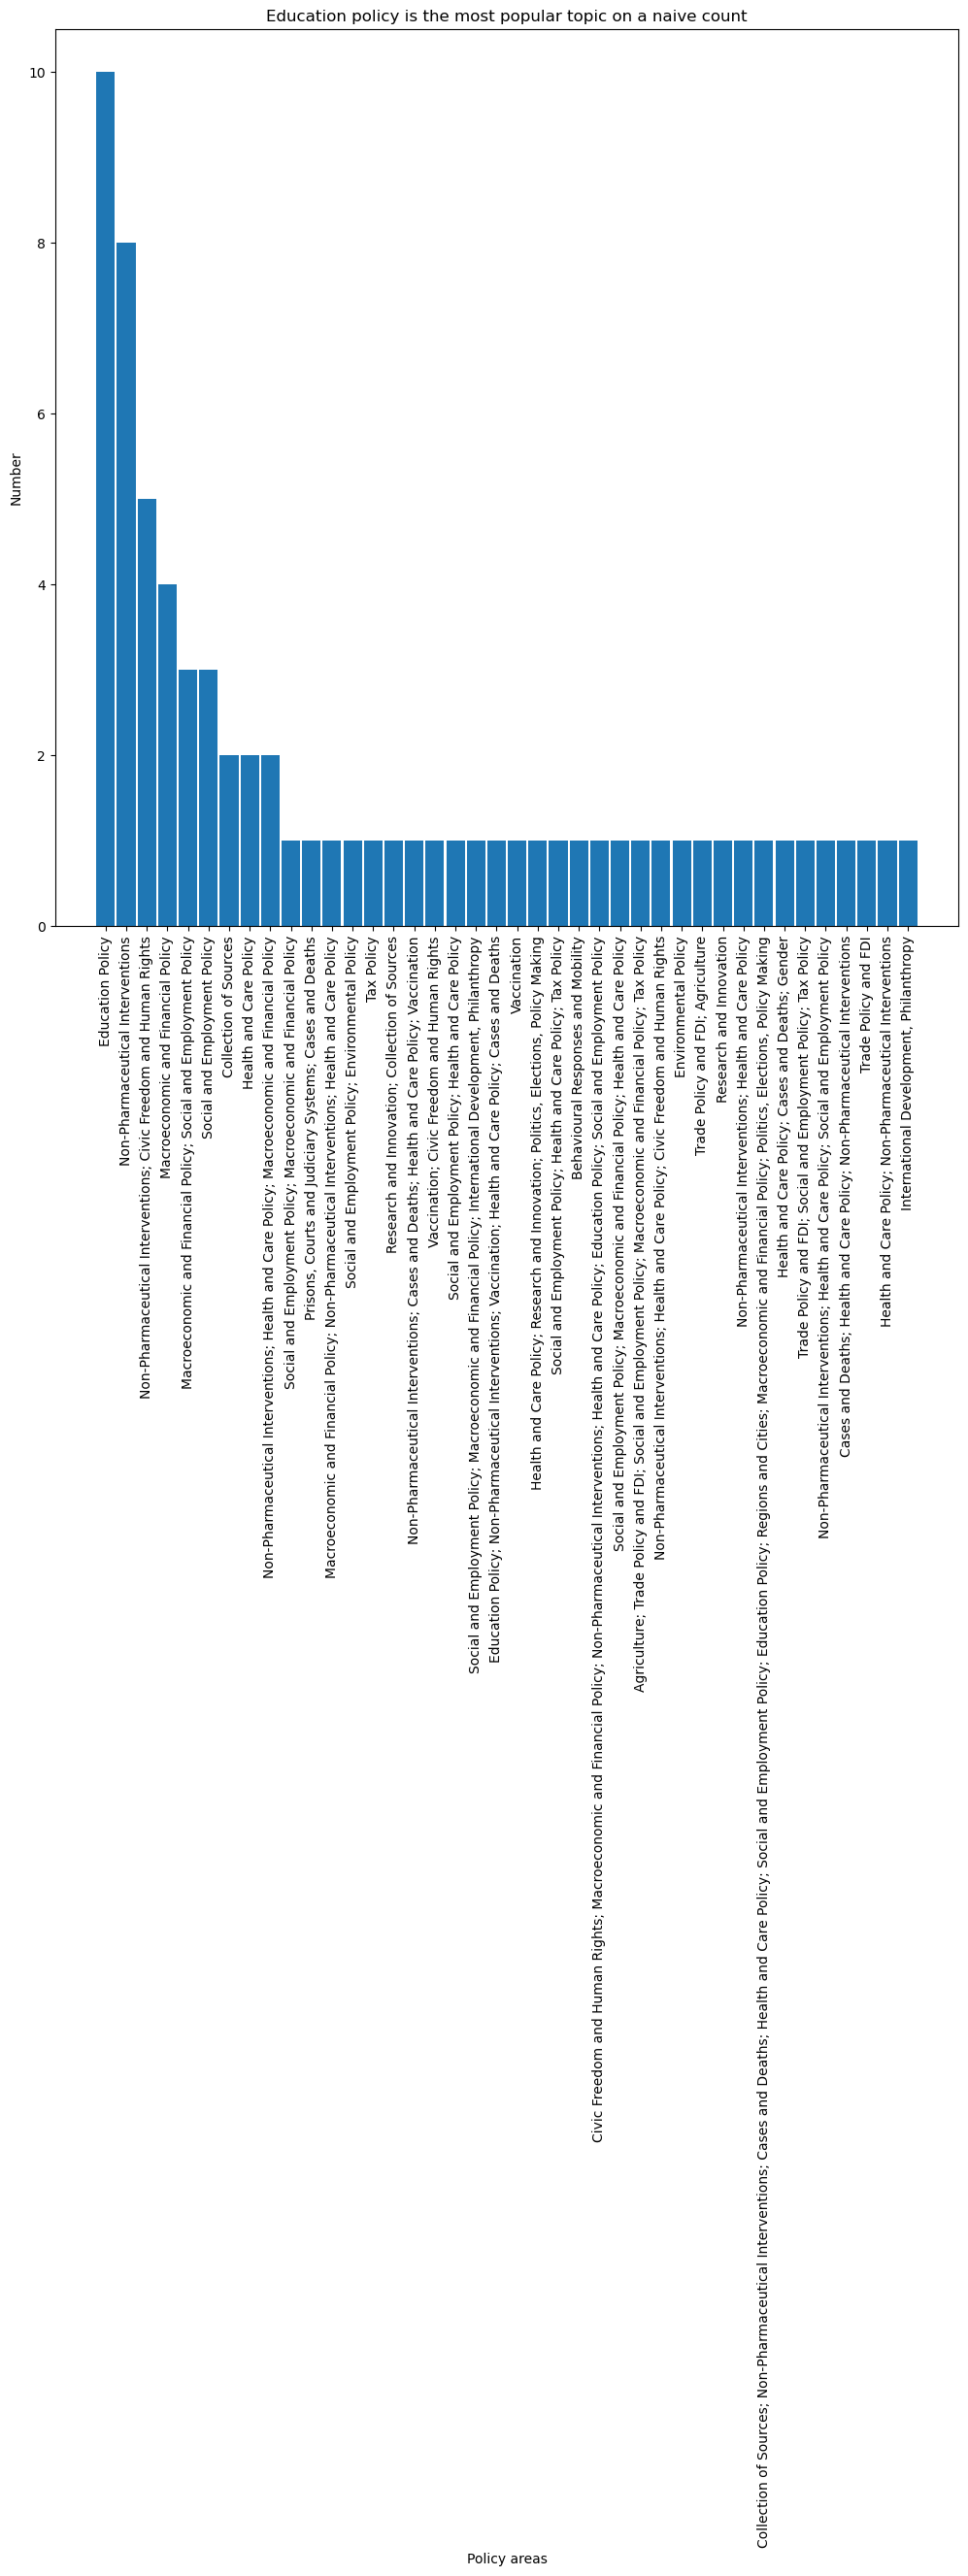

In [354]:
# Plots counts
plt.figure(figsize =(12, 12))
plt.bar(policy_areas.index, height = policy_areas['Policy Area'], width = 0.9, color = None)
plt.xticks(rotation=90)
plt.title('Education policy is the most popular topic on a naive count')
plt.xlabel('Policy areas')
plt.ylabel('Number')
plt.show()

<div class="alert-info">
On a naive groupinbg of the policy area tags, 'education policy' and then 'non-pharmaceutical interventions' are the most common. It's a naive count, because the bunching of policy areas creates unique entries in the column, some of which might contain more popular tags that rarely occur alone. But there is something useful that's suggested by the naive count: education policy might be a type of intervention that doesn't often cluster with any other type. 
    
<br>
    
But let's first have look at how the data policy tags might have been entered. Below is the list of policy areas from the Oxford Supertracker <a href="https://supertracker.spi.ox.ac.uk/documentation/" target="_blank">documentation</a>.
</div>

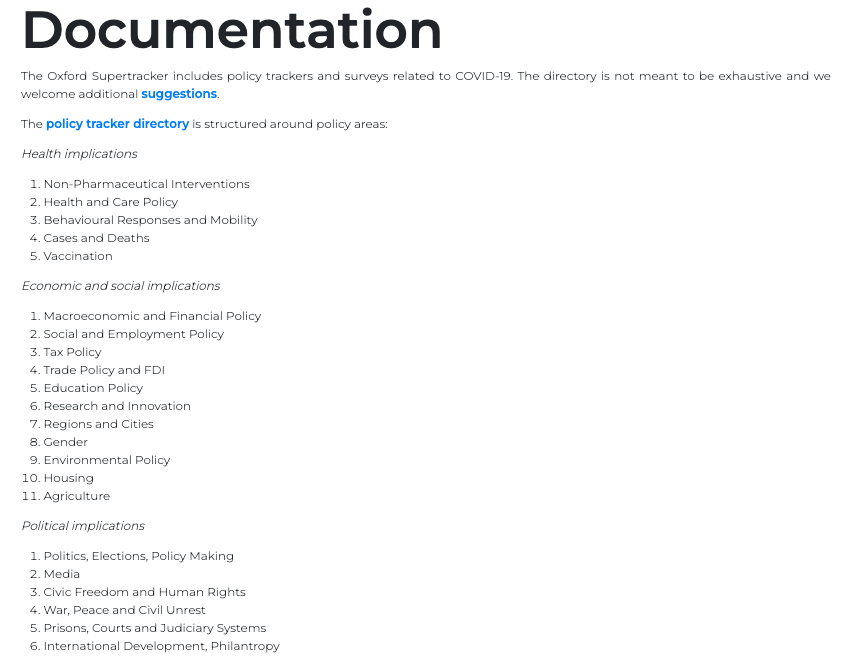

<div class="alert-info">
The policy areas list is logical and simple, and likely covers all of the topics that one might think of. But how did the entries get their labels? Let's have a look at the <a href="https://supertracker.spi.ox.ac.uk/submit-a-tracker/" target="_blank">submission form</a>.
</div>

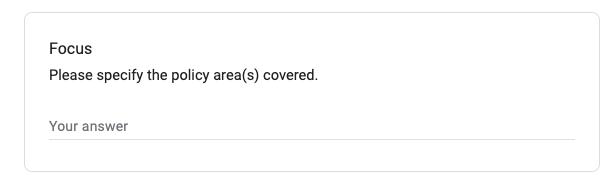

<div class="alert-info">
The box above is the only one on the form that takes identification of a policy area, but it's free form. As there are no drop-down lists here or elsewhere it's likely that the tags were attributed to submissions by editors at the tracker rather than the authors of the submissions. 
    
<br>
    
Looking at education policy entries below evidences this process somewhat, with submission authors likely having provided the text in the 'focus' column and their them being summarised with a policy area tag. 
</div>

In [355]:
# Shows the text and entries given for education policy entries
focus_policy_areas.loc[focus_policy_areas['Policy Area'] == 'Education Policy']

Title       Policy Area  \
2               CGD - COVID education policy tracking  Education Policy   
8         COVID-19 Global Education Recovery Tracker   Education Policy   
16                           COVID-19 School Data Hub  Education Policy   
22    Cato COVID-19 Permanent Private School Closures  Education Policy   
38  How are children going back to school in Ameri...  Education Policy   
55                                School COVID Survey  Education Policy   
58       Stanford School Enrollment Project 2020-2021  Education Policy   
65  UNESCO COVID-19 Educational Disruption and Res...  Education Policy   
68  World Bank - UNESCO- UNICEF Survey on National...  Education Policy   
69  World Bank Education Team COVID tracking datab...  Education Policy   

                                                Focus  
2                                     school closures  
8   Tracks ongoing information about the global st...  
16  A central database for educators, researchers,...  
22  Permanent closures of private schools at least...  
38  Provides the 2020-2021 back-to-school policies...  
55  Provides school policies in the districts of f...  
58  Examines COVID-19’s impact on school enrollmen...  
65                                    school closures  
68  National education responses to school closure...  
69  School closures related to the COVID-19 pandem...

<div class="alert-info">
Let's look at some more complicated entries. 
</div>

In [356]:
# Finds select, complicated entries
focus_policy_areas.iloc[[24, 39, 68]]

Title  \
24                             Corona Daten Plattform   
39                               IGC COVID-19 tracker   
68  World Bank - UNESCO- UNICEF Survey on National...   

                                          Policy Area  \
24  Collection of Sources; Non-Pharmaceutical Inte...   
39  Social and Employment Policy; Macroeconomic an...   
68                                   Education Policy   

                                                Focus  
24  provides datasets on Germany on a broadrange o...  
39   economic support measures for countries world...  
68  National education responses to school closure...

<div class="alert-info">
The policy area tags for these entries are notable for the fact that the free text in the Focus column is in two of the instances not enough to justify the tags given. There must have been editorial investigation of the sources that went beyond the submissions. 
    
<br>

We've also still got a problem with the entries that described as being a 'collection'. We previously addressed those that had their type listed as 'collection'. But some are still solely described as a 'Collection of Sources' in the policy area column, or have the term as one of several tags. Given that we've decided to focus on policy trackers, it will be more helpful to have the former hold tags on what they are tracking - even in a meta way - and the latter not include the term at all. 
    
<br> 
Let's rename the entries that are listed as 'Collection of Sources' to a relevant policy category or set of them.   
</div>

In [357]:
# Checks the type change
oxford_supertracker.loc[oxford_supertracker['Policy Area'] == 'Collection of Sources']

Title  \
14  COVID-19 Resource Tracker: A Guide to State an...   
51                                 OxCOVID19 Database   

                                                 Link            Policy Area  \
14  https://www.urban.org/policy-centers/health-po...  Collection of Sources   
51                      https://covid19.eng.ox.ac.uk/  Collection of Sources   

                                                Focus Country Coverage  \
14  This guide is a spreadsheet compiling more tha...              USA   
51  large, single-centre, multimodal relational da...        worldwide   

        Data Format                                            Authors  \
14             xlsx  [Urban Institute](https://twitter.com/urbanins...   
51  csv; PostgreSQL  [University of Oxford, Department of Engineeri...   

              Type Level of Observation  Start Date    End Date  \
14  Policy Tracker         sub-national  2020-03-01  2021-04-09   
51  Policy Tracker                  NaN  2020-01-30  up-to-date   

                                               Source Language  \
14  Governmental agencies; Media; Academics; Think...  English   
51  Governmental agencies; International organisat...  English   

                                         World Region     Provider  
14                                      North America  Think tanks  
51  worldwide; Sub-Saharan Africa; East Asia & Pac...    Academics

<div class="alert-info">
Let's change the policy area for the COVID-19 Resource Tracker first, using the categories listed on its website. 
</div>

In [358]:
# Changes the policy areas for COVID-19 Resource Tracker: A Guide to State and Local Responses
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('COVID-19 Resource Tracker: A Guide to State and Local Responses', na=False), ['Policy Area']] = 'Health and Care Policy; Non-Pharmaceutical Interventions; Housing; Social and Employment Policy; Education Policy; Politics, Elections, Policy Making'

In [359]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Resource Tracker: A Guide to State and Local Responses']

Title  \
14  COVID-19 Resource Tracker: A Guide to State an...   

                                                 Link  \
14  https://www.urban.org/policy-centers/health-po...   

                                          Policy Area  \
14  Health and Care Policy; Non-Pharmaceutical Int...   

                                                Focus Country Coverage  \
14  This guide is a spreadsheet compiling more tha...              USA   

   Data Format                                            Authors  \
14        xlsx  [Urban Institute](https://twitter.com/urbanins...   

              Type Level of Observation  Start Date    End Date  \
14  Policy Tracker         sub-national  2020-03-01  2021-04-09   

                                               Source Language   World Region  \
14  Governmental agencies; Media; Academics; Think...  English  North America   

       Provider  
14  Think tanks

<div class="alert-info">
We'll actually remove the OxCOVID19 Database as its policy trackling refers to the Oxford Covid-19 Government Response Tracker, which is listed elsewhere in the dataset. 

</div>

In [360]:
# Removes the OxCOVID19 Database 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'].str.contains('OxCOVID19 Database', na=False)].index)

In [361]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'OxCOVID19 Database']

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

In [362]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [363]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 69 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Now we'll remove the cluster references from the other entries.
</div>

In [364]:
# Finds the entries with 'collection' in their policy area tags
oxford_supertracker.loc[oxford_supertracker['Policy Area'].str.contains('Collection')]

Title  \
24                           Corona Daten Plattform   
49  Open Government Approaches to Tackling COVID-19   

                                                 Link  \
24              https://www.corona-datenplattform.de/   
49  https://www.opengovpartnership.org/collecting-...   

                                          Policy Area  \
24  Collection of Sources; Non-Pharmaceutical Inte...   
49     Research and Innovation; Collection of Sources   

                                                Focus  \
24  provides datasets on Germany on a broadrange o...   
49   a list of open government approaches, such as...   

                                     Country Coverage Data Format  \
24                                                DEU         csv   
49   worldwide; ARG; AUS; AZE; BHR; BGD; BEL; BEN;...   xlsx; csv   

                                              Authors            Type  \
24  [infas](https://www.infas.de/); [German Federa...  Policy Tracker   
49  [Open Gov Partnership](https://twitter.com/ope...  Policy Tracker   

   Level of Observation  Start Date    End Date  \
24         sub-national  2020-03-11  up-to-date   
49             national  2020-03-19  2021-05-23   

                                               Source Language  \
24                   Governmental agencies; Academics   German   
49  Governmental agencies; Think tanks; Companies;...  English   

                                         World Region  \
24                                        West Europe   
49  worldwide; Sub-Saharan Africa; East Asia & Pac...   

                       Provider  
24        Governmental agencies  
49  International organisations

<div class="alert-info">
There are three entries to deal with. Let's go through those. 
</div>

In [365]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Open Government Approaches to Tackling COVID-19', na=False), ['Policy Area']] = 'Research and Innovation'

In [366]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Open Government Approaches to Tackling COVID-19']

Title  \
49  Open Government Approaches to Tackling COVID-19   

                                                 Link  \
49  https://www.opengovpartnership.org/collecting-...   

                Policy Area  \
49  Research and Innovation   

                                                Focus  \
49   a list of open government approaches, such as...   

                                     Country Coverage Data Format  \
49   worldwide; ARG; AUS; AZE; BHR; BGD; BEL; BEN;...   xlsx; csv   

                                              Authors            Type  \
49  [Open Gov Partnership](https://twitter.com/ope...  Policy Tracker   

   Level of Observation  Start Date    End Date  \
49             national  2020-03-19  2021-05-23   

                                               Source Language  \
49  Governmental agencies; Think tanks; Companies;...  English   

                                         World Region  \
49  worldwide; Sub-Saharan Africa; East Asia & Pac...   

                       Provider  
49  International organisations

In [367]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('Corona Daten Plattform', na=False), ['Policy Area']] = 'Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making'

In [368]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'Corona Daten Plattform']

Title                                   Link  \
24  Corona Daten Plattform  https://www.corona-datenplattform.de/   

                                          Policy Area  \
24  Non-Pharmaceutical Interventions; Cases and De...   

                                                Focus Country Coverage  \
24  provides datasets on Germany on a broadrange o...              DEU   

   Data Format                                            Authors  \
24         csv  [infas](https://www.infas.de/); [German Federa...   

              Type Level of Observation  Start Date    End Date  \
24  Policy Tracker         sub-national  2020-03-11  up-to-date   

                              Source Language World Region  \
24  Governmental agencies; Academics   German  West Europe   

                 Provider  
24  Governmental agencies

In [369]:
# Removes 'Collection of Sources' from the the policy areas for Corona Daten Plattform
oxford_supertracker.loc[oxford_supertracker['Title'].str.contains('SARS-CoV-2 and COVID-19 DATA HUB', na=False), ['Policy Area']] = 'Health and Care Policy; Non-Pharmaceutical Interventions'

In [370]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'SARS-CoV-2 and COVID-19 DATA HUB']

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

<div class="alert-info">
And let's double-check on any entries with 'Collection of Sources' remaining in their policy area tags. 
</div>

In [371]:
# Finds the entries with 'collection' in their policy area tags
oxford_supertracker.loc[oxford_supertracker['Policy Area'].str.contains('Collection')]

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Type, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

<div class="alert-info">
As all entries are also now listed as policy trackers, we can drop the 'type' column. 
</div>

In [372]:
# Drops the Type column
oxford_supertracker = oxford_supertracker.drop(columns = 'Type')

In [373]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [374]:
# Checks the change
print(f"There are now {len(oxford_supertracker.index)} entries in the dataset, compared to {number_original_entries} at the beginning.")

There are now 69 entries in the dataset, compared to 232 at the beginning.


<div class="alert-info">
Having underaken the cleaning steps above, let's search in a non-naive way for how often the policy areas occur. The first step we'll take is to make a definitive list of the policy area search terms which agrees with the documentation.  
</div>

In [375]:
# Gets the set of unique and edited policy areas
policy_areas_edited = focus_policy_areas['Policy Area'].unique()

# Converts the array to a list
policy_areas_edited = policy_areas_edited.tolist()

# Shows starting list
policy_areas_edited

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Collection of Sources',
 'Trade Policy and FDI',
 'Cases and Deaths; Health and Care Policy; Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions; Health and Care Policy; Social and Employment Policy',
 'Trade Policy and FDI; Social and Employment Policy; Tax Policy',
 'Health and Care Policy; Cases and Deaths; Gender',
 'Collection of Sources; Non-Pharmaceutical Interventions; Cases and Deaths; Health and Care Policy; Social and Employment Policy; Education Policy; Regions and Cities; Macroeconomic and Financial Policy; Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions; Health and Care Policy',
 'Research and Innovation',
 'Macroeconomic and Financial Policy; Social and Employment Policy',
 'Tra

In [376]:
# Creates holding list of terms
policy_areas_holding = []

In [377]:
# Loops through the entries in the edited list
for entry in policy_areas_edited:
    # Splits any entry with a semi-colon and puts it into the holding list
    policy_areas_holding.append(entry.split('; '))

In [378]:
# Creates a list for the definitive terms
policy_areas_definitive = []

In [379]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in policy_areas_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Checks if the area is not repetitious
        if area not in policy_areas_definitive:
            # Adds the area to the definitive list if it isn't already in it
            policy_areas_definitive.append(area)

In [380]:
# Sorts final list alphabetically
policy_areas_definitive.sort()

In [381]:
# Removes 'Collection of Sources
policy_areas_definitive.pop(4)

'Collection of Sources'

In [382]:
# Sorts final list
policy_areas_definitive

['Agriculture',
 'Behavioural Responses and Mobility',
 'Cases and Deaths',
 'Civic Freedom and Human Rights',
 'Education Policy',
 'Environmental Policy',
 'Gender',
 'Health and Care Policy',
 'International Development, Philanthropy',
 'Macroeconomic and Financial Policy',
 'Non-Pharmaceutical Interventions',
 'Politics, Elections, Policy Making',
 'Prisons, Courts and Judiciary Systems',
 'Regions and Cities',
 'Research and Innovation',
 'Social and Employment Policy',
 'Tax Policy',
 'Trade Policy and FDI',
 'Vaccination']

<div class="alert-info">
Looking again at the <a href="https://supertracker.spi.ox.ac.uk/documentation/" target="_blank">documentation</a>, every term in the definitive list is from the set of terms used by the editors, but there are three of the latter that aren't attached to any entry in the database: housing; media; War, Peace and Civil Unrest. That's interesting, as it raises questions about activity in those areas or the tracking of it.
    
<br>
    
Let's now look at which tags are most common in the database. We'll do that first in a few steps below, starting by creating counters for the terms and then using for loops to do the counting. 
</div>

In [383]:
# Makes counters for policy areas terms used
agriculture = 0
behavioural_responses_and_mobility = 0
cases_and_deaths = 0
civic_freedom_and_human_rights = 0
education_policy = 0
environmental_policy = 0
gender = 0
health_and_care_policy = 0
international_development_philanthropy = 0
macroeconomic_and_financial_policy = 0
non_pharmaceutical_interventions = 0
politics_elections_policy_making = 0
prisons_courts_and_judiciary_systems = 0
regions_and_cities = 0
research_and_innovation = 0
social_and_employment_policy = 0
tax_policy = 0
trade_policy_and_fdi = 0
vaccination = 0

In [384]:
# Creates list for all policy areas entered
policy_areas_entered = oxford_supertracker['Policy Area'].tolist()

In [385]:
# Checks list type
type(policy_areas_entered)

list

In [386]:
# Creates holding list of terms
policy_areas_entered_holding = []

In [387]:
# Loops through the entries in the entered list
for entry in policy_areas_entered:
    # Splits any entry with a semi-colon and puts it into the holding list
    policy_areas_entered_holding.append(entry.split('; '))

In [388]:
# Creates a list for the definitive terms
policy_areas_entered = []

In [389]:
# Appends the split entries to the definitive list, starting with a loop through the entries
for entry in policy_areas_holding:
    # Loops through the policy areas in each entry
    for area in entry:
        # Adds the area to the definitive list if it isn't already in it
        policy_areas_entered.append(area)

In [390]:
# Checks entered list
policy_areas_entered

['Non-Pharmaceutical Interventions',
 'Macroeconomic and Financial Policy',
 'Education Policy',
 'Health and Care Policy',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Civic Freedom and Human Rights',
 'Health and Care Policy',
 'Collection of Sources',
 'Trade Policy and FDI',
 'Cases and Deaths',
 'Health and Care Policy',
 'Non-Pharmaceutical Interventions',
 'Non-Pharmaceutical Interventions',
 'Health and Care Policy',
 'Social and Employment Policy',
 'Trade Policy and FDI',
 'Social and Employment Policy',
 'Tax Policy',
 'Health and Care Policy',
 'Cases and Deaths',
 'Gender',
 'Collection of Sources',
 'Non-Pharmaceutical Interventions',
 'Cases and Deaths',
 'Health and Care Policy',
 'Social and Employment Policy',
 'Education Policy',
 'Regions and Cities',
 'Macroeconomic and Financial Policy',
 'Politics, Elections, Policy Making',
 'Non-Pharmaceutical Interventions',
 'Health and Care Policy',
 'Research and Innovation',
 'Macroeconomic a

In [391]:
# Loops through list of entered terms
for area in policy_areas_entered:
    # Checks areas against list of terms
    if area == 'Agriculture':
        agriculture += 1
    if area == 'Behavioural Responses and Mobility':
        behavioural_responses_and_mobility += 1
    if area == 'Cases and Deaths':
        cases_and_deaths += 1
    if area == 'Civic Freedom and Human Rights':
        civic_freedom_and_human_rights += 1
    if area == 'Education Policy':
        education_policy += 1
    if area == 'Environmental Policy':
        environmental_policy += 1
    if area == 'Gender':
        gender += 1
    if area == 'Health and Care Policy':
        health_and_care_policy += 1
    if area == 'International Development, Philanthropy':
        international_development_philanthropy += 1
    if area == 'Macroeconomic and Financial Policy':
        macroeconomic_and_financial_policy += 1
    if area == 'Non-Pharmaceutical Interventions':
        non_pharmaceutical_interventions += 1
    if area == 'Politics, Elections, Policy Making':
        politics_elections_policy_making += 1
    if area == 'Prisons, Courts and Judiciary Systems':
        prisons_courts_and_judiciary_systems += 1
    if area == 'Regions and Cities':
        regions_and_cities += 1
    if area == 'Research and Innovation':
        research_and_innovation += 1
    if area == 'Social and Employment Policy':
        social_and_employment_policy += 1
    if area == 'Tax Policy':
        tax_policy += 1
    if area == 'Trade Policy and FDI':
        trade_policy_and_fdi += 1
    if area == 'Vaccination':
        vaccination += 1

In [392]:
# Creates dictionary of policy areas tags
policy_areas_tags_counts = {}

In [393]:
# Adds entries to the dictionary, adding the three areas with no entries
policy_areas_tags_counts['Agriculture'] = agriculture
policy_areas_tags_counts['Behavioural Responses and Mobility'] = behavioural_responses_and_mobility
policy_areas_tags_counts['Cases and Deaths'] = cases_and_deaths
policy_areas_tags_counts['Civic Freedom and Human Rights'] = civic_freedom_and_human_rights
policy_areas_tags_counts['Education Policy'] = education_policy
policy_areas_tags_counts['Environmental Policy'] = environmental_policy
policy_areas_tags_counts['Gender'] = gender
policy_areas_tags_counts['Health and Care Policy'] = health_and_care_policy
policy_areas_tags_counts['International Development, Philanthropy'] = international_development_philanthropy
policy_areas_tags_counts['Macroeconomic and Financial Policy'] = macroeconomic_and_financial_policy
policy_areas_tags_counts['Non-Pharmaceutical Interventions'] = non_pharmaceutical_interventions
policy_areas_tags_counts['Politics, Elections, Policy Making'] = politics_elections_policy_making
policy_areas_tags_counts['Prisons, Courts and Judiciary Systems'] = prisons_courts_and_judiciary_systems
policy_areas_tags_counts['Regions and Cities'] = regions_and_cities
policy_areas_tags_counts['Research and Innovation'] = research_and_innovation
policy_areas_tags_counts['Social and Employment Policy'] = social_and_employment_policy
policy_areas_tags_counts['Tax Policy'] = tax_policy
policy_areas_tags_counts['Trade Policy and FDI'] = trade_policy_and_fdi
policy_areas_tags_counts['Vaccination'] = vaccination
policy_areas_tags_counts['Housing'] = 0
policy_areas_tags_counts['Media'] = 0
policy_areas_tags_counts['War, Peace and Civil Unrest'] = 0

<div class="alert-info">
Now that we've been through a few steps of lists and loops, let's get the information we want, first in a table and then with a chart. 
</div>

In [394]:
# Puts the dictionary into a dataframe to be counted
policy_areas_tags_counts_frame = pd.DataFrame.from_dict(policy_areas_tags_counts, orient ='index', columns = ['Count']).sort_values(by ='Count', ascending = False)

# Shows frame
policy_areas_tags_counts_frame

Count
Health and Care Policy                      17
Non-Pharmaceutical Interventions            13
Social and Employment Policy                13
Macroeconomic and Financial Policy          10
Cases and Deaths                             6
Civic Freedom and Human Rights               4
Education Policy                             4
Vaccination                                  4
Trade Policy and FDI                         4
Tax Policy                                   4
Research and Innovation                      3
Agriculture                                  2
Politics, Elections, Policy Making           2
International Development, Philanthropy      2
Environmental Policy                         2
Regions and Cities                           1
Prisons, Courts and Judiciary Systems        1
Behavioural Responses and Mobility           1
Gender                                       1
Housing                                      0
Media                                        0
War, Peace and Civil Unrest                  0

<div class="alert-info">
The table shows what we suspected from the earlier naive counting: health-related tags are more common than education policy ones. This also reflects the <a href="https://supertracker.spi.ox.ac.uk/update-july2021/" target="_blank">Oxford Supertracker counting of the tags</a>.
    
<br>
    
Let's look at the distribution graphically. 
</div>

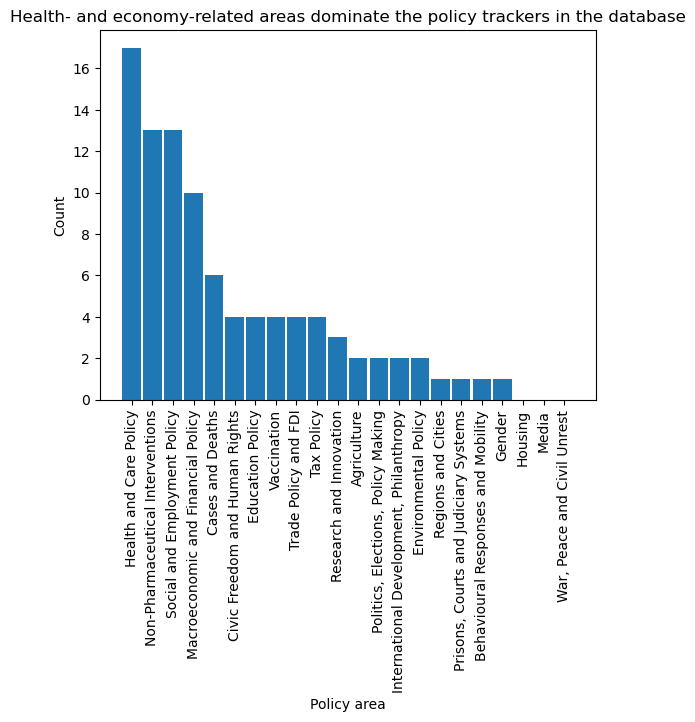

In [395]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(policy_areas_tags_counts_frame.index, policy_areas_tags_counts_frame['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('Health- and economy-related areas dominate the policy trackers in the database')
plt.xlabel('Policy area')
plt.ylabel('Count')
plt.show()

<div class="alert-info">
The policy area tags counts suggest that we've got a list of datasets that are heavy on health and fiscal policy, with only some tracking of areas beyond that. The distribution of the tags is a first step the discussion of the policy space that governments had and how they used it. We can't go much further than this at the moment, but it's a start.   
    
<br>
    
To take another small step into the policy space question, let's look at how pairs of policy area arise across the tags. In other words, when a dataset is tagged with 'health and care policy', which other areas is it also tagged with? We'll look at this using some functions described at the start of the notebook, looking across all of the policy tags and how they arose. 
</div>

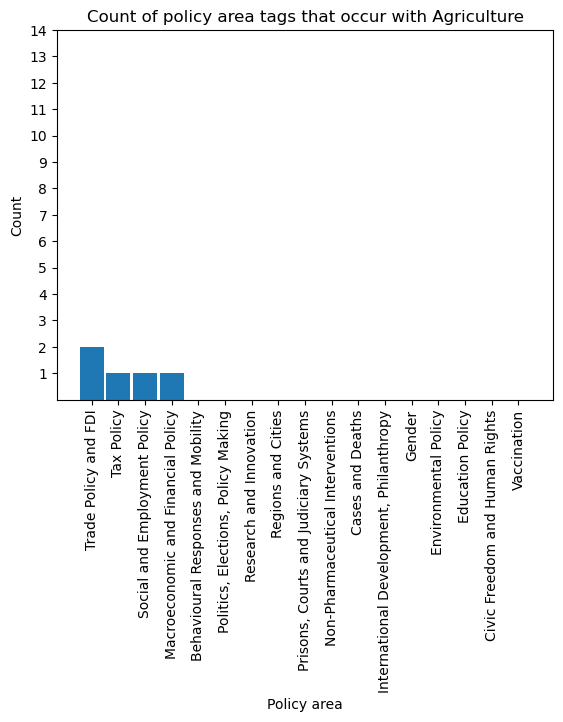

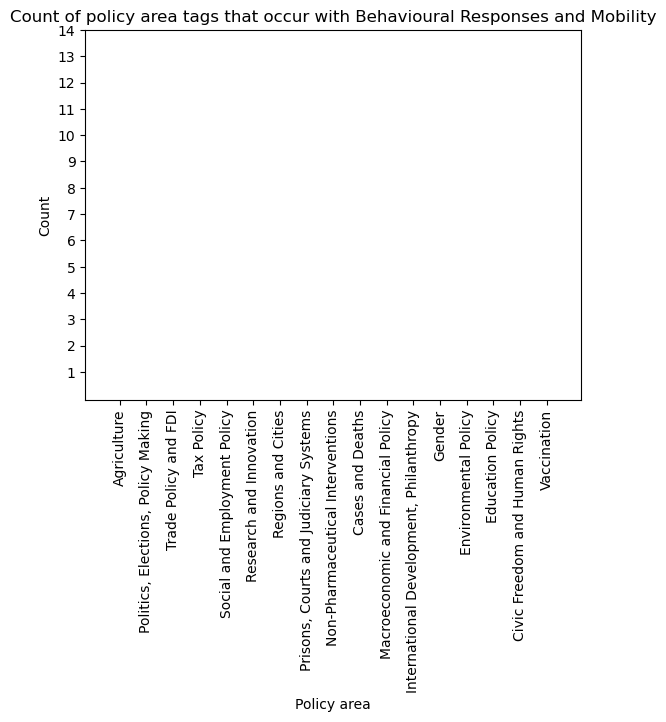

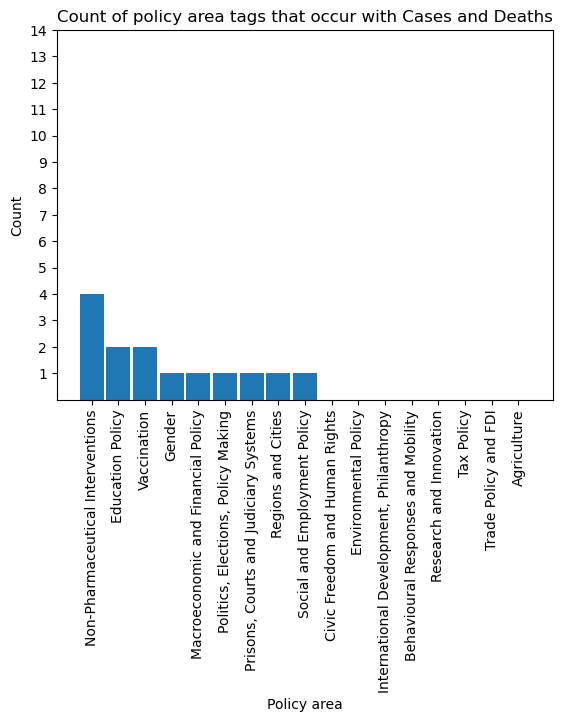

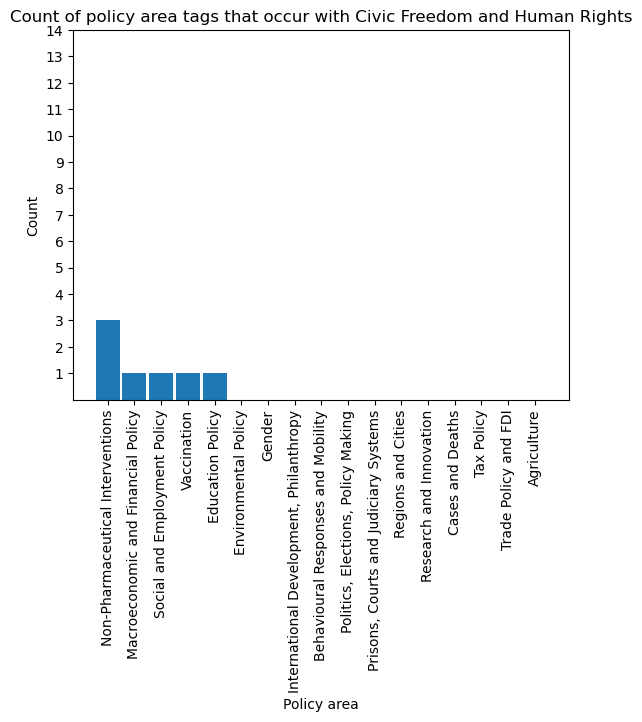

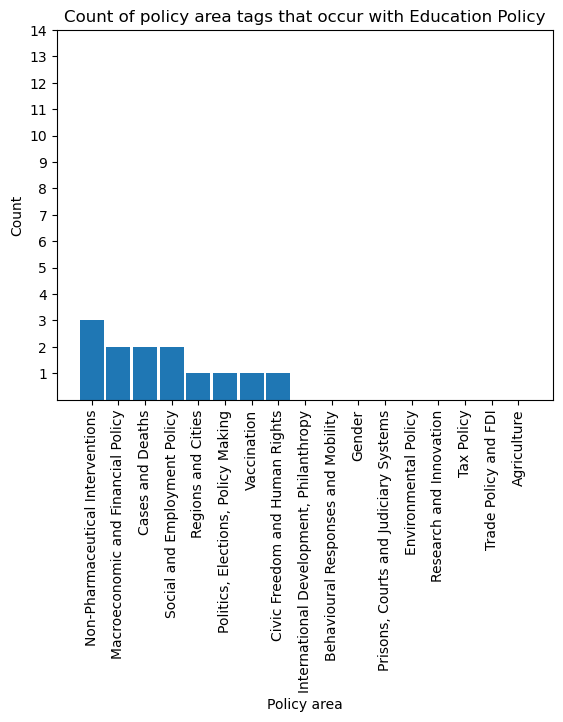

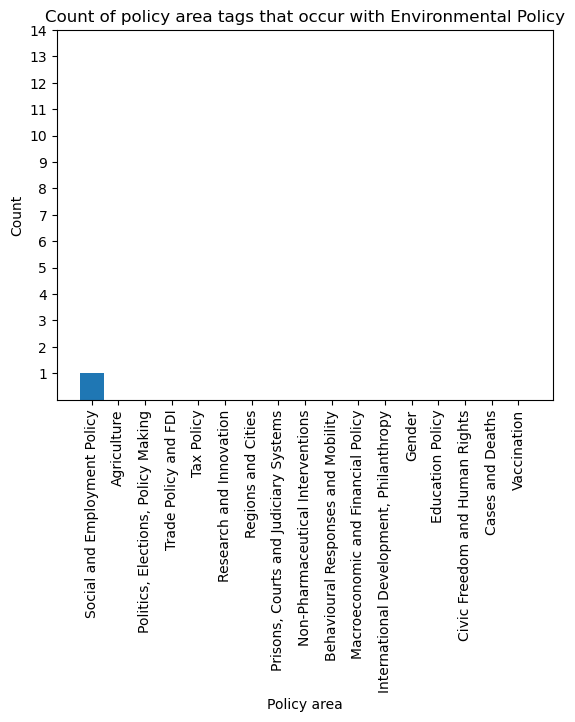

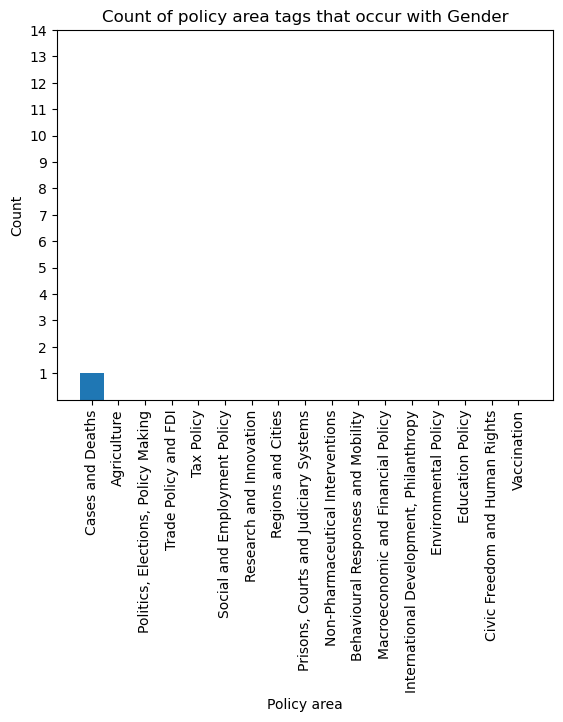

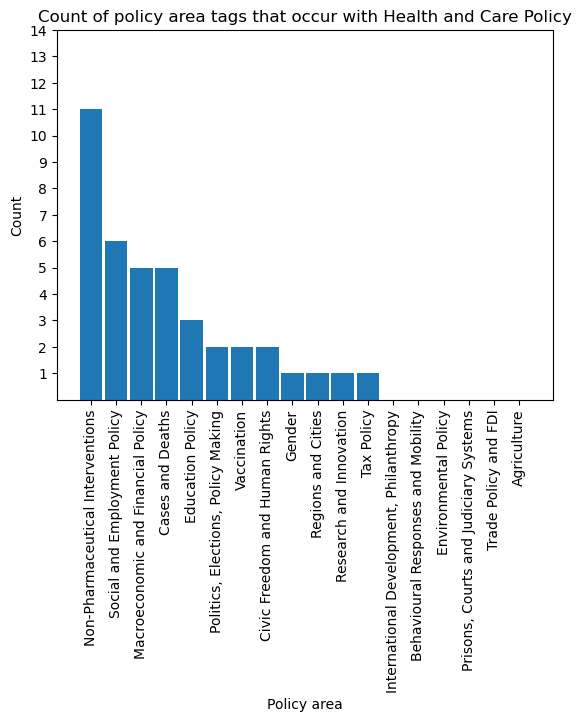

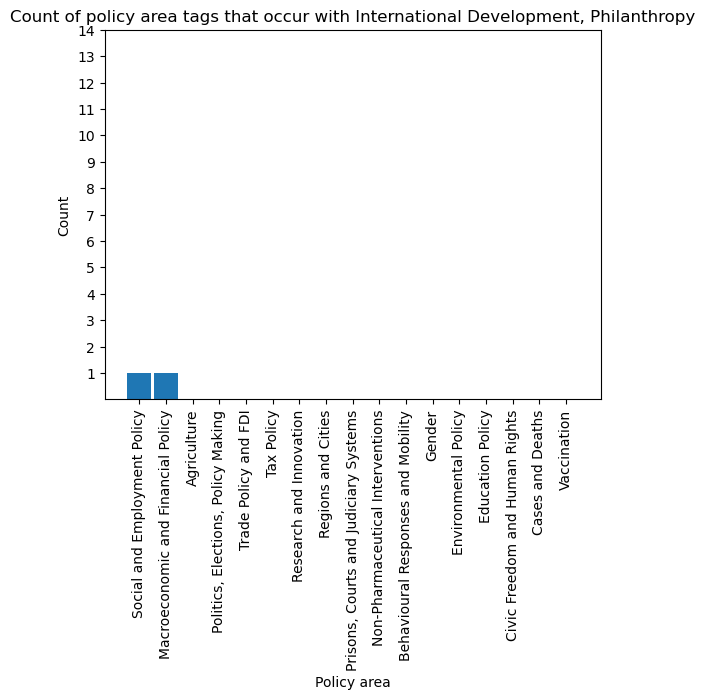

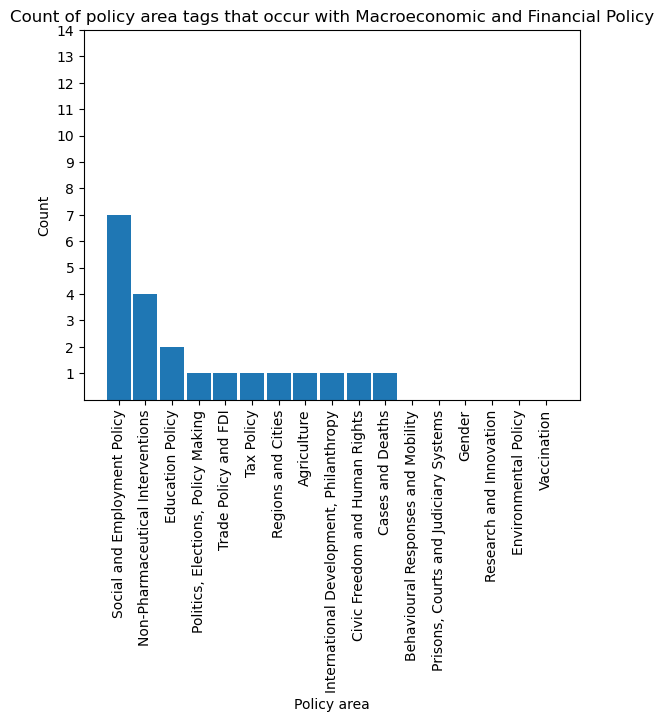

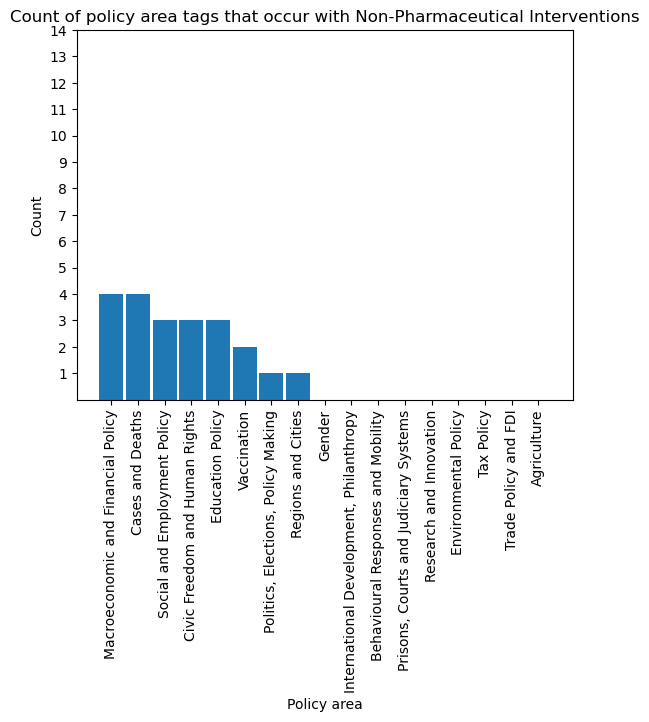

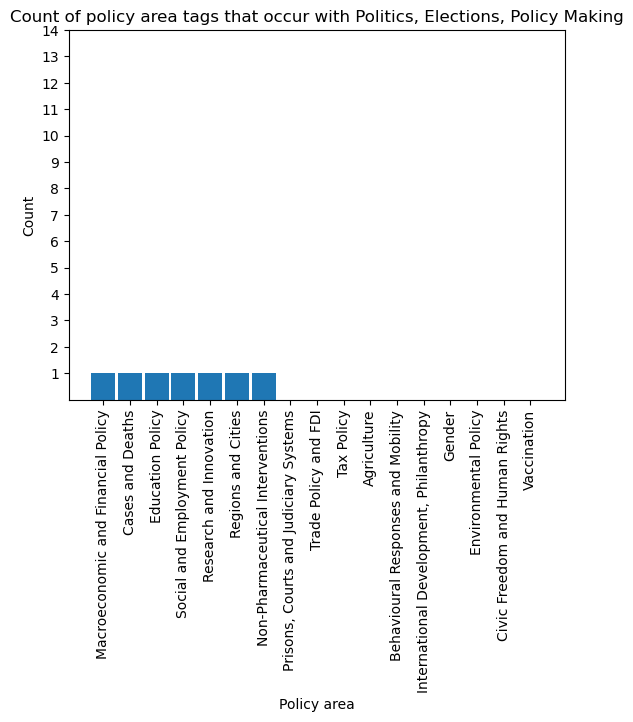

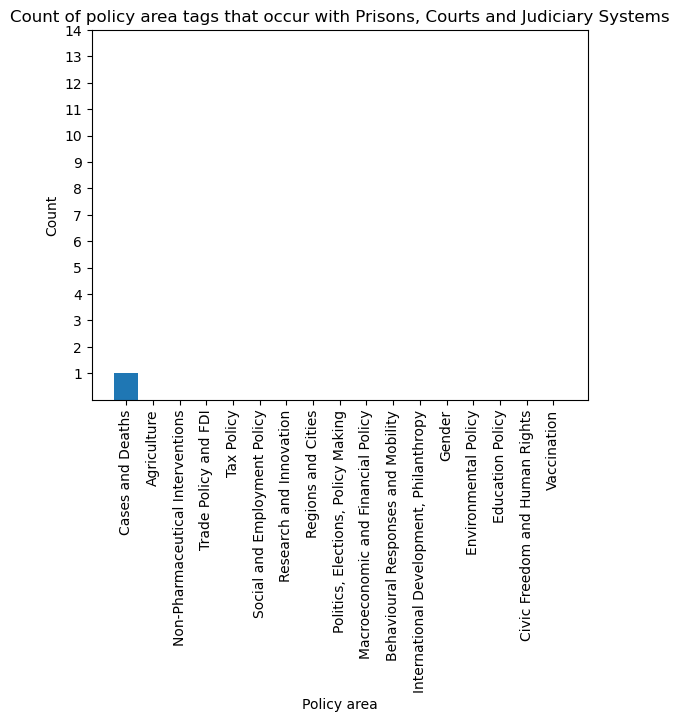

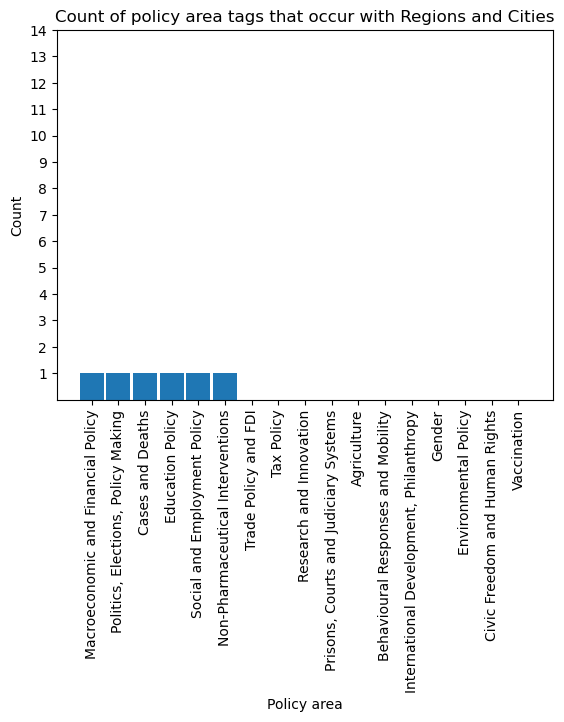

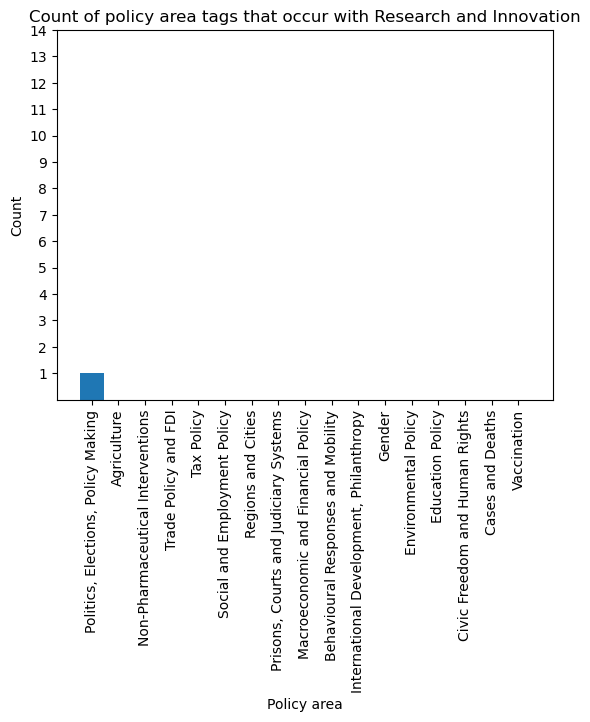

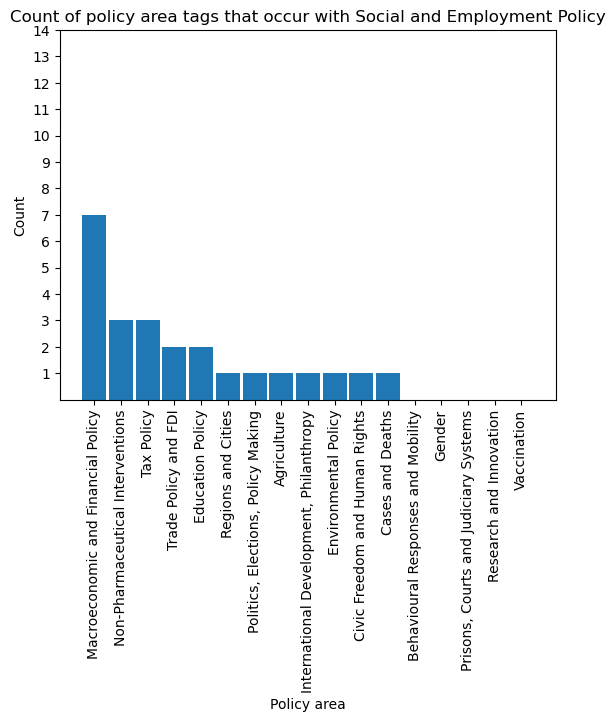

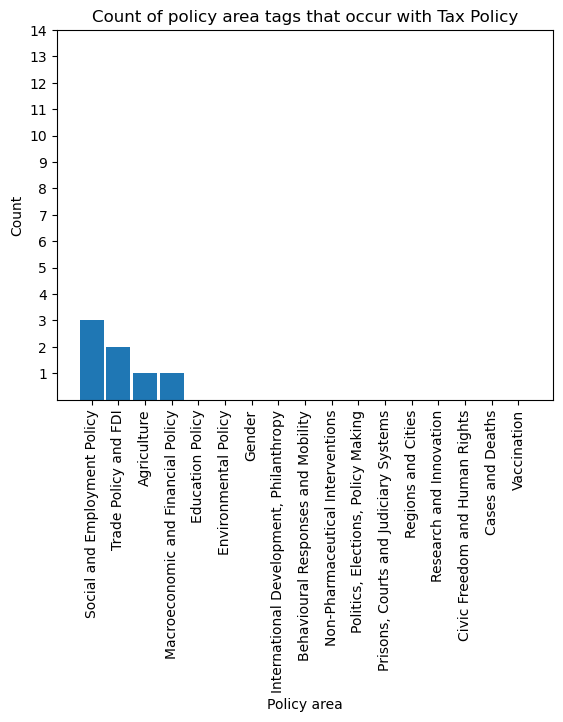

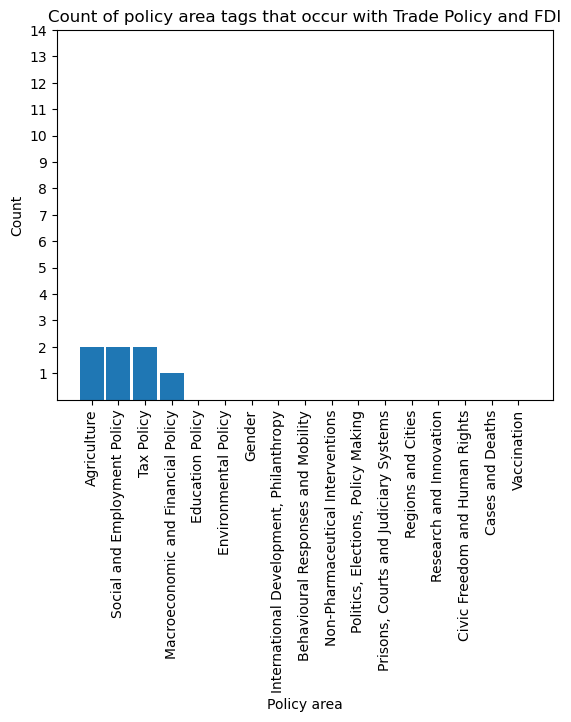

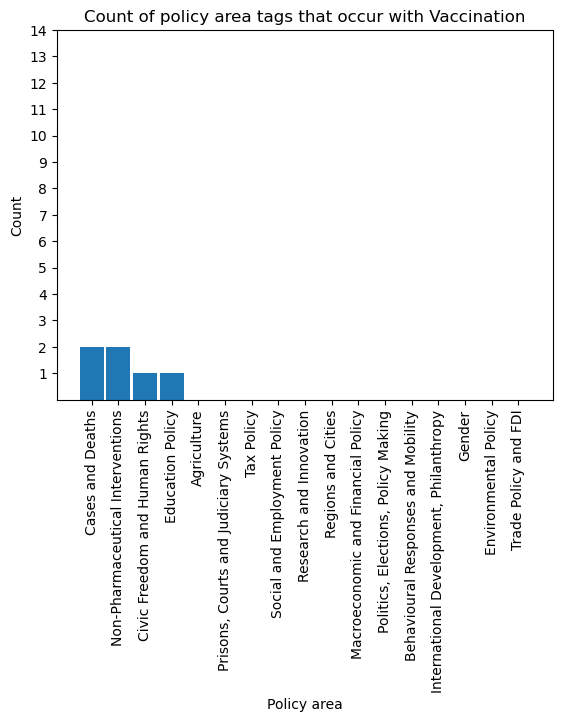

In [396]:
# Uses a function to count when secondary tags occur, aftera primary one from the defintive list
grouped_tags_charts(policy_areas_definitive, policy_areas_edited)

<div class="alert-info">
There are a few things to note from the charts: 
    
- The Health and Care Policy tag often occurs with similar ones, such as that on non-pharmaceutical interventions, but also a range of others. Perhaps that means that when authors were compiling policy trackers, they were more likely to start with health-related policy, adding other topics to it. If that were the case - again, we can't assess this in depth now - it might suggest bias in how trackers mapped the policy space. On the other hand, it could also mean that governments would associate many different types of intervention with health-related ones, when making announcements. 
- Fiscal policy appears, so far, to be the only other intervention cluster. When a dataset was tagged as about macroeconomic and financial policy, tags on labour market policy also tended to arise. 
    
<br>
And that brings to an end our skim of the policy areas - their topics - and focus. 
    
<br>
    
Let's now look at how the dates have been set, and their distribution, across the datasets. 
    
</div>

## Dates
<a id='dates'></a>

<div class="alert-info">
We're interested in some simple questions:
    
- What's the distribution of start dates?
- What's the distribution of end dates?
- Do the temporal entries look broadly correct across the datasets? 

<br>
Let's start by putting the key information into a sub-table. 
    
</div>

In [397]:
# Creates sub-table of the most relevant information for looking at the temporal features
dates_dataframe = oxford_supertracker[['Title', 'Start Date', 'End Date']]

# Shows sub-table
dates_dataframe

Title  Start Date    End Date
0                                          #Masks4All  2020-03-16  2020-12-21
1   A global database on central banks' monetary r...  2020-02-03  2021-02-16
2               CGD - COVID education policy tracking  2020-02-12  up-to-date
3                     CIHI COVID-19 Intervention Scan  2020-05-05  2022-01-31
4   COVID Analysis and Mapping of Policies (AMP) site  2020-01-01  up-to-date
..                                                ...         ...         ...
64  UNESCO COVID-19 Educational Disruption and Res...  2020-02-17  up-to-date
65  UNOCHA Financial Tracking Service - Coronaviru...  2020-03-11  up-to-date
66        WHO PHSM: Public health and social measures  2020-01-04  up-to-date
67  World Bank - UNESCO- UNICEF Survey on National...  2020-04-20  2020-06-26
68  World Bank Education Team COVID tracking datab...  2020-01-01  2021-03-15

[69 rows x 3 columns]

<div class="alert-info">
Let's look at the entries in the start date and end data columns. 
    
</div>

In [398]:
# Gives the unique entries in the 'start date' column
dates_dataframe['Start Date'].unique()

array(['2020-03-16', '2020-02-03', '2020-02-12', '2020-05-05',
       '2020-01-01', 'up-to-date', '2020-01-27', '2020-03-11',
       '2020-01-24', '2020-12-12', '2020-12-14', '2020-03-01',
       '2020-09-01', '2020-05-21', '2020-03-05', '2020-02-28',
       '2020-01-23', '2020-04-30', '2020-03-20', '2020-01-07',
       '2020-02-15', '2020-08-10', '2020-03-17', '2020-02-01',
       '2020-04-08', '2020-01-08', '2020-03-19', '2020-03-31',
       '2020-07-30', '2021-01-20', '2021-02-16', '2020-02-17',
       '2020-01-04', '2020-04-20'], dtype=object)

In [399]:
# Gives the unique entries in the 'start date' column
dates_dataframe['Start Date'].isna().sum()

0

In [400]:
# Gives the unique entries in the 'start date' column
dates_dataframe['End Date'].unique()

array(['2020-12-21', '2021-02-16', 'up-to-date', '2022-01-31',
       '2020-12-31', '2020-05-31', '2020-04-30', '2021-04-09',
       '2021-05-31', '2020-07-31', '2021-03-31', '2020-03-26',
       '2020-11-15', '2021-01-06', '2021-04-30', '2021-03-17',
       '2020-10-01', '2020-12-18', '2020-08-17', '2020-05-10',
       '2021-05-10', '2020-10-24', '2020-06-20', '2020-12-23',
       '2020-07-24', '2021-04-22', '2021-05-23', '2020-06-30',
       '2020-08-30', '2022-02-02', '2021-08-31', '2021-04-21',
       '2020-06-26', '2021-03-15'], dtype=object)

In [401]:
# Gives the unique entries in the 'start date' column
dates_dataframe['End Date'].isna().sum()

0

<div class="alert-info">
We haven't got a problem with missing date entries, but the 'up-to-date' ones will prevent us from doing DateTime and other temporal searches. We've got a few options for amendinh the entries, but let's count and locate the datasets first. 
    
</div>

In [402]:
# Counts the number of 'up-to-date' entries in the 'end date' column
(dates_dataframe['Start Date'] == 'up-to-date').sum()

1

In [403]:
# Counts the number of 'up-to-date' entries in the 'end date' column
(dates_dataframe['End Date'] == 'up-to-date').sum()

34

<div class="alert-info">
We've got more of a problem with end dates than start dates, so let's deal with the former first. 
    
</div>

In [404]:
# Gives the one entry with 'up-to-date' in the 'start date' column
oxford_supertracker.loc[oxford_supertracker['Start Date'] == 'up-to-date']

Title                                    Link  \
6  COVID-19 Economic Stimulus Index  http://web.boun.edu.tr/elgin/COVID.htm   

                          Policy Area  \
6  Macroeconomic and Financial Policy   

                                        Focus  \
6   fiscal, monetary & exchange rate measures   

                                    Country Coverage Data Format  \
6  worldwide; AFG; ALB; DZA; AGO; ARG; ARM; AUS; ...        xlsx   

                                             Authors Level of Observation  \
6  [Ceyhun Elgin](https://twitter.com/CeyhunElgin...             national   

   Start Date    End Date                                  Source Language  \
6  up-to-date  up-to-date  International organisations; Academics  English   

                                        World Region   Provider  
6  worldwide; Sub-Saharan Africa; East Asia & Pac...  Academics

<div class="alert-info">
The <a href="https://web.boun.edu.tr/elgin/COVID.htm" target="_blank">COVID-19 Economic Stimulus Index</a> has dates in its <a href="https://web.boun.edu.tr/elgin/CESI_16.xlsx" target="_blank">spreadsheet</a> from 14th July 2020 to 7th May 2021. Let's use those dates. 
    
</div>

In [405]:
# Changes the start date
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Economic Stimulus Index', ['Start Date']] = '2020-07-14' 

In [406]:
# Changes the end date
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Economic Stimulus Index', ['End Date']] = '2021-05-07' 

In [407]:
# Checks the change
oxford_supertracker.loc[oxford_supertracker['Title'] == 'COVID-19 Economic Stimulus Index']

Title                                    Link  \
6  COVID-19 Economic Stimulus Index  http://web.boun.edu.tr/elgin/COVID.htm   

                          Policy Area  \
6  Macroeconomic and Financial Policy   

                                        Focus  \
6   fiscal, monetary & exchange rate measures   

                                    Country Coverage Data Format  \
6  worldwide; AFG; ALB; DZA; AGO; ARG; ARM; AUS; ...        xlsx   

                                             Authors Level of Observation  \
6  [Ceyhun Elgin](https://twitter.com/CeyhunElgin...             national   

   Start Date    End Date                                  Source Language  \
6  2020-07-14  2021-05-07  International organisations; Academics  English   

                                        World Region   Provider  
6  worldwide; Sub-Saharan Africa; East Asia & Pac...  Academics

<div class="alert-info">
And now we'll move to dealing with the cluster of end dates without a specific date. 
    
</div>

In [408]:
# Gives all of the entries with 'up-to-date' in the 'start date' column
oxford_supertracker.loc[oxford_supertracker['End Date'] == 'up-to-date']

Title  \
2               CGD - COVID education policy tracking   
4   COVID Analysis and Mapping of Policies (AMP) site   
7          COVID-19 Financial Response Tracker (CFRT)   
8         COVID-19 Global Education Recovery Tracker    
9   COVID-19 Global Travel Restrictions and Airlin...   
12  COVID-19 Reported Patient Impact and Hospital ...   
13  COVID-19 Reported Patient Impact and Hospital ...   
15                   COVID-19 Restrictions Timeseries   
17  COVID-19 Trade Policy Database: Food and Medic...   
19           COVID-19 US state policy database (CUSP)   
20                           COVID-19 and World Trade   
21            COVID-19 sex-disaggregated data tracker   
22    Cato COVID-19 Permanent Private School Closures   
24                             Corona Daten Plattform   
25                         CoronaNet research project   
28                               Covid Stimulus Watch   
30               ECDC-JRC Response Measures Database    
31                              Energy Policy Tracker   
34      Food and Agriculture Policy Decision Analysis   
35         Google Covid-19 Community Mobility Reports   
41         ILO collection of country policy responses   
46                       OECD Green Recovery Database   
50                 Our World in Data COVID-19 dataset   
51         Oxford COVID19 Government Response Tracker   
53                                   Project Lockdown   
56  Social protection responses to COVID-19 in the...   
58             State COVID-19 Data and Policy Actions   
59              Subnational COVID-19 vaccination data   
62                    The Weekly Economic Index (WEI)   
63         UCLA Law Covid-19 Behind Bars Data Project   
64  UNESCO COVID-19 Educational Disruption and Res...   
65  UNOCHA Financial Tracking Service - Coronaviru...   
66        WHO PHSM: Public health and social measures   

                                                 Link  \
2   https://docs.google.com/spreadsheets/d/1ndHgP5...   
4                               https://covidamp.org/   
7                    https://som.yale.edu/node/222278   
8          https://www.covideducationrecovery.global/   
9   https://data.humdata.org/dataset/covid-19-glob...   
12  https://healthdata.gov/Hospital/COVID-19-Repor...   
13  https://healthdata.gov/dataset/COVID-19-Report...   
15  https://data.london.gov.uk/dataset/covid-19-re...   
17  https://globalgovernanceprogramme.eui.eu/covid...   
19                  https://tinyurl.com/statepolicies   
20  https://www.wto.org/english/tratop_e/covid19_e...   
21              https://globalhealth5050.org/covid19/   
22  https://www.cato.org/covid-19-permanent-privat...   
24              https://www.corona-datenplattform.de/   
25                      https://coronanet-project.org   
28                    https://covidstimuluswatch.org/   
30  https://www.ecdc.europa.eu/en/publications-dat...   
31               https://www.energypolicytracker.org/   
34  http://www.fao.org/in-action/fapda/fapda-home/en/   
35           https://www.google.com/covid19/mobility/   
41  https://ilo.org/global/topics/coronavirus/coun...   
46  https://www.oecd.org/coronavirus/en/themes/gre...   
50  https://github.com/owid/covid-19-data/tree/mas...   
51  https://www.bsg.ox.ac.uk/research/research-pro...   
53                      https://ProjectLockdown.world   
56  https://socialprotection.org/social-protection...   
58  https://www.kff.org/report-section/global-covi...   
59  https://github.com/sociepy/covid19-vaccination...   
62  https://www.newyorkfed.org/research/policy/wee...   
63  https://docs.google.com/spreadsheets/d/1X6uJkX...   
64    https://en.unesco.org/covid19/educationresponse   
65  https://fts.unocha.org/emergencies/911/summary...   
66  https://www.who.int/emergencies/diseases/novel...   

                                          Policy Area  \
2                                    Education Policy   
4                    Non-Pharmaceutical Interventions   

<div class="alert-info">
There are a handful of them and they need changing as follows:
    
- <a href="https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit#gid=0" target="_blank">CGD - COVID education policy tracking</a> has dates that run from 2020-01-26 to 2020-09-22. 
- <a href="https://covidamp.org/data" target="_blank">COVID Analysis and Mapping of Policies (AMP) site</a> has dates that run from 2019-04-01 to 2023-03-10.
- <a href="https://som.yale.edu/centers/program-on-financial-stability/covid-19-crisis" target="_blank">COVID-19 Financial Response Tracker (CFRT)</a> has dates that run from 2020-01-23 to 2021-11-08.
- <a href="https://www.covideducationrecovery.global/" target="_blank">COVID-19 Global Education Recovery Tracker</a> has dates that run from 2020-01-25 to 2022-02-11.
- <a href="https://data.humdata.org/dataset/covid-19-global-travel-restrictions-and-airline-information" target="_blank">COVID-19 Global Travel Restrictions and Airline Information</a> states its data as running from 2020-03-16 to 2023-03-10.
- <a href="https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by Facility</a> states its data as running from 2020-07-31 to 2023-07-31, with the recency of the latter suggesting that the data is being regularly updated. 
- <a href="https://healthdata.gov/dataset/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/6xf2-c3ie" target="_blank">COVID-19 Reported Patient Impact and Hospital Capacity by State (RAW)</a> is a rolling snapshot of healthcare facility utilisation rates acfross the United States. As similar data over longer a linger timescale is in the sister dataset above, we'll delete this one.
- <a href="https://data.london.gov.uk/dataset/covid-19-restrictions-timeseries" target="_blank">COVID-19 Restrictions Timeseries</a> has dates that run from 2020-03-01 to 2022-01-31. 
- <a href="https://globalgovernanceprogramme.eui.eu/covid-19-trade-policy-database-food-and-medical-products/" target="_blank">COVID-19 Trade Policy Database: Food and Medical Products</a> has dates that run from 2020-01-01 to 2052-11-17. 
- On a trawl of its spreadsheets, the <a href="https://tinyurl.com/statepolicies" target="_blank">COVID-19 US state policy database (CUSP)</a> seems to have dates that run from 2020-02-29 to 2022-03-26.
- <a href="https://www.wto.org/english/tratop_e/covid19_e/covid19_e.htm" target="_blank">COVID-19 and World Trade</a> Will have data that runs from the input data, to an ongoing future date. 
- It's hard to verify the start and end dates for the <a href="https://globalhealth5050.org/covid19/" target="_blank">COVID-19 sex-disaggregated data tracker</a> so we'll take the one given for the former, and the last report publication date of 2022-09-15 for the latter.
- The  <a href="https://www.cato.org/private-schooling-status-tracker" target="_blank">Cato COVID-19 Permanent Private School Closures</a> link needs to be changed as the purpose of the tracking has changed to that for pre- and post-Covid, across the United States. We'll take the start date provided and [INSERT].
- <a href="https://www.healthcare-datenplattform.de/" target="_blank">Corona Daten Plattform</a> runs from the given date to now so [INSERT]. 
- The <a href="https://www.coronanet-project.org/" target="_blank">CoronaNet research project</a> says that it was last updated on 2021-10-13 so we'll take that as its end data, and the submitted one as the start date. 
- The last entry date in the <a href="https://covidstimuluswatch.org/" target="_blank">Covid Stimulus Watch</a> is 2022-01-19, and we'll take that as the end date. It has entries from early 2019 so instead of changing the dating to a time well before the pandemic, we'll take the submitted date.
- The <a href="https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd" target="_blank">ECDC-JRC Response Measures Database</a> runs from 2020-01-01 to 2022-09-30. 
- The <a href="https://www.energypolicytracker.org/" target="_blank">Energy Policy Tracker</a> runs to 2021-12-31. 
- The <a href="https://www.fao.org/in-action/fapda/fapda-policy-database/en/" target="_blank">Food and Agriculture Policy Decision Analysis</a> [tracks worldwide and hence probably runs to the present day, need to decide with others]
- The <a href="https://www.google.com/covid19/mobility/" target="_blank">Google Covid-19 Community Mobility Reports</a> were last updated on 2022-10-15, so we'll use that as the end date. 
- The <a href="https://ilo.org/global/topics/coronavirus/regional-country/country-responses/lang--en/index.htm" target="_blank">ILO collection of country policy responses</a> requires a trawl through it to find the last entry. The publication page says that the data runs to 2022, so we'll assume that the last entry is 2022-12-01.
- The <a href="https://www.oecd.org/coronavirus/en/recovery-dashboard" target="_blank">OECD Green Recovery Database</a> shows data running to late in 2022. Given that many OECD metrics will keep going beyond 2022, we'll take the end of that year as an arbitrary end date. 
- The <a href="https://github.com/owid/covid-19-data/tree/master/public/data" target="_blank">Our World in Data COVID-19 dataset</a> is still maintaining its data. The end date will [likely need to be an end-2022 arbitrary one]. 
- The <a href="https://www.bsg.ox.ac.uk/research/covid-19-government-response-tracker" target="_blank">Oxford COVID19 Government Response Tracker</a> [what to do?].
- On further review, it's not clear where to get the data from <a href="https://ProjectLockdown.world" target="_blank">Project Lockdown</a> so we'll delete it.
- A few dates in the <a href="https://socialprotection.org/social-protection-responses-covid-19-global-south" target="_blank">Social protection responses to COVID-19 in the Global South – database and dashboard</a> go to November 2022 but the database is hard to sort by date. We'll set the end date as 2022-12-31.
- <a href="https://www.kff.org/report-section/global-covid-19-tracker-updated-methods/" target="_blank">State COVID-19 Data and Policy Actions</a> runs to 2022-12-31.
- The last data update for <a href="https://github.com/sociepy/covid19-vaccination-subnational" target="_blank">Subnational COVID-19 vaccination data</a> was 2021-12-16 so we'll take that as the end date.
- The data for <a href="https://www.newyorkfed.org/research/policy/weekly-economic-index#/" target="_blank">The Weekly Economic Index (WEI)</a> is ongoing so [INSERT].
- The latest dates in <a href="https://docs.google.com/spreadsheets/d/1X6uJkXXS-O6eePLxw2e4JeRtM41uPZ2eRcOA_HkPVTk/edit#gid=1641553906" target="_blank">UCLA Law Covid-19 Behind Bars Data Project</a> run beyond the date of looking at the website, suggesting that expectations of future policy or implementation are included in the database. [INSERT]
- The last date in <a href="https://webarchive.unesco.org/web/20220629024039/https://en.unesco.org/covid19/educationresponse/" target="_blank">UNESCO COVID-19 Educational Disruption and Response</a> is 2021-10-31 so we'll use that as the end date.
- <a href="https://fts.unocha.org/emergencies/911/summary/2023" target="_blank">UNOCHA Financial Tracking Service - Coronavirus Disease Outbreak</a> has data for 2023 so [INSERT].- <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019/phsm" target="_blank">WHO PHSM: Public health and social measures</a> was last updated on 2022-08-31 so we'll take that as the end date. 
    

<br>
What's the best way to deal with the datasets that are still updated? And ones that run far into the future? 
    
</div>

[Think about and apply the above]

## Authors, source, and provider
<a id='authors_source_and_provider'></a>

## World region, country coverage, level of observation 
<a id='world_region_country_coverage_level_of_observation'></a>

<div class="alert-info">
    There is lots to know about the datasets: policy areas; focus; countries; publishers; level of administrative observation; and timings, pluse several other aspects of each dataset. Let's have a look at some of those aspects, starting with the level of administrative observation.
<br>

To begin with, how many levels of administrative observation are there? 
</div>

In [410]:
# Gives the number of unique entries for the level of observation
oxford_supertracker['Level of Observation'].nunique()

4

<div class="alert-info">
There are six types of unique entry in the level of administrative observation column. 
</div>

In [411]:
# Gives the unique entries for the level of observation
administrative_units = oxford_supertracker['Level of Observation'].unique()

# Prints the unique administrative units
print(administrative_units)

['national' 'national; sub-national' 'sub-national' 'firm-level' nan]


<div class="alert-info">
And those six types cover organisational units from the smallest - firms - up to supranational. But at which level are the datasets focused?
</div>

In [412]:
# Gets the number of entries by the level of observation
entries_by_administrative_level = oxford_supertracker.groupby('Level of Observation').size()

# Puts the count into a dataframe
entries_by_administrative_level =  pd.DataFrame(entries_by_administrative_level)

# Renames first column 
entries_by_administrative_level.rename(columns = {0: 'Count'}, inplace = True)

# Sorts by the count column
entries_by_administrative_level = entries_by_administrative_level.sort_values(by = ['Count'], ascending = False)

# Shows counts
entries_by_administrative_level

Count
Level of Observation         
national                   40
sub-national               15
national; sub-national     12
firm-level                  1

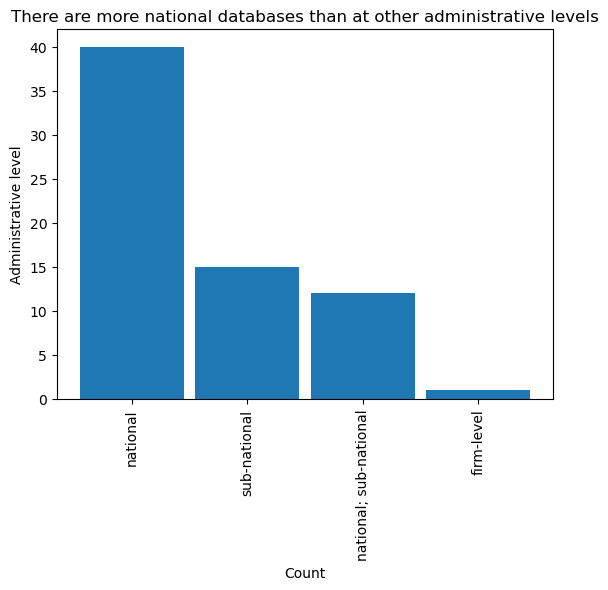

In [413]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(entries_by_administrative_level.index, entries_by_administrative_level['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('There are more national databases than at other administrative levels')
plt.xlabel('Count')
plt.ylabel('Administrative level')
plt.show()

<div class="alert-info">
On a simple count it looks like the Covid policy monitors around the world were focused on following what national governments were doing. Three times as many tracked at the national level than the sub-national one, despite the latter probably having meaningful powers to affect the pandemic in many countries. Perhaps this is because it was easier for researchers to follow and measure the policy decisions of national governments. 
    
<br>
    
The national-focused datasets are likely where much of the internationally comparative work on Covid will take place, but let's look first at a couple of the oddities in the Oxford Supertracker: the supranational and firm-level datasets.      
    
</div>

In [414]:
# Finds the supranational datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'supranational']

# Shows the supranational datasets
supranational_datasets 

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

<div class="alert-info">
The dataframe with the two supranational datasets shows us that the naming seems to be based on the type of organisation doing the data collecting. For these two, it's the European Parliament tracking policy decisions across member states of the European Union, and the International Labour Organization (ILO) following social and employment actions across the world. Let's have a look at both. 
    
<br>
    
According to the ILO's <a href="https://ilo.org/global/topics/coronavirus/regional-country/country-responses/lang--en/index.htm" target="_blank">page</a> on its tracker of Covid country policy responses, the policy actions of 188 governments, employers' and workers's bodies were tracked from 2020 to 2022. The policy reporting methodology is shown below.   
   
</div>

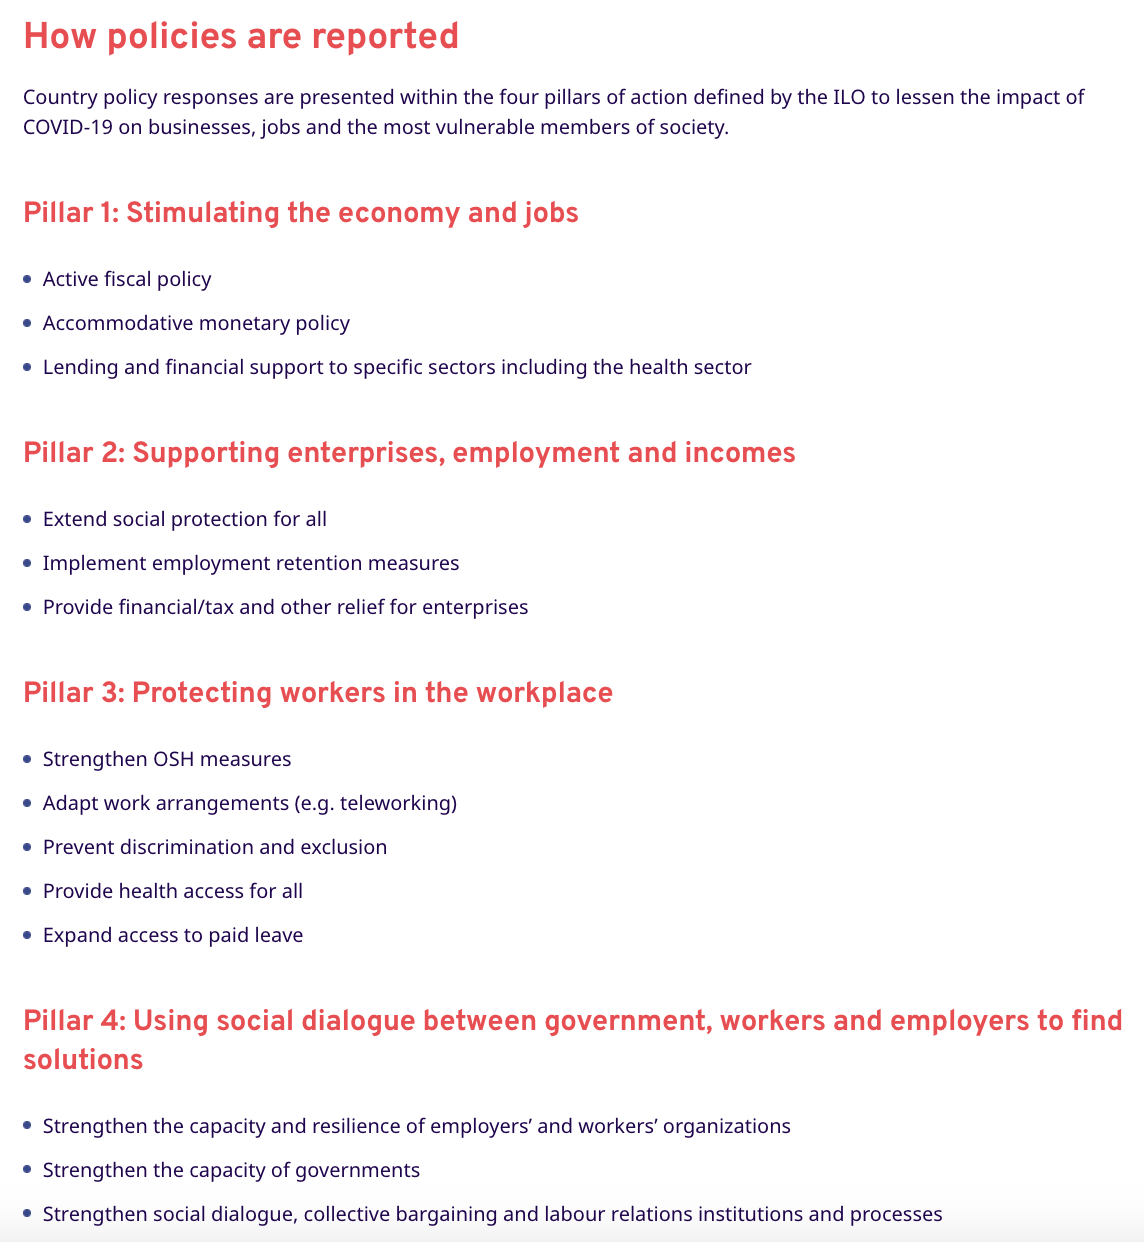

<div class="alert-info">
And let's now look at the firm-level datasets.    
   
</div>

In [415]:
# Finds the firm-level datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'firm-level']

# Shows the the firm-level datasets
supranational_datasets 

Title                             Link  \
28  Covid Stimulus Watch  https://covidstimuluswatch.org/   

                                          Policy Area  \
28  Macroeconomic and Financial Policy; Social and...   

                                                Focus Country Coverage  \
28   strengthen corporate accountability. It assem...              USA   

        Data Format                                            Authors  \
28  html; csv; xlsx  [Good Jobs First](https://twitter.com/GoodJobs...   

   Level of Observation  Start Date    End Date                  Source  \
28           firm-level  2020-04-30  up-to-date  Think tanks; Companies   

   Language   World Region Provider  
28  English  North America     NGOs

<div class="alert-info">
The first dataset, <a href="https://sites.google.com/view/firmrisk/home?authuser=0" target="_blank">firm-level risk</a>, used text analysis to follow the sentiment towards, and risk-based views of, listed firms towards the pandemic in a collection of countries around the world to March 2021. This could, interestingly, be used to gauge the views of informed companies as to the ability of their national government to achieve the policy aims stated by officials. 
    
<br>
 
The second dataset, <a href="https://covidstimuluswatch.org/" target="_blank">Covid Stimulus Watch</a>, is a markedly different tracker. It monitored financial support provided to companies by US legislation over the pandemic.   
    
<br>
Let's also have a quick look at the next two categories with the fewest counts, and also the most confusing titles: 'national; sub-national'; and 'national; supranational'. What are these ones about?
   
</div>

In [416]:
# Finds the national-subnational datasets
national_subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; sub-national']

# Shows the national-subnational datasets
national_subnational_datasets

Title  \
2               CGD - COVID education policy tracking   
3                     CIHI COVID-19 Intervention Scan   
4   COVID Analysis and Mapping of Policies (AMP) site   
11             COVID-19 Protective Policy Index (PPI)   
23  Complexity Science Hub COVID-19 Covid-19 Contr...   
25                         CoronaNet research project   
26                 Coronavirus Response Tech Tracker    
27                   Coronavirus containment measures   
32  Exceptius: Exceptional powers in times of SARS...   
35         Google Covid-19 Community Mobility Reports   
37         Grattan: coronavirus announcements tracker   
63         UCLA Law Covid-19 Behind Bars Data Project   

                                                 Link  \
2   https://docs.google.com/spreadsheets/d/1ndHgP5...   
3   https://www.cihi.ca/en/covid-19-intervention-scan   
4                               https://covidamp.org/   
11  https://www.binghamton.edu/political-science/c...   
23                  http://covid19-interventions.com/   
25                      https://coronanet-project.org   
26  https://www.newamerica.org/digital-impact-gove...   
27  https://github.com/OlivierLej/Coronavirus_Coun...   
32                             https://exceptius.com/   
35           https://www.google.com/covid19/mobility/   
37  https://docs.google.com/spreadsheets/d/1ZqnCmS...   
63  https://docs.google.com/spreadsheets/d/1X6uJkX...   

                                          Policy Area  \
2                                    Education Policy   
3   Health and Care Policy; Non-Pharmaceutical Int...   
4                    Non-Pharmaceutical Interventions   
11  Non-Pharmaceutical Interventions; Civic Freedo...   
23                   Non-Pharmaceutical Interventions   
25  Non-Pharmaceutical Interventions; Health and C...   
26                            Research and Innovation   
27                   Non-Pharmaceutical Interventions   
32  Non-Pharmaceutical Interventions; Health and C...   
35                 Behavioural Responses and Mobility   
37  Civic Freedom and Human Rights; Macroeconomic ...   
63  Prisons, Courts and Judiciary Systems; Cases a...   

                                                Focus  \
2                                     school closures   
3   It includes case finding and management, physi...   
4    non-pharmaceutical interventions. Available o...   
11  The PPI measures public health government resp...   
23   non-pharmaceutical interventions (NPIs) to st...   
25   includes 40,000 entries on  policy announceme...   
26  Global tech solutions related to the coronavir...   
27  containment measures incl. a stringency index ...   
32  documents metrics of exceptional decision-maki...   
35   mobility trends over time by geography, acros...   
37  A record of Australian Government policy annou...   
63   cases & deaths for each US prison, jail, yout...   

                                     Country Coverage           Data Format  \
2   worldwide; IND; BRA; NGA; USA; AFG; ALB; DZA; ...  csv; xlsx; pdf; html   
3                                              Canada                  xlsx   
4   ARG; AUS; BOL; BWA; BRA; CAN; TCD; COL; COG; D...            html; xlsx   
11                                worldwide; USA; CAN                   csv   
23  worldwide; ALB; AUT; BEL; BIH; BRA; CAN; HRV; ...                   csv   
25  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...             csv; xlsx   
26  worldwide; CAN; CHN; EST; IND; ISR; ITA; JPN; ...                   csv   
27  worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...                   csv   
32  AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; F...             csv; xlsx   
35  worldwide; AFG; AGO; ATG; ARG; ABW; AUS; AUT; ...              csv; pdf   
37                                                AUS                  xlsx   
63                                                USA             xlsx; csv   

                                              Author

In [417]:
# Finds the national-supranational datasets
national_supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; supranational']

# Shows the national-supranational datasets
national_supranational_datasets

Empty DataFrame
Columns: [Title, Link, Policy Area, Focus, Country Coverage, Data Format, Authors, Level of Observation, Start Date, End Date, Source, Language, World Region, Provider]
Index: []

<div class="alert-info">
The distinction between the levels of observation of a dataset doesn't seem to have been specified by the <a href="https://supertracker.spi.ox.ac.uk/" target="_blank">Oxford Supertracker</a>, and as shown by the screenshots below of the form for submitting policy trackers, it wasn't a characteristic that users could assert. 
   
</div>

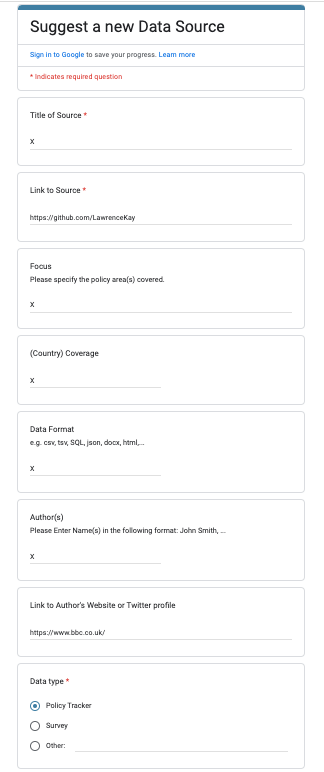

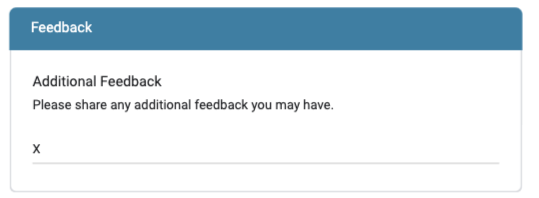

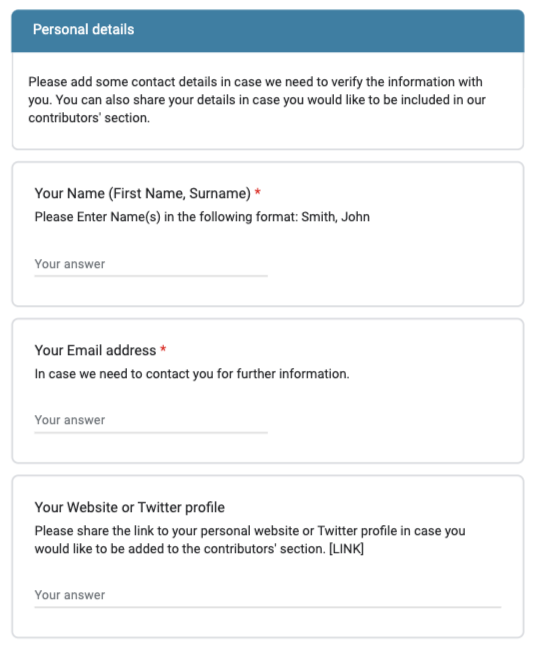

<div class="alert-info">
Given that there don't seem to be guidelines for what makes a dataset specific to one level of observation or another, it must have been determined by the editors of the tracker. Let's investigate what they decided, starting with the 'national; supranational datasets' as there are only four of them:
<br>    
      
- The <a href="https://civicspacewatch.eu/covid-19?_sf_s=economic" target="_blank">Civic Space Watch</a> by the European Civic Forum data doesn't seem to be accessible anymore. 
- The <a href="https://sites.google.com/view/atanaspekanov/economic-policy-response-map" target="_blank">Economic Policy Response Map</a> doesn't appear to have been completed. 
- The <a href="https://www.etuc.org/en/publication/covid-19-watch-etuc-briefing-notes" target="_blank">ETUC Briefing notes</a> is just a series of PDF briefings on labour and occuptaional health issues that arose during the pandemic, focused on European nations.  
- The <a href="https://www.eurofound.europa.eu/data/covid-19-eu-policywatch" target="_blank">COVID-19 EU PolicyWatch</a> is a list of measures and a database on the policies adopted by European Union governments as they sought to mitigate the effects of the pandemic on workers and companies.
    
What's the the theme that unites all of them? They focus on activities in European Union countries through a continent-wide lens. 'Supranational: European Union' would be a more accurate description of the observation level of the datasets. 
    
<br>  
What about the 'national; sub-national' ones? They're easier, in that each one has data at the national level for select countries, as well as the sub-national one for often a small subset. Most of the datasets are focused on the United States, many are just textual descriptions of policy decisions, and a good number seem to have not been maintained beyond an arbitrary point in 2020.

<div class="alert-info">
We've been through the four least populous categories and can be confident that the datasets in them have been labelled properly re their levels of observation. Let's move on to the sub-national ones.  
   
</div>

In [418]:
# Finds the subnational datasets
subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'sub-national']

# Shows the subnational datasets
subnational_datasets

Title  \
12  COVID-19 Reported Patient Impact and Hospital ...   
13  COVID-19 Reported Patient Impact and Hospital ...   
14  COVID-19 Resource Tracker: A Guide to State an...   
15                   COVID-19 Restrictions Timeseries   
16                           COVID-19 School Data Hub   
18                        COVID-19 US County Policies   
19           COVID-19 US state policy database (CUSP)   
22    Cato COVID-19 Permanent Private School Closures   
24                             Corona Daten Plattform   
38  How are children going back to school in Ameri...   
54                                School COVID Survey   
57       Stanford School Enrollment Project 2020-2021   
58             State COVID-19 Data and Policy Actions   
59              Subnational COVID-19 vaccination data   
61  The Johns Hopkins Disability Health Research C...   

                                                 Link  \
12  https://healthdata.gov/Hospital/COVID-19-Repor...   
13  https://healthdata.gov/dataset/COVID-19-Report...   
14  https://www.urban.org/policy-centers/health-po...   
15  https://data.london.gov.uk/dataset/covid-19-re...   
16                https://www.covidschooldatahub.com/   
18    https://github.com/hikmahealth/covid19countymap   
19                  https://tinyurl.com/statepolicies   
22  https://www.cato.org/covid-19-permanent-privat...   
24              https://www.corona-datenplattform.de/   
38  https://usafacts.org/articles/how-are-children...   
54  https://docs.google.com/spreadsheets/d/16f9948...   
57  https://stanford-school-enrollment-project.dat...   
58  https://www.kff.org/report-section/global-covi...   
59  https://github.com/sociepy/covid19-vaccination...   
61  https://disabilityhealth.jhu.edu/vaccinedashbo...   

                                          Policy Area  \
12                             Health and Care Policy   
13                             Health and Care Policy   
14  Health and Care Policy; Non-Pharmaceutical Int...   
15  Non-Pharmaceutical Interventions; Civic Freedo...   
16                                   Education Policy   
18  Cases and Deaths; Health and Care Policy; Non-...   
19  Non-Pharmaceutical Interventions; Health and C...   
22                                   Education Policy   
24  Non-Pharmaceutical Interventions; Cases and De...   
38                                   Education Policy   
54                                   Education Policy   
57                                   Education Policy   
58  Education Policy; Non-Pharmaceutical Intervent...   
59                                        Vaccination   
61        Vaccination; Civic Freedom and Human Rights   

                                                Focus  \
12  The dataset provides facility-level data for h...   
13  The dataset provides state-aggregated data for...   
14  This guide is a spreadsheet compiling more tha...   
15  National and local restrictions and policies a...   
16  A central database for educators, researchers,...   
18  County-level COVID-19 policy dataset covering ...   
19  dates of policy changes on the state level in ...   
22  Permanent closures of private schools at least...   
24  provides datasets on Germany on a broadrange o...   
38  Provides the 2020-2021 back-to-school policies...   
54  Provides school policies in the districts of f...   
57  Examines COVID-19’s impact on school enrollmen...   
58  Includes state-level data on a variety of COVI...   
59  Global COVID-19 vaccination data at the subnat...   
61  A resource to understand how the disability co...   

                                     Country Coverage  \
12                                                USA   
13                                                USA   
14                                                USA   
15                                                GBR   
16                                                USA   
18                                                USA 

In [419]:
# Counts the number of datasets, by rows
len(subnational_datasets)

15

<div class="alert-info">
There are 41 datasets categorised as 'sub-national', which is great, but it also creates a problem: having to go through them to judge how the category has been applied while also weeding out the missing ones. 
</div>

## Conclusion [NOTES]
<a id='conclusion'></a>

Could add the bureacrat definitions from LSE to define the micro public decisions that are encountered in US schools and prisons. 

Need to change aim desription from one that is about numeric datasets to one that allows spreadsheets with text in them. 

Remove policy tracker column 

Need to remove cases and deaths from the areas tags and mention this. 

Check functions and charts for policy area counting. 

Are the tags really representative? 

Can we add more datasets?